# import

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import cm

import os
from collections import OrderedDict
from adjustText import adjust_text

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Times New Roman' #'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [3]:
from astropy.time import Time
from astropy.time import TimeYearDayTime
from datetime import datetime
from time import strftime,strptime
import calendar
from dateutil.parser import parse

In [4]:
import numpy as np
import pandas as pd
import os
from astropy.table import Table

In [5]:
from scipy.stats import spearmanr#
from scipy.stats import pearsonr

In [6]:
from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
from astropy import constants 
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.27, Ode0=0.73)
#cosmo=FlatLambdaCDM(H0=73,Om0=0.3)

In [7]:
import pandas as pd
import numpy as np
import os

def get_obsids(path):
    dirname=os.listdir(path)
    obsids=[]
    for i in dirname:
        if i.isdigit():
            obsids.append(i)
    obsids.sort()        
    return obsids

def drop_index(data):
    data=data.reset_index(drop=True)
    return data

def get_info(data,label,label_err=None):
    return min(data[label]),max(data[label]),np.mean(data[label])
    

In [8]:
from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi))
    
def plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30,):
    secax1 = ax.secondary_xaxis('top', functions=(mjd2numsdate,datenums2mjd))
    secax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    secax1.xaxis.set_major_locator(mdates.DayLocator(interval=ma_interval))
    secax1.xaxis.set_minor_locator(mdates.DayLocator(interval=mi_interval))
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', rotation=rotation,)    
    
def set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99)):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
    #by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=bbox_to_anchor,
              loc=2, numpoints=1,ncol=1,fontsize=11.)

def set_mag_ylim(ax):
    bottom, top = ax.set_ylim()
    if bottom< top:
        ax.set_ylim(top,bottom)   
        
        
def set_mag_xlim(ax):
    bottom, top = ax.set_xlim()
    if bottom< top:
        ax.set_xlim(top,bottom)         

## def get_quasi_sim_lum_correlation

In [9]:
def get_quasi_sim_lum_correlation(time1,Lum1,time2,Lum2,timebin=1):
    time1s=[]
    Lum1s=[]
    time2s=[]
    Lum2s=[]
    
    plot_laged_lum=pd.DataFrame([])    
    for index_,(time_,lum_) in enumerate(zip(time1,Lum1)):
        
        mjd_near_i=np.argmin(abs(time2-time_))  
        mjd_near=time2[mjd_near_i]        
        Lum2_near=Lum2[mjd_near_i]
             
        if abs(mjd_near-time_)<timebin:
            time1s.append(time_)
            Lum1s.append(lum_)
            
            time2s.append(mjd_near)
            Lum2s.append(Lum2_near)                    
    return  np.array(time1s),np.array(Lum1s),np.array(time2s),np.array(Lum2s)      

time1s,Lum1s,time2s,Lum2s=get_quasi_sim_lum_correlation(time1,Lum1,time2,Lum2,timebin=1)

## def get_quasi_sim_lum3

In [10]:
def get_quasi_sim_lum3(time1,Lum1,time2,Lum2,time3,Lum3,timebin=1):
    time1s=[]
    Lum1s=[]
    time2s=[]
    Lum2s=[]
    time3s=[]
    Lum3s=[]
    
    plot_laged_lum=pd.DataFrame([])    
    for index_,(time_,lum_) in enumerate(zip(time1,Lum1)):       
        mjd_near_i=np.argmin(abs(time2-time_))  
        mjd_near=time2[mjd_near_i]         
        Lum2_near=Lum2[mjd_near_i]
        
        mjd_near_i3=np.argmin(abs(time3-time_))  
        mjd_near3=time3[mjd_near_i3]         
        Lum3_near=Lum3[mjd_near_i3]
        
        if abs(mjd_near-time_)<timebin and abs(mjd_near3-time_)<timebin:
            time1s.append(time_)
            Lum1s.append(lum_)           
            time2s.append(mjd_near)
            Lum2s.append(Lum2_near)           
            time3s.append(mjd_near3)
            Lum3s.append(Lum3_near) 
            
    return  np.array(time1s),np.array(Lum1s),np.array(time2s),np.array(Lum2s),np.array(time3s),np.array(Lum3s)            

time1s,Lum1s,time2s,Lum2s,time3s,Lum3s=get_quasi_sim_lum3(time1,Lum1,time2,Lum2,time3,Lum3,timebin=1)

## def get_lag_correlation

In [10]:
def get_lag_correlation(t1,y1,t2,y2,lagtime,timebin=2):
    lagged_t2=t2-lagtime   
    new_t1,new_y1,new_t2,new_y2= get_quasi_sim_lum_correlation(t1,y1,lagged_t2,y2,timebin=timebin)
    return new_t1,new_y1,new_t2,new_y2

## time_convert

In [11]:
from astropy.time import Time
from astropy.io import fits
import time
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates

def datetime2mjd(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    x=mdates.date2num(x)
    y = x - mjd_minus_mdates_num   
    return y

def mjd2datetime(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y= x + mjd_minus_mdates_num
    y= mdates.num2date(y)
    return y



def datenums2mjd(x):
    #x=mdates.date2num(x)
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y = x - mjd_minus_mdates_num   
    return y

def mjd2numsdate(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    y= x + mjd_minus_mdates_num
    #y= mdates.num2date(y)
    return y


def convert_xaxis_mjd(time):
    return Time(time).mjd   

def convert_xaxis_time(mjd):
    return Time(mjd,format='mjd').to_datetime()


def date2yday(x):
    """
    x is in matplotlib datenums, so they are floats.
    """
    y = x - mdates.date2num(datetime(2018, 1, 1))
    return y

def yday2date(x):
    """
    return a matplotlib datenum (x is days since start of year of 2018)
    """
    y = x + mdates.date2num(datetime(2018, 1, 1))
    return y


def convert_partial_year(numbers):
    datetimes=[]
    for number in numbers:
        year = int(number)
        d = timedelta(days=(number - year)*(365 + is_leap(year)))
        day_one = datetime(year,1,1)
        date = d + day_one
        datetimes.append(date)
    return datetimes


def is_leap(year):
    if not year%4 and  year%100 or not year%400:
        return True
    return False


def convert_mjd(times):
    timesmjd=[]
    for i in times:
        timesmjd.append(Time(i).mjd)
    return timesmjd  


def convert_date(times):
    timesdate=[]
    for i in times:
        timesdate.append(Time(i,format='mjd').datetime)
    return timesdate

def convert_date_single(time):
    timedate=Time(time,format='mjd').datetime
    return timedate

mjd2datetime(57000),mjd2datetime(58000)

mjd2datetime(59001),mjd2datetime(59001-2)

datetime2mjd(datetime(2020, 5, 30, 0, 0))

convert_date_single(55000),convert_date_single(57100)

convert_date_single(54800),convert_date_single(57200)

ax.set_xlim(54800,57200)

d=1*u.kpc
L=1.0e34*u.erg/u.s
F=L/4/np.pi/(d.to(u.cm).value)**2
print(F)

## MJD=JD-2400000.5

MJD=JD-2400000.5

In [ ]:
1*u.mpc.to(u.Mpc)

In [ ]:
1*u.lightyear.to(u.lightsecond)/3600/24

In [ ]:
(200/365.24)*u.lightyear.to(u.cm),551.5*u.mpc.to(u.cm),9000*Rg_3C273.to(u.cm).value

In [ ]:
10**2.83

In [ ]:
R_BRL=551.5*u.mpc
print(R_BRL.to(u.lightyear))
Mass_3C273=4.1e8 #solmass
Rg_3C273= constants.G*Mass_3C273*u.solMass/(constants.c**2)
print(Rg_3C273.to(u.cm))
z_3C273=0.158339
d_3C273=782.7*u.Mpc
print(d_3C273)

In [ ]:
R_BRL.to(u.cm)

In [ ]:
R_BRL.to(u.cm)/Rg_3C273.to(u.cm)

In [ ]:
Rg_3C273.to(u.cm)

In [ ]:
190/(1+z_3C273)/365*u.lightyear.to(u.cm)/6.0541627e13

## SO get_data

In [12]:
def get_Rdata_name(name_i):
    Rdata_source=pd.DataFrame([])
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or \
    source_Name_i.startswith('1ES') or \
    source_Name_i.startswith('1H') or \
    source_Name_i.startswith('AO'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    #Rband_num=0     
    for i in range(10):
        Rphot=pd.read_excel(os.path.join(Rphot_dir,'Rphot_Cycle%d.xlsx'%(i+1)))
        Rphot_name= Rphot[Rphot['Object']==source_Name_i_Rband]
        Rdata_source=Rdata_source.append(Rphot_name,ignore_index=True)
        
    Rdata_source['mjd']=Rdata_source['JD']-2400000.5
        
    return Rdata_source
    

def get_Vdata_name(name_i):
    
    Rdata_source=pd.DataFrame([])
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
       
    
    for i in range(10):
        if i==0:
            prefix=''
        else:
            prefix='_%d'%(i+1)
        
        Polpath=os.path.join(root_data_dir,source_name_i,'%s_phot'%source_name_i+prefix+'.xlsx')
        
        if os.path.exists(Polpath):
            Poldata=pd.read_excel(Polpath)  
            Rdata_source=Rdata_source.append(Poldata,ignore_index=True)
        
    
    Rdata_source['mjd']=Rdata_source['JD']-2400000.5
        
    return Rdata_source
    

def get_Poldata_name(name_i):
    
    Rdata_source=pd.DataFrame([])
    source_Name_i=name_i.strip()

        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    
    for i in range(10):
        if i==0:
            prefix=''
        else:
            prefix='_%d'%(i+1)
        
        Polpath=os.path.join(root_data_dir,source_name_i,'%s_pol'%source_name_i+prefix+'.xlsx')
        if os.path.exists(Polpath):
            Poldata=pd.read_excel(Polpath)    
            Rdata_source=Rdata_source.append(Poldata,ignore_index=True)
        
    
    Rdata_source['mjd']=Rdata_source['JD']-2400000.5
        
    return Rdata_source
    

## def fermi_monitor_mag_to_flux

The adopted conversion from flux density (in mJy = 10-26 erg cm-2 s-1 Hz-1) to V apparent magnitude 
is given by V = 15 - 2.5 log (Fν/3.64).

In [13]:
def fermi_monitor_Vmag_to_flux(data,maglabel_w1,e_maglabel_w1,D_cm):    
    data['logL_V']= (15-data[maglabel_w1])/2.5+np.log10(3.64)+np.log10(4*np.pi*D_cm.value**2) -26
    #data['logL_W2']= (-48.6-data[maglabel_w2]-3.339)/2.5+np.log10(4*np.pi*D_cm**2)
    data['e_logL_V'] =   data[e_maglabel_w1]/2.5
    #data['e_logL_W2'] =   data[e_maglabel_w2]/2.5
    return data
    
    # flux density averaged between 5400-5600 Å

def fermi_monitor_Rmag_to_flux(data,maglabel_w1,e_maglabel_w1,D_cm):    
    data['logL_R']= (15-data[maglabel_w1])/2.5+np.log10(3.08)+np.log10(4*np.pi*D_cm.value**2) -26 #
    #data['logL_W2']= (-48.6-data[maglabel_w2]-3.339)/2.5+np.log10(4*np.pi*D_cm**2)
    data['e_logL_R'] =   data[e_maglabel_w1]/2.5
    #data['e_logL_W2'] =   data[e_maglabel_w2]/2.5
    return data

     #Flux density in mJy at approximately 6400 Angstroms.

## magnitude System

In [ ]:
AB magnitude System
This magnitude system is defined such that, when monochromatic flux f is measured in erg sec^-1 cm^-2 Hz^-1,
m(AB) = -2.5 log(f) - 48.60

In [ ]:
Conversion from AB magnitudes to Johnson magnitudes:
The following formulae convert between the AB magnitude systems and those based on Alpha Lyra:
     V	=  V(AB) + 0.044	(+/- 0.004)
     B	=  B(AB) + 0.163	(+/- 0.004)
    Bj	= Bj(AB) + 0.139	(+/- INDEF)
     R	=  R(AB) +-0.055	(+/- INDEF)
     I	=  I(AB) +-0.309	(+/- INDEF)
     g	=  g(AB) + 0.013	(+/- 0.002)
     r	=  r(AB) + 0.226	(+/- 0.003)
     i	=  i(AB) + 0.296	(+/- 0.005)
    Rc	= Rc(AB) +-0.117	(+/- 0.006)
    Ic	= Ic(AB) +-0.342	(+/- 0.008)
Source: Frei & Gunn 1995

## error transform

y=f(x)

$yerr^2 = (dy/dx)^{2}*xerr^2$

y= np.log10(x)
yerr= 1/x*np.log(10)*xerr



y=10**x
yerr= y*np.log(10)*xerr


单变量
实验观测量： 
导出量： 

## Swiftband

In [ ]:
Filter	Central Wavelength (Å)
v	5468
b	4392
u	3465
uvw1	2600
uvm2	2246
uvw2	1928

nu_v=(constants.c/(5468*units.AA)).to(u.Hz).value
nu_b=(constants.c/(4392*units.AA)).to(u.Hz).value

nu_uuu=(constants.c/(3465*units.AA)).to(u.Hz).value
nu_uw1=(constants.c/(2600*units.AA)).to(u.Hz).value
nu_um2=(constants.c/(2246*units.AA)).to(u.Hz).value
nu_uw2=(constants.c/(1928*units.AA)).to(u.Hz).value

uvot_bands=['uuu','uw1','um2','uw2']
uvot_bands_label=['U','UVW1','UVM2','UVW2']

## clip_linear_fit

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
from astropy.modeling import models, fitting

!which python2

### fit_wu2004

In [ ]:
Wu2004_LHbeta_L5100.columns[4],Wu2004_LHbeta_L5100.columns[5]

In [ ]:
xdatas=[]
ydatas=[]

for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]   
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]   
    
    xdatas.append(np.log10(float(flux))+42)
                #xerr=float(err_flux),
    ydatas.append(np.log10(float(flux_Hbeta))+42)
    
xdatas=np.array(xdatas)
ydatas=np.array(ydatas)    

fit = fitting.LinearLSQFitter()
# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=3.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line, mask = or_fit(line_init, xdatas, ydatas, weights=1.0/np.ones(len(xdatas)))
filtered_data = np.ma.masked_array(ydatas, mask=mask)

# plot
plt.figure()
plt.errorbar(xdatas, ydatas, yerr=0, fmt="ko", fillstyle="none", label="Clipped Data")
plt.errorbar(xdatas, filtered_data, fmt="ko", label="Fitted Data")
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
plt.plot(xdatas, fitted_line(xdatas), 'k-', label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)
#plt.plot(xdatas, xdatas*1.02747111-3.04154998, 'r-', label='Fitted Model 1')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
fitted_line

### fit_3C273

In [ ]:
data_3C273.colnames[1]

In [ ]:
data_3C273[data_3C273[data_3C273.colnames[1]]<=0]

In [ ]:
data_3C273_select=data_3C273[data_3C273[data_3C273.colnames[1]]>0]

In [ ]:
len(data_3C273),len(data_3C273_select)

In [ ]:
x=np.log10(data_3C273_select[flux_label]*flux_scale_5100_3C273*5100)
y=np.log10(data_3C273_select[flux_label_1]*flux_scale_Hbeta_3C273)
spearmanr(x,y),pearsonr(x,y)

In [ ]:
spearmanr(data_3C273['logL5100'],data_3C273['logLHb']),pearsonr(data_3C273['logL5100'],data_3C273['logLHb'])

In [ ]:
spearmanr(pd_3C273_fitting_result_good['logL5100'],np.log10(pd_3C273_fitting_result_good['LHebta']))

In [ ]:
#flux_scale_5100=4*np.pi*(D_cm_3C273.value)**2*1.0e-15
#flux_scale_Hbeta=4*np.pi*(D_cm_3C273.value)**2*1.0e-13

xdatas=np.log10(data_3C273_select[flux_label_3C273]*flux_scale_5100_3C273*5100)
ydatas =np.log10(data_3C273_select[flux_label_1_3C273]*flux_scale_Hbeta_3C273)

xdatas=np.array(xdatas)
ydatas=np.array(ydatas)

fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=5.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line_3C273, mask = or_fit(line_init, xdatas, ydatas, weights=1.0/np.ones(len(xdatas)))
filtered_data = np.ma.masked_array(ydatas, mask=mask)

# plot
plt.figure()
plt.errorbar(xdatas, ydatas, yerr=0, fmt="ko", fillstyle="none", label="Clipped Data")
plt.errorbar(xdatas, filtered_data, fmt="ko", label="Fitted Data")
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
plt.plot(xdatas, fitted_line_3C273(xdatas), 'k-', label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)
#plt.plot(xdatas, xdatas*1.02747111-3.04154998, 'r-', label='Fitted Model 1')


plt.xlabel('L5100')
plt.ylabel('LHbeta')
plt.legend()
plt.show()

In [ ]:
fitted_line_3C273

### fit_3C273_fitgood

In [ ]:
xdatas=pd_3C273_fitting_result_good['logL5100']
ydatas = np.log10(pd_3C273_fitting_result_good['LHebta'])

xdatas=np.array(xdatas)
ydatas=np.array(ydatas)

fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=5.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line_3C273_SO, mask = or_fit(line_init, xdatas, ydatas, weights=1.0/np.ones(len(xdatas)))
filtered_data = np.ma.masked_array(ydatas, mask=mask)

# plot
plt.figure()
plt.errorbar(xdatas, ydatas, yerr=0, fmt="ko", fillstyle="none", label="Clipped Data")
plt.errorbar(xdatas, filtered_data, fmt="ko", label="Fitted Data")
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
plt.plot(xdatas, fitted_line_3C273_SO(xdatas), 'k-', label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)
#plt.plot(xdatas, xdatas*1.02747111-3.04154998, 'r-', label='Fitted Model 1')

plt.xlabel('L5100')
plt.ylabel('LHbeta')
plt.legend()
plt.show()

In [ ]:
fitted_line_3C273_SO

### fit_PKS1510

data_PKS1510

In [ ]:
len(xdatas),len(ydatas)

In [ ]:
xdatas=np.log10(np.array(data_PKS1510[flux_label_PKS1510])*flux_scale_5100_PKS1510*5100)
ydatas=np.log10(np.array(data_PKS1510[flux_label_1_PKS1510])*flux_scale_Hbeta_PKS1510)

fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=3.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line_PKS1510, mask = or_fit(line_init, xdatas, ydatas, weights=1.0/np.ones(len(xdatas)))
filtered_data = np.ma.masked_array(ydatas, mask=mask)

# plot
plt.figure()
plt.errorbar(xdatas, ydatas, yerr=0, fmt="ko", fillstyle="none", label="Clipped Data")
plt.errorbar(xdatas, filtered_data, fmt="ko", label="Fitted Data")
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
plt.plot(xdatas, fitted_line_PKS1510(xdatas), 'k-', label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)
#plt.plot(xdatas, xdatas*1.02747111-3.04154998, 'r-', label='Fitted Model 1')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()    

In [ ]:
spearmanr(xdatas,ydatas),pearsonr(xdatas,ydatas)

In [ ]:
fitted_line_PKS1510

# root_dir 

In [12]:
root_dir='/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/'
root_data_dir='/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/'
Rphot_dir='/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Rphot/'

lag_data_dir='/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data'
data_dir_3C273='/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/A 10yr reverberation mapping campaign for 3C273——J_ApJ_876_49/'
data_3C273_dir_mojave='/Volumes/ExtremeSSD/data_source/data_AGN/3C273/3C273/'

data_dir_PKS1510='/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/PKS 1510-089 spectroscopic light curvesJ_A+A_642_A59/'
lagdata_dir_PKS1510='/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data_PKS1510/'

lagdata_dir_PKS0736='/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/PKS0736+017/lagdata_PKS0736'

lagdata_dir_3C273='/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/3C273/lagdata_3C273'

In [ ]:
data_dir_PKS1510,lagdata_dir_PKS1510

In [ ]:
root_dir

In [ ]:
ls /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/

os.listdir(root_data_dir)

In [ ]:
lag_data_dir

In [ ]:
!open /Volumes/ExtremeSSD/data_source/data_AGN/3C273/3C273/

# Sources

## Fermi_AGN_list

In [16]:
Fermi_AGN_list=pd.read_excel('%s/FermiAGN_namelist_ned.xlsx'%root_dir,header=0,skiprows=[1,2])
Fermi_AGN_list_name_redshift=Fermi_AGN_list[['      Input Object Name       ',' Redshift ']]

for i in range(len(Fermi_AGN_list_name_redshift)):
    if isinstance(Fermi_AGN_list_name_redshift.iloc[i][1],(int,float)):
        
        Fermi_AGN_list_name_redshift.loc[i,'z_value']=Fermi_AGN_list_name_redshift.iloc[i][1]
    else:
        Fermi_AGN_list_name_redshift.loc[i,'z_value']=0
        
Fermi_AGN_list_name_redshift_T=Fermi_AGN_list_name_redshift[Fermi_AGN_list_name_redshift['z_value']>0]
Fermi_AGN_list_name_redshift_T=drop_index(Fermi_AGN_list_name_redshift_T)        

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11380/541743827.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fermi_AGN_list_name_redshift.loc[i,'z_value']=Fermi_AGN_list_name_redshift.iloc[i][1]


In [ ]:
Fermi_AGN_list_name_redshift_T.head()

Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()=='3C 273']

In [ ]:
sources_individual_url='http://james.as.arizona.edu/~psmith/Fermi/DATA/individual.html'

In [ ]:
import requests
r=requests.get(sources_individual_url)
demo=r.text

from bs4 import BeautifulSoup
sources_individual=[]
soup=BeautifulSoup(demo,"html.parser")
for link in soup.find_all('a'):
    if link.get('href'):
        if link.get('href').startswith('Objects'):
            name_i=link.get('href')[8:-5]
            if name_i not in sources_individual:
                sources_individual.append(name_i)
                #print(name_i)

In [ ]:
import requests
from bs4 import BeautifulSoup

r=requests.get(sources_individual_url)
demo=r.text

sources_individual_Name=[]
soup=BeautifulSoup(demo,"html.parser")
for link in soup.find_all('a'):
    if link.get('href'):
        if link.get('href').startswith('Objects'):
            #name_i=link.get('href')[8:-5]
            Name_i=link.get_text()
            if Name_i not in sources_individual:
                sources_individual_Name.append(Name_i)
                #print(Name_i)

Source_Name_dict = dict(zip(sources_individual,sources_individual_Name))
Source_name_dict = dict(zip(sources_individual_Name,sources_individual))

In [ ]:
from __future__ import unicode_literals
import json
import numpy as np
import pickle

class JsonEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        #elif isinstance(obj, datetime):                                 
            #return obj.__str__()
        else:
            return super(JsonEncoder, self).default(obj)
'''————————————————
版权声明：本文为CSDN博主「疯狂的小猪oO」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/u014657795/article/details/85868413
'''

## write local dict

import json
import numpy as np
import pickle

with open("Source_Name_dict_pickle.json", "wb") as f:# writr dict
    pickle.dump(Source_Name_dict , f,pickle.HIGHEST_PROTOCOL)


## load local Source_name_dict

In [17]:
from __future__ import unicode_literals
import json
import numpy as np
import pickle

with open('Source_Name_dict_pickle.json', "rb") as f:# load dict
    Source_Name_dict_load_pickle = pickle.load(f)

Source_Name_dict_load_pickle_Name2url  = dict(zip(Source_Name_dict_load_pickle .values(), Source_Name_dict_load_pickle .keys())) 
Source_Name_dict = Source_Name_dict_load_pickle 
Source_name_dict =Source_Name_dict_load_pickle_Name2url

In [ ]:
Source_Name_dict,Source_name_dict,

## RadioAGN_RM

In [18]:
RadioAGN_RM=pd.read_excel('%s/RadioLoudAGNRM.xlsx'%root_dir,header=0)

In [19]:
RadioAGN_RM#.columns

,Name,otherName,Input Object Name,Object Name,RA,Dec,Object,Redshift,z
0,Mrk6,NaN,Mrk6,IC 0450,06h52m12.25s,+74d25m37.5s,G,0.019513,NaN
1,3C351.0,﻿PG 1704+608,3C351.0,SBS 1704+608,17h04m41.38s,+60d44m30.5s,QSO,0.371523,SPEC
2,3C382,NaN,3C382,CGCG 173-014,18h35m03.39s,+32d41m46.8s,G,0.055565,NaN
3,PG2209+184,NaN,PG2209+184,II Zw 171,22h11m53.89s,+18d41m49.9s,G,0.069902,NaN
4,3C390.3,NaN,3C390.3,3C 390.3,18h42m08.99s,+79d46m17.1s,G,0.056135,NaN
5,3C120,NaN,3C120,3C 120,04h33m11.10s,+05d21m15.6s,G,0.033010,NaN
6,3C273,﻿PG 1226+023,3C273,3C 273,12h29m06.70s,+02d03m08.6s,QSO,0.158339,NaN
7,PKS1510-089,NaN,PKS1510-089,[HB89] 1510-089 NED02,15h12m50.53s,-09d05m59.8s,QSO,0.360000,NaN
8,PG0007+106,"(Mrk 1501, III Zw 2)",PG0007+106,MRK 1501,00h10m31.01s,+10d58m29.5s,G,0.087227,NaN
9,PG1100+772,(3C 249.1),PG1100+772,PG 1100+772,11h04m13.69s,+76d58m58.0s,QSO,0.311500,NaN


In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord

RadioAGN_RM_coord=SkyCoord(RadioAGN_RM['RA'],RadioAGN_RM['Dec'], unit=(u.hourangle, u.deg),frame="icrs",) 

RadioAGN_RM['Ra_deg']=RadioAGN_RM_coord.ra.deg
RadioAGN_RM['Dec_deg']=RadioAGN_RM_coord.dec.deg

for index, name in enumerate(RadioAGN_RM['Name']):
    print(name,'%.5f'%RadioAGN_RM.loc[index,'Ra_deg'],',','%.5f'%RadioAGN_RM.loc[index,'Dec_deg'])

In [ ]:
103.05104 , 74.42708
256.17242 , 60.74181
278.76412 , 32.69633
332.97454 , 18.69719
280.53746 , 79.77142
68.29625 , 5.35433
187.27792 , 2.05239
228.21054 , -9.09994
2.62921 , 10.97486
166.05704 , 76.98278
114.82512 , 1.61794
63.81000 , -40.39472
51.17150 , 34.17942
255.03871 , 68.50194

os.chdir('/User/lyubing/blog/brettlv.github.io/pythoncode/00JetRM/')

## Wu2004load L5100_LHbeta

In [20]:
Wu2004_LHbeta_L5100=pd.read_csv('/Users/lyubing/IHEPBox/JetRM_plot/Wu2004_LHbeta_L5100.py',delimiter='&')
Wu2004_LHbeta_L5100.columns#.iloc[0]#.columns

Index(['Name    ', '   $z$    ', ' $A_B$ ', '$R_{\rm BLR}$      ',
       ' $ L_{5100~{\rm \AA}}$ ', '  $L_{{\rm H}_\beta}$ ', ' Ref.\\'],
      dtype='object')

## Rakshit et al. (2020)

$$ log H\alpha= 1.126 \pm 0.004 * log 5100- 6.89\pm 0.20  $$

$$ log H\beta= 0.947  \pm 0.002 * log 5100- 0.45\pm 0.09 $$

$$log H\beta= 1.057  \pm 0.002 * log 5100- 4.41\pm 0.1 (adopt) $$  
 


#  <font color=red>3C 273</font>

## info_3C273

In [21]:
source_Name='3C 273'
source_name=Source_name_dict[source_Name]
source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
D_cm_3C273=cosmo.luminosity_distance(source_z.values[0]).to(u.cm)
print(source_z.values[0],D_cm_3C273)

0.158339 2.3433282196438376e+27 cm


## Zhangzhixiang 2019

12- 16 F5.2   10-17W/m2/nm   F5100    [14/24.1]? Continuum flux at 5100{AA},
                                        in 10^-15^erg/s/cm^2^/{AA}
18- 21 F4.2   10-17W/m2/nm e_F5100    [0.2/0.3]? Uncertainty in F5100
23- 27 F5.2   10-16W/m2      FHbeta   [15.5/19.7]? H{beta} emission-line flux,
                                        in 10^-13^erg/s/cm^2^
29- 32 F4.2   10-16W/m2    e_FHbeta   [0.15/0.3]? Uncertainty in FHbeta

### flux_scale_zhang3c273

In [22]:
flux_scale_5100_3C273=4*np.pi*(D_cm_3C273.value)**2*1.0e-15 # erg s^-1 A^-1
flux_scale_Hbeta_3C273=4*np.pi*(D_cm_3C273.value)**2*1.0e-13 # erg s^-1
print(D_cm_3C273.value)

2.3433282196438376e+27


In [97]:
cat '/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/A 10yr reverberation mapping campaign for 3C273——J_ApJ_876_49/ReadMe'

J/ApJ/876/49   A 10yr reverberation mapping campaign for 3C273   (Zhang+, 2019)
Kinematics of the broad-line region of 3C 273 from a 10yr reverberation mapping
campaign.
    Zhang Z.-X., Du P., Smith P.S., Zhao Y., Hu C., Xiao M., Li Y.-R.,
    Huang Y.-K., Wang K., Bai J.-M., Ho L.C., Wang J.-M.
   <Astrophys. J., 876, 49 (2019)>
   =2019ApJ...876...49Z
ADC_Keywords: Active gal. nuclei; Photometry; Spectra, optical
Keywords: galaxies: active ; galaxies: individual (3C 273) ; galaxies: nuclei

Abstract:
    Despite many decades of study, the kinematics of the broad-line region
    of 3C 273 are still poorly understood. We report a new, high
    signal-to-noise, reverberation mapping campaign carried out from 2008
    November to 2018 March that allows the determination of time lags
    between emission lines and the variable continuum with high precision.
    The time lag of variations in H{beta} relative to those of the
    5100{AA} continuum is 146.8_-12.1_^+8.3^days in the rest fram

In [ ]:
data_dir_3C273,data_3C273.colnames

In [13]:
table_3C273_path=os.path.join(data_dir_3C273,'table1.dat')
readme_3C273_path=os.path.join(data_dir_3C273,'ReadMe')
data_3C273=Table.read(table_3C273_path,
                      readme=readme_3C273_path,
                      format="ascii.cds",)

data_3C273['mjd2']=data_3C273['JD2']-2400000.5
data_3C273['mjd1']=data_3C273['JD1']-2400000.5
data_3C273['mjd']=data_3C273['JD1']-2400000.5

In [14]:
data_3C273

JD1,F5100,e_F5100,FHbeta,e_FHbeta,FHgamma,e_FHgamma,FFe,e_FFe,Obs1,JD2,Vmag,e_Vmag,Obs2,mjd2,mjd1,mjd
d,1e-17 nm W / m2,1e-17 nm W / m2,1e-16 W / m2,1e-16 W / m2,1e-16 W / m2,1e-16 W / m2,1e-16 W / m2,1e-16 W / m2,,d,mag,mag,,d,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64,float64,str1,float64,float64,float64
2454795.02,21.75,0.27,18.17,0.24,6.93,0.13,14.95,0.28,S,2454795.01,12.71,0.02,S,54794.50999999978,54794.52000000002,54794.52000000002
2454800.99,22.95,0.28,18.27,0.25,6.7,0.16,15.41,0.34,S,2454801.0,12.68,0.02,S,54800.5,54800.49000000022,54800.49000000022
2454802.99,24.09,0.27,18.0,0.23,6.27,0.12,15.11,0.27,S,2454802.99,12.66,0.02,S,54802.49000000022,54802.49000000022,54802.49000000022
2454803.97,22.28,0.27,16.92,0.23,5.9,0.11,14.41,0.25,S,2454804.04,12.74,0.02,S,54803.54000000004,54803.470000000205,54803.470000000205
2454828.98,20.4,0.27,17.64,0.23,6.02,0.11,14.93,0.24,S,2454804.05,12.7,0.02,S,54803.549999999814,54828.47999999998,54828.47999999998
2454829.96,19.89,0.27,17.64,0.24,6.3,0.13,14.87,0.28,S,2454805.99,12.7,0.02,S,54805.49000000022,54829.45999999996,54829.45999999996
2454830.96,20.52,0.27,17.68,0.23,5.86,0.13,15.11,0.28,S,2454806.0,12.73,0.02,S,54805.5,54830.45999999996,54830.45999999996
2454831.96,19.75,0.27,17.58,0.24,6.08,0.13,14.94,0.29,S,2454828.98,12.8,0.02,S,54828.47999999998,54831.45999999996,54831.45999999996


## 3C 273 NTD

In [174]:
data_3C273.colnames

['JD1',
 'F5100',
 'e_F5100',
 'FHbeta',
 'e_FHbeta',
 'FHgamma',
 'e_FHgamma',
 'FFe',
 'e_FFe',
 'Obs1',
 'JD2',
 'Vmag',
 'e_Vmag',
 'Obs2',
 'mjd2',
 'mjd1',
 'mjd',
 'L5100',
 'logL5100',
 'LHb',
 'logLHb',
 'logLp',
 'Lp',
 'NTD',
 'L5100minusLp',
 'LHb_err']

In [175]:
data_3C273['L5100']= data_3C273['F5100']*flux_scale_5100_3C273*5100 #4*np.pi*D_cm_3C273**2*
data_3C273['L5100_err']= data_3C273['e_F5100']*flux_scale_5100_3C273*5100 
data_3C273['logL5100']=np.log10(data_3C273['L5100'])
data_3C273['LHb']=data_3C273['FHbeta']*flux_scale_Hbeta_3C273 #4*np.pi*D_cm_3C273**2*
data_3C273['LHb_err']=data_3C273['e_FHbeta']*flux_scale_Hbeta_3C273 

data_3C273['logLHb']=np.log10(data_3C273['LHb'])
data_3C273['logLp']= (data_3C273['logLHb']+4.41)/1.057
data_3C273['Lp']=10**(data_3C273['logLp'])
data_3C273['NTD']=data_3C273['L5100']/data_3C273['Lp']
data_3C273['L5100minusLp']=data_3C273['L5100']-data_3C273['Lp']

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11380/1804993463.py:3: RuntimeWarning: divide by zero encountered in log10
  data_3C273['logL5100']=np.log10(data_3C273['L5100'])
/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11380/1804993463.py:7: RuntimeWarning: divide by zero encountered in log10
  data_3C273['logLHb']=np.log10(data_3C273['LHb'])


## 3C273_fitting_SO

In [25]:
pd_3C273_fitting_result =pd.read_csv('/Users/lyubing/IHEPBox/code_of_python/qsofitmore/examples/3C273_fitting_result.txt',header=None)
pd_3C273_fitting_result.columns=['filename','mjd','logL5100','logLHebta_br','logLHebta_na','logLg_br','logLg_na','logLOIII5007','Hb_br_fwhm','Hb_br_sigma','Hb_line_red_chi2','Hg_line_red_chi2']

pd_3C273_fitting_result_notgood=pd_3C273_fitting_result[pd_3C273_fitting_result['Hb_br_fwhm']==0]
pd_3C273_fitting_result_notgood=drop_index(pd_3C273_fitting_result_notgood)

pd_3C273_fitting_result_good=pd_3C273_fitting_result[pd_3C273_fitting_result['Hb_br_fwhm']!=0]
#pd_3C273_fitting_result_good=pd_3C273_fitting_result_good[pd_3C273_fitting_result_good['Hb_line_red_chi2']>0.7]
pd_3C273_fitting_result_good=pd_3C273_fitting_result_good[pd_3C273_fitting_result_good['Hb_line_red_chi2']<1.2]
pd_3C273_fitting_result_good=drop_index(pd_3C273_fitting_result_good)


#pd_3C273_fitting_result_good['logLp']= (np.log10(pd_3C273_fitting_result_good['LHebta'])+4.41)/1.057
pd_3C273_fitting_result_good['logLp']= (pd_3C273_fitting_result_good['logLHebta_br']+4.41)/1.057
pd_3C273_fitting_result_good['Lp']= 10**pd_3C273_fitting_result_good['logLp']
pd_3C273_fitting_result_good['L5100'] =10** pd_3C273_fitting_result_good['logL5100']
pd_3C273_fitting_result_good['NTD'] = pd_3C273_fitting_result_good['L5100']/pd_3C273_fitting_result_good['Lp']

In [ ]:
pd_3C273_fitting_result_good.head()

## PKS1510_fitting_SO

In [26]:
pd_PKS1510_fitting_result =pd.read_csv('/Users/lyubing/IHEPBox/code_of_python/qsofitmore/examples/PKS1510-08_fitting_result.txt',header=None)
pd_PKS1510_fitting_result.columns=['filename','mjd','logL5100','logLHebta_br','logLHebta_na','logLg_br','logLg_na','logLOIII5007','Hb_br_fwhm','Hb_br_sigma','Hb_line_red_chi2','Hg_line_red_chi2']

pd_PKS1510_fitting_result_notgood=pd_PKS1510_fitting_result[pd_PKS1510_fitting_result['Hb_br_fwhm']==0]
pd_PKS1510_fitting_result_notgood=drop_index(pd_PKS1510_fitting_result_notgood)

pd_PKS1510_fitting_result_good=pd_PKS1510_fitting_result[pd_PKS1510_fitting_result['Hb_br_fwhm']!=0]
#pd_PKS1510_fitting_result_good=pd_PKS1510_fitting_result_good[pd_PKS1510_fitting_result_good['Hb_line_red_chi2']>0.7]
pd_PKS1510_fitting_result_good=pd_PKS1510_fitting_result_good[pd_PKS1510_fitting_result_good['Hb_line_red_chi2']<1.2]
pd_PKS1510_fitting_result_good=drop_index(pd_PKS1510_fitting_result_good)

#pd_PKS1510_fitting_result_good['logLp']= (np.log10(pd_PKS1510_fitting_result_good['LHebta'])+4.41)/1.057
pd_PKS1510_fitting_result_good['logLp']= (pd_PKS1510_fitting_result_good['logLHebta_br']+4.41)/1.057
pd_PKS1510_fitting_result_good['Lp']= 10**pd_PKS1510_fitting_result_good['logLp']
pd_PKS1510_fitting_result_good['L5100'] =10** pd_PKS1510_fitting_result_good['logL5100']
pd_PKS1510_fitting_result_good['NTD'] = pd_PKS1510_fitting_result_good['L5100']/pd_PKS1510_fitting_result_good['Lp']


## PKS0736_fitting_SO

In [27]:
pd_PKS0736_fitting_result =pd.read_csv('/Users/lyubing/IHEPBox/code_of_python/qsofitmore/examples/PKS0736+01_fitting_result.txt',header=None)
pd_PKS0736_fitting_result.columns=['filename','mjd','logL5100','logLHebta_br','logLHebta_na','logLg_br','logLg_na','logLOIII5007','Hb_br_fwhm','Hb_br_sigma','Hb_line_red_chi2','Hg_line_red_chi2']

pd_PKS0736_fitting_result_notgood=pd_PKS0736_fitting_result[pd_PKS0736_fitting_result['Hb_br_fwhm']==0]
pd_PKS0736_fitting_result_notgood=drop_index(pd_PKS0736_fitting_result_notgood)

pd_PKS0736_fitting_result_good=pd_PKS0736_fitting_result[pd_PKS0736_fitting_result['Hb_br_fwhm']!=0]
#pd_PKS0736_fitting_result_good=pd_PKS0736_fitting_result_good[pd_PKS0736_fitting_result_good['Hb_line_red_chi2']>0.7]
pd_PKS0736_fitting_result_good=pd_PKS0736_fitting_result_good[pd_PKS0736_fitting_result_good['Hb_line_red_chi2']<1.2]
pd_PKS0736_fitting_result_good=drop_index(pd_PKS0736_fitting_result_good)


#pd_PKS0736_fitting_result_good['logLp']= (np.log10(pd_PKS0736_fitting_result_good['LHebta'])+4.41)/1.057
pd_PKS0736_fitting_result_good['logLp']= (pd_PKS0736_fitting_result_good['logLHebta_br']+4.41)/1.057
pd_PKS0736_fitting_result_good['Lp']= 10**pd_PKS0736_fitting_result_good['logLp']
pd_PKS0736_fitting_result_good['L5100'] =10** pd_PKS0736_fitting_result_good['logL5100']
pd_PKS0736_fitting_result_good['NTD'] = pd_PKS0736_fitting_result_good['L5100']/pd_PKS0736_fitting_result_good['Lp']



In [28]:
get_info(data_3C273,'NTD')

(0.6681866713215032, 1.0959208584661315, 0.8905054616413896)

In [29]:
get_info(pd_3C273_fitting_result_good,'NTD')

(0.6821454872736812, 1.1409305896549948, 0.912959936987998)

## Pol3C273

In [30]:
source_Name='3C 273'
Poldata_source_3C273=get_Poldata_name(source_Name)
Poldata_source_3C273['snr']=Poldata_source_3C273[Poldata_source_3C273.columns[9]]/Poldata_source_3C273[Poldata_source_3C273.columns[10]]
Poldata_source_3C273_snr=Poldata_source_3C273[Poldata_source_3C273['snr']>5]
Poldata_source_3C273_snr=drop_index(Poldata_source_3C273_snr)

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11380/1520016499.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Rdata_source=Rdata_source.append(Poldata,ignore_index=True)
/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11380/1520016499.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Rdata_source=Rdata_source.append(Poldata,ignore_index=True)
/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11380/1520016499.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Rdata_source=Rdata_source.append(Poldata,ignore_index=True)
/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11380/1520016499.py:78: FutureWarning: The frame.append method is deprecated and will be removed from panda

### plot_sim_VandF5100

In [ ]:
time1,Lum1,time2,Lum2=data_3C273['mjd'],data_3C273['F5100'],data_3C273['mjd2'],data_3C273['Vmag']
time1s,Lum1s,time2s,Lum2s=get_quasi_sim_lum_correlation(time1,Lum1,time2,Lum2,timebin=1)

figure_n=1
fig = plt.figure(figsize=(6,figure_n*4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)
ax.scatter(np.log10(Lum1s*flux_scale_5100_3C273*5100),Lum2s)
set_mag_ylim(ax)
ax.set_ylabel('V(mag)')
ax.set_xlabel('log L5100')
#ax.semilogx()
set_ax_tick(ax)

In [ ]:
fig = plt.figure(figsize=(8,6))

In [ ]:
pearsonr(Lum1s,-Lum2s)

In [ ]:
data_3C273.colnames

In [ ]:
readme_3C273_path

In [ ]:
min(data_3C273[data_3C273.colnames[1]]),max(data_3C273[data_3C273.colnames[1]])

In [ ]:
min(data_3C273[data_3C273.colnames[3]]),max(data_3C273[data_3C273.colnames[3]])

## Liyanrong_decomposition

In [ ]:
Jet3C273_decomp=pd.read_csv('%s/3C273_jet.txt'%lagdata_dir_3C273,header=None,delimiter='\s',engine='python')
Disk3C273_decomp=pd.read_csv('%s/3C273_disk.txt'%lagdata_dir_3C273,header=None,delimiter='\s',engine='python')

Jet3C273_decomp.columns=['JD-2450000','Jetflux_V','err_Jetflux_V']
Disk3C273_decomp.columns=['JD-2450000','Diskflux_V','err_Diskflux_V']

Jet3C273_decomp['mjd']=Jet3C273_decomp['JD-2450000']+50000-0.5
Disk3C273_decomp['mjd']=Disk3C273_decomp['JD-2450000']+50000-0.5

Disk3C273_decomp

Jet3C273_decomp

### plot_decomp_lc

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8*1.5,6*1.5))

'''for i in range(len(table_ATCA_3C273_5GHz)):
    flux_and_err=table_ATCA_3C273_5GHz.loc[i,'Flux Density (Jy)']
    flux=flux_and_err.split('±')[0]
    err_flux=flux_and_err.split('±')[1]   
    ax.errorbar(table_ATCA_3C273_5GHz.loc[i,'mjd'],float(flux),float(err_flux),
              ls=':',marker='.',markersize=10,color='r',label='VLA 5GHz')
'''

lag_radio_optcal=509.2

ax.errorbar(mojave_15GHz_3c273['mjd']-lag_radio_optcal,mojave_15GHz_3c273['flux'],#*1.2,
            fmt='+',label='VLBA_15GHz lagged %d d'%lag_radio_optcal)

ax.errorbar(ovro_40m_3C273['mjd']-lag_radio_optcal,ovro_40m_3C273['flux'],ovro_40m_3C273['flux err'],
            fmt='d',label='OVRO_15GHz lagged %d d'%lag_radio_optcal)
    

set_ax_tick(ax) 
ax.set_title('3C 273')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)


ax2=ax.twinx()
#ax2.errorbar(data_3C273['JD1']-2400000.5,data_3C273['F5100'],label='5100')
#ax2.errorbar(data_3C273['JD1']-2400000.5,data_3C273['FHbeta'],label='Hbeta')
ax2.errorbar(Disk3C273_decomp['mjd'],
            Disk3C273_decomp['Diskflux_V'],
            yerr=Disk3C273_decomp['err_Diskflux_V'],
                            label='Disk_decomp')

ax2.errorbar(Jet3C273_decomp['mjd'],Jet3C273_decomp['Jetflux_V'],
            yerr=Jet3C273_decomp['err_Jetflux_V'],label='Jet_decomp')

'''ax2.errorbar(Jet3C273_decomp['mjd'],Jet3C273_decomp['Jetflux_V']#+Disk3C273_decomp['Diskflux_V'],
             #yerr=Jet3C273_decomp['err_Jetflux_V'],
             label='Jet+Disk')
'''



ax2.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax2.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax2.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.79, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
fig.tight_layout()
range_l,range_r=(54000+1,59250-1)
ax.set_xlim(range_l,range_r)
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/3C273_plot/3C273_decomp_lc_radio_optical_%d_%d.png'%(range_l,range_r),dpi=400)


In [ ]:
data_3C273.colnames

### plot lagged_Hbeta_L5100

In [ ]:
time1=data_3C273['mjd']
Lum1=data_3C273['F5100']
time2=Disk3C273_decomp['mjd']
Lum2=Disk3C273_decomp['Diskflux_V']
time3=Jet3C273_decomp['mjd']
Lum3=Jet3C273_decomp['Jetflux_V']
time1s,Lum1s,time2s,Lum2s,time3s,Lum3s=get_quasi_sim_lum3(time1,Lum1,time2,Lum2,time3,Lum3,timebin=10)

In [ ]:
np.mean(Lum2)/(np.mean(Lum2)+np.mean(Lum3))

In [ ]:
Lum1s_Disk=[]
for i in range(len(time1s)):
    Lum1s_Disk.append(Lum1s[i]* Lum2[i]/(Lum2[i]+Lum3[i]))
Lum1s_Disk=np.array(Lum1s_Disk)

Lum1s_Jet=[]
for i in range(len(time1s)):
    Lum1s_Jet.append(Lum1s[i]* Lum3[i]/(Lum2[i]+Lum3[i]))
Lum1s_Jet=np.array(Lum1s_Jet)

time1s

### lag_F5100_Disk

In [ ]:
data_Lum1s_Disk = {'t': time1s, 'flux': Lum1s_Disk,}
lag_F5100_Disk = pd.DataFrame(data_Lum1s_Disk,columns=['t','flux'])
lag_F5100_Disk['e_flux']=0.27

### lag_F5100_Jet

In [ ]:
data_Lum1s_Jet = {'t': time1s, 'flux': Lum1s_Jet,}
lag_F5100_Jet = pd.DataFrame(data_Lum1s_Jet,columns=['t','flux'])
lag_F5100_Jet['e_flux']=0.27

### plot decomp_F5100

In [ ]:
lagtime=194.9 #170
#lagtime=170 #170

t2=data_3C273['mjd']
y2=data_3C273['FHbeta']

t2_data= np.array(t2[~t2.mask])
y2_data= np.array(y2[~y2.mask])

#new_t1,new_y1,new_t2,new_y2=get_lag_correlation(time1s,Lum1s_Disk,t2_data,y2_data,lagtime,timebin=5)
new_t1,new_y1,new_t2,new_y2=get_quasi_sim_lum_correlation(time1s,Lum1s_Disk,t2_data,y2_data, timebin=1)

fig, ax = plt.subplots(1, 1,figsize=(6,6))
ax.errorbar(x=np.log10(new_y1*flux_scale_5100_3C273*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(new_y2*flux_scale_Hbeta_3C273),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='*',label='F5100_diskcomponent',zorder=0)


'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]   
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]   
    
    ax.errorbar(x=np.log10(float(flux))+42,
                #xerr=float(err_flux),
                y=np.log10(float(flux_Hbeta))+42,
                #yerr=float(err_flux_Hbeta),
              ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
'''



ax.errorbar(x=np.log10(data_3C273[flux_label_3C273]*flux_scale_5100_3C273*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(data_3C273[flux_label_1_3C273]*flux_scale_Hbeta_3C273),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='F5100_total',zorder=1)



slope=1.02747111
offset=3.04154998

L5100_linspace=np.linspace(45.6,46)    
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))


slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
#ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))


slope=1.057
offset=4.41
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))


    
ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()
ax.set_title('3C 273')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

ax.set_xlim(45.5,46)
ax.set_ylim(44.0-0.2,44.5-0.2)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/3C273_plot/3C273_Hbeta_L5100.png',dpi=400)



### plot_lag_decomp_F5100

In [ ]:
lagtime=194.9 #170
#lagtime=170 #170

t2=data_3C273['mjd']
y2=data_3C273['FHbeta']
t2_data= np.array(t2[~t2.mask])
y2_data= np.array(y2[~y2.mask])

new_t1,new_y1,new_t2,new_y2=get_lag_correlation(time1s,Lum1s_Disk,t2_data,y2_data,lagtime,timebin=10)

fig, ax = plt.subplots(1, 1,figsize=(6,6))
ax.errorbar(x=np.log10(new_y1*flux_scale_5100_3C273*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(new_y2*flux_scale_Hbeta_3C273),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='*',label='L5100_diskcomponent Hbeta lagged %d days'%lagtime,zorder=0)



'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]   
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]   
    
    ax.errorbar(x=np.log10(float(flux))+42,
                #xerr=float(err_flux),
                y=np.log10(float(flux_Hbeta))+42,
                #yerr=float(err_flux_Hbeta),
              ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
'''




t1=data_3C273['mjd']
y1=data_3C273['F5100']
t1_data= np.array(t1[~t1.mask])
y1_data= np.array(y1[~y1.mask])


new_t1_5100Total,new_y1_5100Total,new_t2_5100Total,new_y2_5100Total=get_lag_correlation(t1_data,y1_data,t2_data,y2_data,lagtime,timebin=10)

ax.errorbar(x=np.log10(new_y1_5100Total*flux_scale_5100_3C273*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(new_y2_5100Total*flux_scale_Hbeta_3C273),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='L5100_total Hbeta lagged %d days'%lagtime,zorder=1)



slope=1.02747111
offset=3.04154998

L5100_linspace=np.linspace(45.6,46)    
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))


slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
#ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))


slope=1.057
offset=4.41
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))


    
ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()
ax.set_title('3C 273')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

ax.set_xlim(45.5,46)
ax.set_ylim(44.0-0.2,44.5-0.2)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/3C273_plot/3C273_Hbeta_L5100_lagged_%d.png'%lagtime,dpi=400)



In [ ]:
np.log10(0.75)

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,8))

for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]   
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]   
    
    ax.errorbar(x=np.log10(float(flux))+42,
                #xerr=float(err_flux),
                y=np.log10(float(flux_Hbeta))+42,
                #yerr=float(err_flux_Hbeta),
              ls=':',marker='.',markersize=10,color='grey',label='Wu2004')



ax.errorbar(x=np.log10(new_y1*flux_scale_5100*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(new_y2*flux_scale_Hbeta),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C 273')

slope=1.02747111
offset=3.04154998

L5100_linspace=np.linspace(41,46)    
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))

'''slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))
''' 
slope=1.057
offset=4.41
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))


ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()
#ax.set_title('3C 273')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
#by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.35, 0.19),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

#ax.set_xlim(40,47)
#ax.set_ylim(39,46)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/AGN_Hbeta_L5100_lag_3C273.png',dpi=400)


In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8*1.5,6*1.5))

'''for i in range(len(table_ATCA_3C273_5GHz)):
    flux_and_err=table_ATCA_3C273_5GHz.loc[i,'Flux Density (Jy)']
    flux=flux_and_err.split('±')[0]
    err_flux=flux_and_err.split('±')[1]   
    ax.errorbar(table_ATCA_3C273_5GHz.loc[i,'mjd'],float(flux),float(err_flux),
              ls=':',marker='.',markersize=10,color='r',label='VLA 5GHz')
'''

ax.errorbar(time1s,Lum1s_Disk,#*1.2,
            color='grey',ls='-.',
            fmt='.',label='F5100_disk',zorder=1)


ax.errorbar(t2_data-194.9,y2_data,#*1.2,
            color='r',ls='-.',
            fmt='.',label='FHbeta',zorder=0)    


set_ax_tick(ax)
set_ax_legend(ax)
ax.set_title('3C 273')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux')



plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
fig.tight_layout()
range_l,range_r=(54000,58500)
ax.set_xlim(range_l,range_r)
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/3C273_plot/3C273_decomp_Ldisk_5100_LHbeta_%d_%d.png'%(range_l,range_r),dpi=400)


In [ ]:
len(t2_data),len(y2_data),len(time1s),len(Lum1s_Disk)

for i,j,k,h in zip(time1s,Lum1s_Disk,t2_data,y2_data):
    print(i,j,k,h)

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8*1.5,6*1.5))

'''for i in range(len(table_ATCA_3C273_5GHz)):
    flux_and_err=table_ATCA_3C273_5GHz.loc[i,'Flux Density (Jy)']
    flux=flux_and_err.split('±')[0]
    err_flux=flux_and_err.split('±')[1]   
    ax.errorbar(table_ATCA_3C273_5GHz.loc[i,'mjd'],float(flux),float(err_flux),
              ls=':',marker='.',markersize=10,color='r',label='VLA 5GHz')
'''

ax.errorbar(time1s,Lum1s,#*1.2,
            color='grey',
            fmt='.',label='F5100',zorder=1)

for i in range(len(time1s)):
    
    ax.errorbar(time1s[i],Lum1s[i]* Lum2[i]/(Lum2[i]+Lum3[i]),#*1.2,
            color='r',
            fmt='.',label='F5100_disk',zorder=1)

ax.errorbar(time1,Lum1,#*1.2,
            color='grey',
            fmt='.',label='F5100',zorder=0)    

ax.errorbar(Disk3C273_decomp['mjd'],
            Disk3C273_decomp['Diskflux_V']*10*5,
            yerr=Disk3C273_decomp['err_Diskflux_V'],
                            label='Disk_decomp')

'''ax.errorbar(Jet3C273_decomp['mjd'],Jet3C273_decomp['Jetflux_V']*50,
            yerr=Jet3C273_decomp['err_Jetflux_V'],label='Jet_decomp')
'''

set_ax_tick(ax)
set_ax_legend(ax)
ax.set_title('3C 273')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux')



plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
fig.tight_layout()
range_l,range_r=(54000,58500)
ax.set_xlim(range_l,range_r)
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/3C273_plot/3C273_decomp_Jet_disk_%d_%d.png'%(range_l,range_r),dpi=400)


In [ ]:
Disk3C273_decomp['mjd'],Jet3C273_decomp['mjd']

In [ ]:
get_info(ovro_40m_3C273,label='mjd')

In [ ]:
get_info(mojave_15GHz_3c273,label='mjd')

In [ ]:
time_l,time_r=(55000,58000)
mask_time_jet=np.logical_and(Jet3C273_decomp['mjd']>time_l,Jet3C273_decomp['mjd']<time_r)
Jet3C273_decomp_select=Jet3C273_decomp[mask_time_jet]

mask_time_disk=np.logical_and(Disk3C273_decomp['mjd']>time_l,Disk3C273_decomp['mjd']<time_r)
Disk3C273_decomp_select=Disk3C273_decomp[mask_time_disk]

In [ ]:
np.mean(Jet3C273_decomp_select['Jetflux_V']),np.mean(Disk3C273_decomp_select['Diskflux_V'])

In [ ]:
0.058/(0.058+0.236)

In [ ]:
0.071/(0.071+0.224)

In [ ]:
Disk3C273_decomp.columns

In [ ]:
Jet3C273_decomp.columns

## plot LHbeta-L5100

In [ ]:
flux_label_3C273=data_3C273.colnames[1]
e_flux_label_3C273=data_3C273.colnames[2]
flux_label_1_3C273=data_3C273.colnames[3]
e_flux_label_1_3C273=data_3C273.colnames[4]
print(flux_label_3C273,e_flux_label_3C273)
print(flux_label_1_3C273,e_flux_label_1_3C273)

In [ ]:
pd_3C273_fitting_result_good.columns

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]   
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]   
    
    ax.errorbar(x=np.log10(float(flux))+42,
                #xerr=float(err_flux),
                y=np.log10(float(flux_Hbeta))+42,
                #yerr=float(err_flux_Hbeta),
              ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
'''




ax.errorbar(x=np.log10(data_3C273[flux_label_3C273]*flux_scale_5100_3C273*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(data_3C273[flux_label_1_3C273]*flux_scale_Hbeta_3C273),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C 273 Zhang2019')

ax.errorbar(x=pd_3C273_fitting_result_good['logL5100'],
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            #y=np.log10(pd_3C273_fitting_result_good['LHebta']),
            y=pd_3C273_fitting_result_good['logLHebta_br'],
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C 273 SO_fitting')



slope=1.02747111
offset=3.04154998

L5100_linspace=np.linspace(45.6,46)    
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))


'''slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))
'''

slope=1.057
offset=4.41
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))


    
ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()
ax.set_title('3C 273')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

ax.set_xlim(45.5,46)
ax.set_ylim(44.0-0.2,44.5-0.2)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/3C273_plot/3C273_Hbeta_L5100.png',dpi=400)


## Monitoring_AGNs_Du

In [34]:
Monitoring_AGNs_Du=pd.read_csv('/Users/lyubing/IHEPBox/data/Mrk6_lc_data/Mrk6.txt',delimiter='\s+',header=None)
Monitoring_AGNs_Du.columns=['Na','me','jd','F5100','e_F5100','FHb','e_FHb']
Monitoring_AGNs_Du['Name']=Monitoring_AGNs_Du['Na']+Monitoring_AGNs_Du['me']

Monitoring_AGNs_Du_names=[]
for i in Monitoring_AGNs_Du['Name']:
    if i not in Monitoring_AGNs_Du_names:
        Monitoring_AGNs_Du_names.append(i)

Monitoring_AGNs_Du_names

['3C120', 'Ark120', 'Mrk6', 'SBS1518+593']

In [37]:
Monitoring_AGNs_Du.columns

Index(['Na', 'me', 'jd', 'F5100', 'e_F5100', 'FHb', 'e_FHb', 'Name'], dtype='object')

In [35]:
D_cm_3C120= cosmo.luminosity_distance(0.033).to(u.cm)
flux_scale_5100_3C120=4*np.pi*(D_cm_3C120.value)**2*1.0e-15 # erg s^-1 A^-1
flux_scale_Hbeta_3C120=4*np.pi*(D_cm_3C120.value)**2*1.0e-13 # erg s^-1
print(D_cm_3C120.value)

D_cm_Mrk6= cosmo.luminosity_distance(0.0188).to(u.cm)
flux_scale_5100_Mrk6=4*np.pi*(D_cm_Mrk6.value)**2*1.0e-15 # erg s^-1 A^-1
flux_scale_Hbeta_Mrk6=4*np.pi*(D_cm_Mrk6.value)**2*1.0e-13 # erg s^-1
print(D_cm_Mrk6.value)


D_cm_Ark120= cosmo.luminosity_distance(0.032713).to(u.cm)
flux_scale_5100_Ark120=4*np.pi*(D_cm_Ark120.value)**2*1.0e-15 # erg s^-1 A^-1
flux_scale_Hbeta_Ark120=4*np.pi*(D_cm_Ark120.value)**2*1.0e-13 # erg s^-1
print(D_cm_Ark120.value)

4.4745676637735164e+26
2.521479568681714e+26
4.4346838483755664e+26


Monitoring_AGNs_Du_Table3data=Table.read('/Users/lyubing/IHEPBox/data/data_emissionline_RM_lag/Monitoring AGNs with H{beta} Asymmetry. I/J_ApJ_869_142/table3.dat',
                                  readme='/Users/lyubing/IHEPBox/data/data_emissionline_RM_lag/Monitoring AGNs with H{beta} Asymmetry. I/J_ApJ_869_142/ReadMe',
                                  format="ascii.cds")

Monitoring_AGNs_Du_Table6data=Table.read('/Users/lyubing/IHEPBox/data/data_emissionline_RM_lag/Monitoring AGNs with H{beta} Asymmetry. I/J_ApJ_869_142/table6.dat',
                                  readme='/Users/lyubing/IHEPBox/data/data_emissionline_RM_lag/Monitoring AGNs with H{beta} Asymmetry. I/J_ApJ_869_142/ReadMe',
                                  format="ascii.cds")

Monitoring_AGNs_Du_Table3data

Monitoring_AGNs_Du_Table6data

Monitoring_AGNs_Du_info=Table.read('/Users/lyubing/IHEPBox/data/data_emissionline_RM_lag/Monitoring AGNs with H{beta} Asymmetry. I/J_ApJ_869_142/table1.dat',
                                  readme='/Users/lyubing/IHEPBox/data/data_emissionline_RM_lag/Monitoring AGNs with H{beta} Asymmetry. I/J_ApJ_869_142/ReadMe',
                                  format="ascii.cds")

In [ ]:
Monitoring_AGNs_Du_info

Monitoring_AGNs_Du_name=[]
for i in Monitoring_AGNs_Du['Name']:
    if i not in Monitoring_AGNs_Du_name:
        Monitoring_AGNs_Du_name.append(i)

In [36]:
Mrk6_Monitoring_AGNs_Du=Monitoring_AGNs_Du[Monitoring_AGNs_Du['Name']=='Mrk6']
Mrk6_Monitoring_AGNs_Du['mjd']=Mrk6_Monitoring_AGNs_Du['jd']+2457700-2400000.5
Mrk6_Monitoring_AGNs_Du=drop_index(Mrk6_Monitoring_AGNs_Du)

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11380/1116421048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mrk6_Monitoring_AGNs_Du['mjd']=Mrk6_Monitoring_AGNs_Du['jd']+2457700-2400000.5


In [38]:
p3C120_Monitoring_AGNs_Du=Monitoring_AGNs_Du[Monitoring_AGNs_Du['Name']=='3C120']
p3C120_Monitoring_AGNs_Du['mjd']=p3C120_Monitoring_AGNs_Du['jd']+2457700-2400000.5
p3C120_Monitoring_AGNs_Du=drop_index(p3C120_Monitoring_AGNs_Du)

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11380/3912419928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p3C120_Monitoring_AGNs_Du['mjd']=p3C120_Monitoring_AGNs_Du['jd']+2457700-2400000.5


In [39]:
Ark120_Monitoring_AGNs_Du=Monitoring_AGNs_Du[Monitoring_AGNs_Du['Name']=='Ark120']
Ark120_Monitoring_AGNs_Du['mjd']=Ark120_Monitoring_AGNs_Du['jd']+2457700-2400000.5
Ark120_Monitoring_AGNs_Du=drop_index(Ark120_Monitoring_AGNs_Du)

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11380/3424529762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ark120_Monitoring_AGNs_Du['mjd']=Ark120_Monitoring_AGNs_Du['jd']+2457700-2400000.5


SBS1518p593_Monitoring_AGNs_Du=Monitoring_AGNs_Du[Monitoring_AGNs_Du['Name']=='SBS1518+593']
SBS1518p593_Monitoring_AGNs_Du['mjd']=SBS1518p593_Monitoring_AGNs_Du['jd']+2457700-2400000.5
SBS1518p593_Monitoring_AGNs_Du=drop_index(SBS1518p593_Monitoring_AGNs_Du)

## 3C390.3

In [40]:
data_3C390dot3=Table.read('/Users/lyubing/IHEPBox/data/data_emissionline_RM_lag/Spectropolarimetry of active galaxy 3C 390.3/J_MNRAS_448_2879/table2.dat',
                                  readme='/Users/lyubing/IHEPBox/data/data_emissionline_RM_lag/Spectropolarimetry of active galaxy 3C 390.3/J_MNRAS_448_2879/ReadMe',
                                  format="ascii.cds")

data_3C390dot3['mjd']=data_3C390dot3['JD']+2400000-2400000.5

In [ ]:
data_3C390dot3[:2]#.colnames

In [41]:
D_cm_3C390dot3= cosmo.luminosity_distance(0.056).to(u.cm)           # 1 erg/s = 1.0E-7 W
flux_scale_5100_3C390dot3=4*np.pi*(D_cm_3C390dot3.value)**2*1.0e-15     # erg s^-1 A^-1
flux_scale_Hbeta_3C390dot3=4*np.pi*(D_cm_3C390dot3.value)**2*1.0e-13    # erg s^-1
print(D_cm_3C390dot3.value)

7.725077087651326e+26


In [ ]:
data_3C390dot3.colnames

## 3C382

In [42]:
data_3C382_continuum=Table.read('/Users/lyubing/IHEPBox/data/data_emissionline_RM_lag/Optical reverberation mapping campaign of 5 AGNs/J_ApJ_840_97/table8.dat',
                                  readme='/Users/lyubing/IHEPBox/data/data_emissionline_RM_lag/Optical reverberation mapping campaign of 5 AGNs/J_ApJ_840_97/ReadMe',
                                  format="ascii.cds")
data_3C382_continuum['mjd']=data_3C382_continuum['HJD']+2450000-2400000.5


data_3C382_line=Table.read('/Users/lyubing/IHEPBox/data/data_emissionline_RM_lag/Optical reverberation mapping campaign of 5 AGNs/J_ApJ_840_97/table13.dat',
                                  readme='/Users/lyubing/IHEPBox/data/data_emissionline_RM_lag/Optical reverberation mapping campaign of 5 AGNs/J_ApJ_840_97/ReadMe',
                                  format="ascii.cds")
data_3C382_line['mjd']=data_3C382_line['HJD']+2450000-2400000.5

In [ ]:
data_3C382_continuum.colnames,data_3C382_line.colnames

In [43]:
D_cm_3C382= cosmo.luminosity_distance(0.056).to(u.cm)           # 1 erg/s = 1.0E-7 W
flux_scale_5100_3C382=4*np.pi*(D_cm_3C382.value)**2*1.0e-15     # erg s^-1 A^-1
flux_scale_Hbeta_3C382=4*np.pi*(D_cm_3C382.value)**2*1.0e-13    # erg s^-1
print(D_cm_3C382.value)

7.725077087651326e+26


In [44]:
data_3C382_continuum['L5100']=data_3C382_continuum['Flambda']*flux_scale_5100_3C382*5100
data_3C382_line['LHbeta']=data_3C382_line['Hbeta']*flux_scale_Hbeta_3C382

time1s_3C382,Lum1s_3C382,time2s_3C382,Lum2s_3C382=get_quasi_sim_lum_correlation(data_3C382_continuum['mjd'],data_3C382_continuum['L5100'],data_3C382_line['mjd'],data_3C382_line['LHbeta'],timebin=1)


## plotradio_line_lcs

In [ ]:
flux_label,flux_label_3C273,flux_label_1_3C273

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))

for i in range(4):
    flux_label=data_3C273.colnames[i*2+1]
    e_flux_label=data_3C273.colnames[i*2+2]    
    ax.errorbar(data_3C273['mjd'],data_3C273[flux_label],data_3C273[e_flux_label],
                 fmt='.',label=flux_label)

ax.errorbar(mojave_15GHz_3c273['mjd'],mojave_15GHz_3c273['flux'],
            fmt='.',label='VLBA_15GHz')

ax.errorbar(ovro_40m_3C273['mjd'],ovro_40m_3C273['flux'],ovro_40m_3C273['flux err'],
            fmt='.',label='OVRO_15GHz')
    
    
ax.set_xlim(54000,58500)

    
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux')

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.99, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/zhang_line_lc_origin.png',dpi=400)


In [ ]:
x=data_3C273['mjd']
y=data_3C273['F5100']
yunc=np.ones(len(x))

fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=3.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line, mask = or_fit(line_init, x, y, weights=1.0/yunc)
filtered_data = np.ma.masked_array(y, mask=mask)

# plot
fig, ax = plt.subplots(1, 1,figsize=(8,6))
ax.errorbar(x, y, yerr=yunc, fmt="ko", fillstyle="none", label="Clipped Data")
ax.errorbar(x, filtered_data, fmt="ko", label="Fitted Data")
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
ax.plot(x, fitted_line(x), 'k-', label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)

plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)

plt.xlabel('MJD')
plt.ylabel('F5100')
plt.legend()
plt.show()

## OVRO

In [ ]:
data_3C273_dir_mojave

In [ ]:
ovro_40m_3C273=pd.read_csv('%s/J1229+0203_OVRO_40m.csv'%data_3C273_dir_mojave)

In [ ]:
ovro_40m_3C273.columns

In [ ]:
min_3C273,max_3C273,mean_3C273=get_info(ovro_40m_3C273,'flux')
for i in [min_3C273,max_3C273,mean_3C273]:
    Li=4*np.pi*D_cm_3C273.value**2*15e9*1e-23*i#erg/s
    print(Li)

In [ ]:
ovro_40m_3C273.columns

In [ ]:
len(ovro_40m_3C273)

In [ ]:
(max(ovro_40m_3C273['mjd'])-min(ovro_40m_3C273['mjd']))/760

In [ ]:
min(ovro_40m_3C273['flux']),max(ovro_40m_3C273['flux'])

## mojave_15GHz

In [ ]:
mojave_15GHz_3c273=pd.read_excel('%s/VLBA_3c273.xlsx'%data_3C273_dir_mojave,sheet_name='Sheet2')
mojave_15GHz_3c273=mojave_15GHz_3c273[mojave_15GHz_3c273['VLBA I'].notnull()]
mojave_15GHz_3c273=mojave_15GHz_3c273[mojave_15GHz_3c273['VLBA Code'].notnull()]

mojave_15GHz_3c273.columns=['Epoch', 'VLBA Code', 'VLBA I', 'VLBA P', 'VLBA percentage', 'VLBA degree',
                           'I Image (Nat. Weight)', 'Tapered I Image',
                           'Tapered I Image (Widefield)', 'Visibility', 
                            'Stokes I Radplot', 'Pol.','note']


mojave_15GHz_3c273['mjd']=convert_mjd(mojave_15GHz_3c273['Epoch'])
mojave_15GHz_3c273['flux']=mojave_15GHz_3c273['VLBA I']/1000
mojave_15GHz_3c273['err']=0

In [ ]:
mojave_15GHz_3c273

In [ ]:
mojave_15GHz_3c273[['mjd','flux','err']]

In [ ]:
lag_data_dir

## SMARTS_3C273

In [ ]:
SMARTS_3C273=Table.read('%s/3C273.tab.txt'%lagdata_dir_3C273,format='ascii')


SMARTS_3C273B=SMARTS_3C273[['col1','col3','col4']]
SMARTS_3C273B=SMARTS_3C273B[SMARTS_3C273B['col3']!=999.0]
SMARTS_3C273B['mjd']=SMARTS_3C273B['col1']-2400000.5
#SMARTS_3C273B=drop_index(SMARTS_3C273B)

SMARTS_3C273V=SMARTS_3C273[['col5','col6','col7']]
SMARTS_3C273V=SMARTS_3C273V[SMARTS_3C273V['col6']!=999.0]
SMARTS_3C273V['mjd']=SMARTS_3C273V['col5']-2400000.5
#SMARTS_3C273V=drop_index(SMARTS_3C273V)

SMARTS_3C273R=SMARTS_3C273[['col8','col9','col10']]
SMARTS_3C273R=SMARTS_3C273R[SMARTS_3C273R['col9']!=999.0]
SMARTS_3C273R['mjd']=SMARTS_3C273R['col8']-2400000.5

SMARTS_3C273J=SMARTS_3C273[['col11','col12','col13']]
SMARTS_3C273J=SMARTS_3C273J[SMARTS_3C273J['col12']!=999.0]
SMARTS_3C273J['mjd']=SMARTS_3C273J['col11']-2400000.5
#SMARTS_3C273J=drop_index(SMARTS_3C273J)

SMARTS_3C273K=SMARTS_3C273[['col14','col15','col16']]
SMARTS_3C273K=SMARTS_3C273K[SMARTS_3C273K['col15']!=999.0]
SMARTS_3C273K['mjd']=SMARTS_3C273K['col14']-2400000.5
#SMARTS_3C273K=drop_index(SMARTS_3C273K)

SMARTS_3C273_all_label=['B','V','R','J','K']
SMARTS_3C273_all=[SMARTS_3C273B,SMARTS_3C273V,SMARTS_3C273R,SMARTS_3C273J,SMARTS_3C273K]

In [ ]:
for i in SMARTS_3C273_all:
    print(len(i))

### plot_SMART_lc

In [ ]:
get_info(SMARTS_3C273V,'mjd')

In [ ]:
figure_n= 5
fig = plt.figure(figsize=(12,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

plot_i=1
for i in range(5):
    data1=SMARTS_3C273_all[i]
    label1=SMARTS_3C273_all_label[i]
    time1=data1['mjd']
    Lum1=data1[data1.colnames[1]]

    if plot_i==1:
        ax = fig.add_subplot(figure_n,1,plot_i)
        ax.errorbar(time1,Lum1,
           ls=':',marker='.',color='r',markersize=10,label='%s'%(label1))
        set_ax_legend(ax)
        set_ax_tick(ax)
        set_mag_ylim(ax)
        plot_i=plot_i+1


    else:
        ax1 = fig.add_subplot(figure_n,1,plot_i,sharex=ax)
        ax1.errorbar(time1,Lum1,
           ls=':',marker='.',color='r',markersize=10,label='%s'%(label1))
        set_ax_legend(ax1)
        set_ax_tick(ax1)
        set_mag_ylim(ax1)
        plot_i=plot_i+1

range_l,range_r=(54500+1,57900-1)
#range_l,range_r=(55900+1,56100-1)
ax.set_xlim(range_l,range_r)
plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/3C273_plot/3C273_SMARTS_lc_%d_%d.png'%(range_l,range_r)
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()

### plot_color_lc

In [ ]:
figure_n= 10
fig = plt.figure(figsize=(12,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

plot_i=1
for i in range(5):
    for j in range(5):
        if i<j:
            index_pair=[i,j]

            data1=SMARTS_3C273_all[index_pair[0]]
            
            label1=SMARTS_3C273_all_label[index_pair[0]]
            time1=data1['mjd']
            Lum1=data1[data1.colnames[1]]

            data2=SMARTS_3C273_all[index_pair[1]]
            label2=SMARTS_3C273_all_label[index_pair[1]]
            time2=data2['mjd']
            Lum2=data2[data2.colnames[1]]

            time1s,Lum1s,time2s,Lum2s = get_quasi_sim_lum_correlation(time1,Lum1,time2,Lum2,timebin=1.0)

            if plot_i==1:
                ax = fig.add_subplot(figure_n,1,plot_i)
            
                ax.errorbar(time1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                set_ax_legend(ax)
                set_ax_tick(ax)
                #set_mag_ylim(ax)
                plot_i=plot_i+1
                

            else:
                ax1 = fig.add_subplot(figure_n,1,plot_i,sharex=ax)
                ax1.errorbar(time1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                set_ax_legend(ax1)
                set_ax_tick(ax1)
                #set_mag_ylim(ax1)
                plot_i=plot_i+1
                

            

range_l,range_r=(54500+1,57900-1)
#range_l,range_r=(55900+1,56100-1)
ax.set_xlim(range_l,range_r)
plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/3C273_plot/3C273_SMARTS_color_%d_%d.png'%(range_l,range_r)
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()

### color_Mag

In [ ]:
figure_n= 10
fig = plt.figure(figsize=(4,figure_n*3))
fig.subplots_adjust(hspace=0.3, wspace = 0.0)

plot_i=1



for i in range(5):
    for j in range(5):
        if i<j:
            index_pair=[i,j]

            data1=SMARTS_3C273_all[index_pair[0]]
            label1=SMARTS_3C273_all_label[index_pair[0]]
            time1=data1['mjd']
            Lum1=data1[data1.colnames[1]]

            data2=SMARTS_3C273_all[index_pair[1]]
            label2=SMARTS_3C273_all_label[index_pair[1]]
            time2=data2['mjd']
            Lum2=data2[data2.colnames[1]]

            time1s,Lum1s,time2s,Lum2s = get_quasi_sim_lum_correlation(time1,Lum1,time2,Lum2,timebin=0.1)

            if plot_i==1:
                ax = fig.add_subplot(figure_n,1,plot_i)
            
                ax.errorbar(Lum1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                
                set_ax_tick(ax)
                ax.set_xlabel(label1)
                set_ax_legend(ax)
                set_mag_xlim(ax)
                #set_mag_ylim(ax)
                

            else:
                ax1 = fig.add_subplot(figure_n,1,plot_i)
                ax1.errorbar(Lum1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                
                set_ax_tick(ax1)
                ax1.set_xlabel(label1)
                set_ax_legend(ax1)
                set_mag_xlim(ax1)
                #set_mag_ylim(ax1)
                
            plot_i=plot_i+1
            
range_l,range_r=(54500+1,57900-1)
#ax.set_xlim(range_l,range_r)
#plot_secax(ax,mi_interval=30,ma_interval=90,rotation=30)
#ax.set_xlim(13.3,11)
save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/3C273_plot/3C273_SMARTS_Mag_color_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/3C273_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()

#### -1

In [ ]:
figure_n= 4
fig = plt.figure(figsize=(4,figure_n*3))
fig.subplots_adjust(hspace=0.3, wspace = 0.0)

plot_i=1
for i in range(5):
    for j in range(5):
        if i-j==-1:
            index_pair=[i,j]

            data1=SMARTS_3C273_all[index_pair[0]]
            label1=SMARTS_3C273_all_label[index_pair[0]]
            time1=data1['mjd']
            Lum1=data1[data1.colnames[1]]

            data2=SMARTS_3C273_all[index_pair[1]]
            label2=SMARTS_3C273_all_label[index_pair[1]]
            time2=data2['mjd']
            Lum2=data2[data2.colnames[1]]

            time1s,Lum1s,time2s,Lum2s = get_quasi_sim_lum_correlation(time1,Lum1,time2,Lum2,timebin=0.1)

            if plot_i==1:
                ax = fig.add_subplot(figure_n,1,plot_i)
            
                ax.errorbar(Lum1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                
                set_ax_tick(ax)
                ax.set_xlabel(label1)
                set_ax_legend(ax)
                set_mag_xlim(ax)
                #set_mag_ylim(ax)
                

            else:
                ax1 = fig.add_subplot(figure_n,1,plot_i)
                ax1.errorbar(Lum1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                
                set_ax_tick(ax1)
                ax1.set_xlabel(label1)
                set_ax_legend(ax1)
                set_mag_xlim(ax1)
                #set_mag_ylim(ax1)
                
            plot_i=plot_i+1
            
range_l,range_r=(54500+1,55300-1)
#ax.set_xlim(range_l,range_r)
#plot_secax(ax,mi_interval=30,ma_interval=90,rotation=30)
#ax.set_xlim(13.3,11)
save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/3C273_plot/3C273_SMARTS_Mag_color_1_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/3C273_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()

## Liyanrong 2020 UVOT

In [ ]:
lagdata_dir_3C273

In [ ]:
data_3C273_UVOT=pd.read_excel(os.path.join(lagdata_dir_3C273,'UVOT_3C273.xlsx'))
data_3C273_UVOT['mjd']=data_3C273_UVOT['JD-2,450,000']+50000-0.5

In [ ]:
data_3C273_UVOT.columns

## SMA_3C273

SMA_3c273=pd.read_csv(os.path.join(lagdata_dir_3C273,'SMA_3C273.py'),delimiter='\s+')#SMA

SMA_3c273.columns

day=SMA_3c273['day']
month=SMA_3c273['month']
year=SMA_3c273['year']
time=SMA_3c273['time']

month_number=[]
for i in month.values:
    month_number.append(strptime(i,'%b').tm_mon)
    
h=[]
m=[]
for i in time.values:
    h.append(i.split(":")[0])
    m.append(i.split(":")[1])

SMA_3c273['mon_num']=month_number
SMA_3c273['hour']=h
SMA_3c273['minute']=m

##############################
#day=SMA_3c273['day']
month_num=SMA_3c273['mon_num']
#year=SMA_3c273['year']
hour=SMA_3c273['hour']
minute=SMA_3c273['minute']


times=[]
for i,(d_,m_,y_,h_,mi_) in enumerate(zip(day,month_num,year,hour,minute)):                 
    times.append(Time(datetime(y_,m_,d_,int(h_),int(mi_),0),scale='ut1').mjd)
    
'''
timesut=[]
for i,(d_,m_,y_,h_,mi_) in enumerate(zip(day,month_num,year,hour,minute)):                 
    timesut.append(Time(datetime(y_,m_,d_,h_,mi_,0),scale='ut1'))  
'''    
SMA_3c273['mjd']=times

In [ ]:
SMA_3c273

convert_date_single(52657.272917)

### SMA_3C273_modifed

SMA_3c273.to_excel(os.path.join(lagdata_dir_3C273,'3C273_SMA_calitrator_modified.xlsx'),index=False)

In [ ]:
SMA_3c273=pd.read_excel(os.path.join(lagdata_dir_3C273,'3C273_SMA_calitrator_modified.xlsx'))

In [ ]:
SMA_3c273_1mm=SMA_3c273[SMA_3c273['BAND']=='1mm']
SMA_3c273_850=SMA_3c273[SMA_3c273['BAND']=='850']

SMA_3c273_1mm=drop_index(SMA_3c273_1mm)
SMA_3c273_850=drop_index(SMA_3c273_850)

In [ ]:
len(SMA_3c273),len(SMA_3c273_1mm),len(SMA_3c273_850)

SMA_3c273_1mm

## ATCA_calibrator

ATCA_3C273_url='https://www.narrabri.atnf.csiro.au/calibrators/calibrator_database_viewcal?source=1226+023&detailed=true'

table_ATCA_3C273=pd.read_html(ATCA_3C273_url)

In [ ]:
len(table_ATCA_3C273),table_ATCA_3C273,table_ATCA_3C273[18]

In [ ]:
os.listdir(lag_data_dir)

table_ATCA_3C273_origin=pd.read_excel(os.path.join(lag_data_dir,'3C273_ATCA_calitrator_origin.xlsx'))

In [ ]:
table_ATCA_3C273_origin.columns

table_ATCA_3C273_origin[table_ATCA_3C273_origin['Epoch'].str.startswith('Band')]

In [ ]:
table_ATCA_3C273_origin.columns

table_ATCA_3C273_origin.iloc[0]

if isinstance(table_ATCA_3C273_origin.loc[2,'Closure Phase'],str):
    print(table_ATCA_3C273_origin.loc[2,'Closure Phase'])

table_ATCA_3C273=pd.DataFrame([])

for i in range(len(table_ATCA_3C273_origin)):
    if isinstance(table_ATCA_3C273_origin.loc[i,'Closure Phase'],str):
        row_table=table_ATCA_3C273_origin.iloc[i]
        print(i)
    else:
        print(table_ATCA_3C273_origin.loc[i,'Closure Phase'])

i=3
row_table = pd.DataFrame(
           [
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[0]],
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[1]],
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[2]],
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[3]],       
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[0]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[1]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[2]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[3]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[8]]
           ],            
            )#columns=table_ATCA_3C273_origin.columns

In [ ]:
row_table.T

table_ATCA_3C273=pd.DataFrame([])

for i in range(len(table_ATCA_3C273_origin)):
    if isinstance(table_ATCA_3C273_origin.loc[i,'Closure Phase'],str):
        row_table=table_ATCA_3C273_origin.iloc[i]
        #print(i)
    
    else:
        print(i)
        
        row_table = pd.DataFrame(
           [
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[0]],
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[1]],
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[2]],
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[3]],       
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[0]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[1]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[2]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[3]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[8]],
           ])
            
        row_table=row_table.T
        row_table.columns= table_ATCA_3C273_origin.columns   
            
        
    table_ATCA_3C273=table_ATCA_3C273.append(row_table,ignore_index=True)        
          
        
    
    

year=[]
month=[]
day=[]

for i in table_ATCA_3C273['Epoch'].values:
    year.append(i.split("-")[0])
    month.append(strptime(i.split("-")[1],'%b').tm_mon)
    day.append(i.split("-")[2])
    
    
times=[]
for i,(d_,m_,y_,) in enumerate(zip(day,month,year)):                 
    times.append(Time(datetime(int(y_),m_,int(d_),0,0,0),scale='ut1').mjd)
    
'''
timesut=[]
for i,(d_,m_,y_,h_,mi_) in enumerate(zip(day,month_num,year,hour,minute)):                 
    timesut.append(Time(datetime(y_,m_,d_,h_,mi_,0),scale='ut1'))  
'''    
table_ATCA_3C273['mjd']=times   

table_ATCA_3C273.to_excel(os.path.join(lag_data_dir,'3C273_ATCA_calitrator_modified.xlsx'),index=False)

### ATCA_modified

In [ ]:
table_ATCA_3C273=pd.read_excel(os.path.join(lagdata_dir_3C273,'3C273_ATCA_calitrator_modified.xlsx'))

In [ ]:
table_ATCA_3C273.columns

In [ ]:
table_ATCA_3C273_5GHz=table_ATCA_3C273[abs(table_ATCA_3C273['Frequency']-5000)<1000]
table_ATCA_3C273_5GHz=drop_index(table_ATCA_3C273_5GHz)

In [ ]:
for i in range(len(table_ATCA_3C273_5GHz)):
    flux_density_err=table_ATCA_3C273_5GHz.loc[i,'Flux Density (Jy)']
    table_ATCA_3C273_5GHz.loc[i,'flux']= float(flux_density_err.split('± ')[0])
    table_ATCA_3C273_5GHz.loc[i,'e_flux']= float(flux_density_err.split('± ')[1])

In [ ]:
table_ATCA_3C273_5GHz[['mjd','Frequency','Spectral Index','flux','e_flux']]

## Fermi

In [ ]:
Fermi_3C273=pd.read_csv(os.path.join(lagdata_dir_3C273,'4FGL_J1229.0+0202_daily_10_7_2022.csv'),header=0)
Fermi_3C273=Fermi_3C273[Fermi_3C273['TS']>4]
Fermi_3C273=drop_index(Fermi_3C273)
Fermi_3C273['mjd']=Fermi_3C273['Julian Date']-2400000.5

Fermi_3C273['Photon Flux [0.1-100 GeV](photons cm-2 s-1)']=pd.to_numeric(Fermi_3C273['Photon Flux [0.1-100 GeV](photons cm-2 s-1)'])
Fermi_3C273['Photon Flux Error(photons cm-2 s-1)']=pd.to_numeric(Fermi_3C273['Photon Flux Error(photons cm-2 s-1)'])


In [ ]:
get_info(Fermi_3C273,'Photon Flux [0.1-100 GeV](photons cm-2 s-1)')

In [ ]:
min_3C273,max_3C273,mean_3C273=get_info(Fermi_3C273,'Photon Flux [0.1-100 GeV](photons cm-2 s-1)')
for i in [min_3C273,max_3C273,mean_3C273]:
    Li=4*np.pi*D_cm_3C273.value**2*i#*#15e9*1e-23*i#erg/s
    print(Li)

In [ ]:
Fermi_3C273.columns

In [ ]:
get_info(Fermi_3C273,'mjd')

## plot 3C 273

In [ ]:
figure_n= 3

fig = plt.figure(figsize=(6,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)

'''for i in range(len(table_ATCA_3C273_5GHz)):
    flux_and_err=table_ATCA_3C273_5GHz.loc[i,'Flux Density (Jy)']
    flux=flux_and_err.split('±')[0]
    err_flux=flux_and_err.split('±')[1]   
    ax.errorbar(table_ATCA_3C273_5GHz.loc[i,'mjd'],float(flux),float(err_flux),
              ls=':',marker='.',markersize=10,color='r',label='VLA 5GHz')
'''

ax.errorbar(mojave_15GHz_3c273['mjd'],mojave_15GHz_3c273['flux']*1.2,
            fmt='.',label='VLBA_15GHz')

ax.errorbar(ovro_40m_3C273['mjd'],ovro_40m_3C273['flux'],ovro_40m_3C273['flux err'],
            fmt='.',label='OVRO_15GHz')
    






ax2= fig.add_subplot(figure_n,1,2,sharex=ax)

ax2.errorbar(data_3C273['JD1']-2400000.5,data_3C273['F5100'],fmt='.',ls='-.',label='5100')
ax2.errorbar(data_3C273['JD1']-2400000.5,data_3C273['FHbeta'],fmt='.',ls='-.',label='Hbeta')
ax2.errorbar(data_3C273['JD1']-2400000.5,data_3C273['FHgamma'],fmt='.',ls='-.',label='Hgamma')



ax3= fig.add_subplot(figure_n,1,3,sharex=ax)

ax3.errorbar(Fermi_3C273['mjd'],
             Fermi_3C273['Photon Flux [0.1-100 GeV](photons cm-2 s-1)'],
             yerr=Fermi_3C273['Photon Flux Error(photons cm-2 s-1)'],  
             fmt='.',ls='-.',
             label='fermi')

set_ax_legend(ax)
set_ax_legend(ax2,bbox_to_anchor=(0.71, 0.99))
set_ax_legend(ax3)
set_ax_tick(ax)
set_ax_tick(ax2)
set_ax_tick(ax3)


ax.set_title('3C 273')
ax3.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux')
ax3.semilogy()


plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
fig.tight_layout()

range_l,range_r=(54600-200,59850)
ax.set_xlim(range_l,range_r)
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/3C273_plot/3C273_lc_radio_optical_%d_%d.png'%(range_l,range_r),dpi=400)


In [ ]:
data_3C273.colnames

# <font color=red>PKS1510-089</font>

In [ ]:
from astropy import constants as const
lightday=const.c.value*24*60*60 #in unit of m

In [ ]:
const.c.value

In [ ]:
print('r_blr in unit  lightday:', r_blr_unit_m.value/lightday)

In [ ]:
(1+0.361)*93.77

In [ ]:
61/(1+0.361)

In [ ]:
'%.2e'%(127.62097/44.8*5.71e7)

In [ ]:
'%.2e'%10**8.5

In [ ]:
2.2e15/r_blr_unit_m.value

In [ ]:
'%.2e'%(lightday*10) #m

In [ ]:
#Mass_BH_PKS1510=10**8.5*u.solMass #sol_mass
Mass_BH_PKS1510s=[10**8.5,7.32e7]*u.solMass #sol_mass

for Mass_BH_PKS1510 in Mass_BH_PKS1510s:
    Rg=  (const.G*Mass_BH_PKS1510)/(const.c)**2
    Rg_unit_m=Rg.to(u.m)

    print('10lightday in unit Rg for BH of %.2e solor mass :'%Mass_BH_PKS1510.value,10*lightday/Rg_unit_m.value)

    
    Ldisk=5.9e45
    r_blr=10**17*(Ldisk/1e45)**(0.5)*u.cm
    r_blr_unit_m=r_blr.to(u.m)

    r_TD=10**18*(Ldisk/1e45)**(0.5)*u.cm
    r_TD_unit_m =r_TD.to(u.m)


    print('r_blr in unit Rg for BH of %.2e solor mass :'%Mass_BH_PKS1510.value,r_blr_unit_m/Rg_unit_m)
    print('r_TD in unit Rg for BH of %.2e solor mass :'%Mass_BH_PKS1510.value,r_TD_unit_m/Rg_unit_m)
    
    print('r_blr 44lightday in unit Rg for BH of %.2e solor mass :'%Mass_BH_PKS1510.value ,44.81*lightday/Rg_unit_m.value)
    print()


In [ ]:
6.82e13/lightday

In [ ]:
'%.3e'%(1*u.lightyear.to(u.m)/365.0)

In [ ]:
lightday

In [ ]:
'%.3e'%lightday

In [ ]:
r_blr.to(u.m).value/Rg_unit_m.value

In [ ]:
1*u.pc.to(u.m)

In [ ]:
r_blr.to(u.pc)

In [ ]:
r_TD=10**18*5.9**(0.5)*u.cm
r_TD.to(u.m)

In [ ]:
r_TD.to(u.pc)

## SMA_1510

SMA_PKS1510=pd.read_csv(os.path.join(lagdata_dir_PKS1510,'SMA_PKS1510.py'),skiprows=1,delimiter='\s+')#SMA

SMA_PKS1510

day=SMA_PKS1510['day']
month=SMA_PKS1510['month']
year=SMA_PKS1510['year']
time=SMA_PKS1510['time']

month_number=[]
for i in month.values:
    month_number.append(strptime(i,'%b').tm_mon)

h=[]
m=[]
for i in time.values:
    h.append(i.split(":")[0])
    m.append(i.split(":")[1])

SMA_PKS1510['mon_num']=month_number
SMA_PKS1510['hour']=h
SMA_PKS1510['minute']=m

##############################
#day=SMA_PKS1510['day']
month_num=SMA_PKS1510['mon_num']
#year=SMA_PKS1510['year']
hour=SMA_PKS1510['hour']
minute=SMA_PKS1510['minute']

times=[]
for i,(d_,m_,y_,h_,mi_) in enumerate(zip(day,month_num,year,hour,minute)):
    times.append(Time(datetime(y_,m_,d_,int(h_),int(mi_),0),scale='ut1').mjd)

'''
    timesut=[]
    for i,(d_,m_,y_,h_,mi_) in enumerate(zip(day,month_num,year,hour,minute)):
    timesut.append(Time(datetime(y_,m_,d_,h_,mi_,0),scale='ut1'))
    '''
SMA_PKS1510['mjd']=times

SMA_PKS1510.to_csv(os.path.join(lag_data_dir,'SMA_PKS1510_modified.csv'),index=False)

###  SMA_PKS1510_load

In [ ]:
SMA_PKS1510_load=pd.read_csv(os.path.join(lagdata_dir_PKS1510,'SMA_PKS1510_modified.csv'))

In [ ]:
SMA_PKS1510_1mm=SMA_PKS1510_load[SMA_PKS1510_load['BAND']=='1mm'] #1mm 300GHz
SMA_PKS1510_850=SMA_PKS1510_load[SMA_PKS1510_load['BAND']=='850'] #850mum 350GHz
SMA_PKS1510_1mm=drop_index(SMA_PKS1510_1mm)
SMA_PKS1510_850=drop_index(SMA_PKS1510_850)

In [ ]:
len(SMA_PKS1510_load),len(SMA_PKS1510_1mm),len(SMA_PKS1510_850)

In [ ]:
SMA_PKS1510_1mm.columns

In [ ]:
'%.1e GHz'%(3e8/1e-3/1e9),'%.1e GHz'%(3e8/850e-6/1e9)

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))

ax.errorbar(SMA_PKS1510_1mm['mjd'],SMA_PKS1510_1mm['FLUX(JY)'],SMA_PKS1510_1mm['ERROR'],
              ls=':',marker='.',markersize=10,color='r',label='SMA 300GHz')

ax.errorbar(SMA_PKS1510_850['mjd'],SMA_PKS1510_850['FLUX(JY)'],SMA_PKS1510_850['ERROR'],
              ls=':',marker='.',markersize=10,color='b',label='SMA 350GHz')

    
set_ax_tick(ax)  
ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux')



set_ax_legend(ax,bbox_to_anchor=(0.01,0.99))

plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    


rangemin,rangemax=(54800,57200)
ax.set_xlim(rangemin,rangemax)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/SMA_calibrator_300GHz.png'
save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/SMA_calibrator_300GHz_%d_%d.png'%(rangemin,rangemax)
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()

## [SMARTS optical](http://www.astro.yale.edu/smarts/glast/home.php)

In [ ]:
SMARTS_PKS1510=Table.read('%s/1510-089.tab'%lagdata_dir_PKS1510,format='ascii')

In [ ]:
#B	    B        B          V  	    V        V          R  	    R        R          J  	    J        J          K  	    K        K            
#    JD start        JD start      mag      err      JD start      mag      err      JD start      mag      err      JD start      mag      err      JD start      mag      err

In [ ]:
SMARTS_PKS1510#.colnames

In [ ]:
os.listdir(lagdata_dir_PKS1510)

### SMARTS_PKS1510_all

In [ ]:
SMARTS_PKS1510B=SMARTS_PKS1510[['col1','col3','col4']]
SMARTS_PKS1510B=SMARTS_PKS1510B[SMARTS_PKS1510B['col3']!=999.0]
SMARTS_PKS1510B['mjd']=SMARTS_PKS1510B['col1']-2400000.5
#SMARTS_PKS1510B=drop_index(SMARTS_PKS1510B)

SMARTS_PKS1510V=SMARTS_PKS1510[['col5','col6','col7']]
SMARTS_PKS1510V=SMARTS_PKS1510V[SMARTS_PKS1510V['col6']!=999.0]
SMARTS_PKS1510V['mjd']=SMARTS_PKS1510V['col5']-2400000.5
#SMARTS_PKS1510V=drop_index(SMARTS_PKS1510V)

SMARTS_PKS1510R=SMARTS_PKS1510[['col8','col9','col10']]
SMARTS_PKS1510R=SMARTS_PKS1510R[SMARTS_PKS1510R['col9']!=999.0]
SMARTS_PKS1510R['mjd']=SMARTS_PKS1510R['col8']-2400000.5

SMARTS_PKS1510J=SMARTS_PKS1510[['col11','col12','col13']]
SMARTS_PKS1510J=SMARTS_PKS1510J[SMARTS_PKS1510J['col12']!=999.0]
SMARTS_PKS1510J['mjd']=SMARTS_PKS1510J['col11']-2400000.5
#SMARTS_PKS1510J=drop_index(SMARTS_PKS1510J)

SMARTS_PKS1510K=SMARTS_PKS1510[['col14','col15','col16']]
SMARTS_PKS1510K=SMARTS_PKS1510K[SMARTS_PKS1510K['col15']!=999.0]
SMARTS_PKS1510K['mjd']=SMARTS_PKS1510K['col14']-2400000.5
#SMARTS_PKS1510K=drop_index(SMARTS_PKS1510K)

SMARTS_PKS1510_all_label=['B','V','R','J','K']
SMARTS_PKS1510_all=[SMARTS_PKS1510B,SMARTS_PKS1510V,SMARTS_PKS1510R,SMARTS_PKS1510J,SMARTS_PKS1510K]

In [ ]:
for i in SMARTS_PKS1510_all:
    print(len(i))

## plot_mag_SMARTs

In [ ]:
figure_n= 5

fig = plt.figure(figsize=(12,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)

plotdata=SMARTS_PKS1510B

for i in range(len(plotdata)):
    colnames=plotdata.colnames
    ax.errorbar(plotdata['mjd'][i],
                plotdata[colnames[1]][i],
                yerr=plotdata[colnames[2]][i],
               ls=':',marker='.',color='r',markersize=10,label='B-SMARTs')


        
ax1 = fig.add_subplot(figure_n,1,2,sharex=ax)
plotdata=SMARTS_PKS1510V
for i in range(len(plotdata)):
    colnames=plotdata.colnames
    ax1.errorbar(plotdata['mjd'][i],
                plotdata[colnames[1]][i],
                yerr=plotdata[colnames[2]][i],
               ls=':',marker='.',color='r',markersize=10,label='V-SMARTs')


ax2 = fig.add_subplot(figure_n,1,3,sharex=ax)
plotdata=SMARTS_PKS1510R
for i in range(len(plotdata)):
    colnames=plotdata.colnames
    ax2.errorbar(plotdata['mjd'][i],
                plotdata[colnames[1]][i],
                yerr=plotdata[colnames[2]][i],
               ls=':',marker='.',color='r',markersize=10,label='R-SMARTs')


ax3 = fig.add_subplot(figure_n,1,4,sharex=ax)
plotdata=SMARTS_PKS1510J
for i in range(len(plotdata)):
    colnames=plotdata.colnames
    ax3.errorbar(plotdata['mjd'][i],
                plotdata[colnames[1]][i],
                yerr=plotdata[colnames[2]][i],
               ls=':',marker='.',color='r',markersize=10,label='J-SMARTs')
    
    
ax4 = fig.add_subplot(figure_n,1,5,sharex=ax)
plotdata=SMARTS_PKS1510K
for i in range(len(plotdata)):
    colnames=plotdata.colnames
    ax4.errorbar(plotdata['mjd'][i],
                plotdata[colnames[1]][i],
                yerr=plotdata[colnames[2]][i],
               ls=':',marker='.',color='r',markersize=10,label='K-SMARTs')    

axs=[ax,ax1,ax2,ax3,ax4]

for ax_i in axs:
    
    set_ax_legend(ax_i,bbox_to_anchor=(0.01, 0.99))
    set_mag_ylim(ax_i)
    set_ax_tick(ax_i)
    
plot_secax(ax,mi_interval=30,ma_interval=90,rotation=30) 

#range_l,range_r=(54930+1,54970-1)
#range_l,range_r=(54500+1,55100-1)
range_l,range_r=(54500+1,55300-1)

ax.set_xlim(range_l,range_r)
#ax.set_ylim(0.1,9.9)
save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/PKS1510_SMARTS_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()


## plot-color-lc

In [ ]:
band_num=4
for i in range(band_num):
    for j in range(band_num):
        if i<j:
            print(i,j)

In [ ]:
band_num=5
for i in range(band_num):
    for j in range(band_num):
        if i<j:
            print(i,j)

In [ ]:
band_num=5
for i in range(band_num):
    for j in range(band_num):
        if i-j==-1:
            print(i,j)

### (54500+1,55300-1) 

In [ ]:
figure_n= 10
fig = plt.figure(figsize=(12,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

plot_i=1
for i in range(5):
    for j in range(5):
        if i<j:
            index_pair=[i,j]

            data1=SMARTS_PKS1510_all[index_pair[0]]
            label1=SMARTS_PKS1510_all_label[index_pair[0]]
            time1=data1['mjd']
            Lum1=data1[data1.colnames[1]]

            data2=SMARTS_PKS1510_all[index_pair[1]]
            label2=SMARTS_PKS1510_all_label[index_pair[1]]
            time2=data2['mjd']
            Lum2=data2[data2.colnames[1]]

            time1s,Lum1s,time2s,Lum2s = get_quasi_sim_lum_correlation(time1,Lum1,time2,Lum2,timebin=1.0)

            if plot_i==1:
                ax = fig.add_subplot(figure_n,1,plot_i)
            
                ax.errorbar(time1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                set_ax_legend(ax)
                set_ax_tick(ax)
                set_mag_ylim(ax)
                

            else:
                ax1 = fig.add_subplot(figure_n,1,plot_i,sharex=ax)           
                ax1.errorbar(time1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                set_ax_legend(ax1)
                set_ax_tick(ax1)
                #set_mag_ylim(ax1)
                

            plot_i=plot_i+1

range_l,range_r=(54500+1,55300-1) 
#range_l,range_r=(55900+1,56100-1) 
ax.set_xlim(range_l,range_r)
plot_secax(ax,mi_interval=30,ma_interval=90,rotation=30) 

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/PKS1510_SMARTS_color_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()



### (55900+1,56100-1) 

In [ ]:
figure_n= 10
fig = plt.figure(figsize=(12,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

plot_i=1
for i in range(5):
    for j in range(5):
        if i<j:
            index_pair=[i,j]

            data1=SMARTS_PKS1510_all[index_pair[0]]
            label1=SMARTS_PKS1510_all_label[index_pair[0]]
            time1=data1['mjd']
            Lum1=data1[data1.colnames[1]]

            data2=SMARTS_PKS1510_all[index_pair[1]]
            label2=SMARTS_PKS1510_all_label[index_pair[1]]
            time2=data2['mjd']
            Lum2=data2[data2.colnames[1]]

            time1s,Lum1s,time2s,Lum2s = get_quasi_sim_lum_correlation(time1,Lum1,time2,Lum2,timebin=1.0)

            if plot_i==1:
                ax = fig.add_subplot(figure_n,1,plot_i)
            
                ax.errorbar(time1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                set_ax_legend(ax)
                set_ax_tick(ax)
                set_mag_ylim(ax)
                

            else:
                ax1 = fig.add_subplot(figure_n,1,plot_i,sharex=ax)           
                ax1.errorbar(time1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                set_ax_legend(ax1)
                set_ax_tick(ax1)
                #set_mag_ylim(ax1)
                

            plot_i=plot_i+1

#range_l,range_r=(54500+1,55300-1) 
range_l,range_r=(55900+1,56100-1) 
ax.set_xlim(range_l,range_r)
plot_secax(ax,mi_interval=30,ma_interval=90,rotation=30) 

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/PKS1510_SMARTS_color_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()



### colorall (57100+1,57300-1) 

In [ ]:
figure_n= 10
fig = plt.figure(figsize=(12,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

plot_i=1
for i in range(5):
    for j in range(5):
        if i<j:
            index_pair=[i,j]

            data1=SMARTS_PKS1510_all[index_pair[0]]
            label1=SMARTS_PKS1510_all_label[index_pair[0]]
            time1=data1['mjd']
            Lum1=data1[data1.colnames[1]]

            data2=SMARTS_PKS1510_all[index_pair[1]]
            label2=SMARTS_PKS1510_all_label[index_pair[1]]
            time2=data2['mjd']
            Lum2=data2[data2.colnames[1]]

            time1s,Lum1s,time2s,Lum2s = get_quasi_sim_lum_correlation(time1,Lum1,time2,Lum2,timebin=1.0)

            if plot_i==1:
                ax = fig.add_subplot(figure_n,1,plot_i)
            
                ax.errorbar(time1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                set_ax_legend(ax)
                set_ax_tick(ax)
                set_mag_ylim(ax)
                

            else:
                ax1 = fig.add_subplot(figure_n,1,plot_i,sharex=ax)           
                ax1.errorbar(time1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                set_ax_legend(ax1)
                set_ax_tick(ax1)
                #set_mag_ylim(ax1)
                

            plot_i=plot_i+1

#range_l,range_r=(54500+1,55300-1) 
range_l,range_r=(57100+1,57300-1) 
ax.set_xlim(range_l,range_r)
plot_secax(ax,mi_interval=30,ma_interval=90,rotation=30) 

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/PKS1510_SMARTS_color_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()



### -1

In [ ]:
figure_n= 4
fig = plt.figure(figsize=(12,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

plot_i=1
for i in range(5):
    for j in range(5):
        if i-j==-1:
            index_pair=[i,j]

            data1=SMARTS_PKS1510_all[index_pair[0]]
            label1=SMARTS_PKS1510_all_label[index_pair[0]]
            time1=data1['mjd']
            Lum1=data1[data1.colnames[1]]

            data2=SMARTS_PKS1510_all[index_pair[1]]
            label2=SMARTS_PKS1510_all_label[index_pair[1]]
            time2=data2['mjd']
            Lum2=data2[data2.colnames[1]]

            time1s,Lum1s,time2s,Lum2s = get_quasi_sim_lum_correlation(time1,Lum1,time2,Lum2,timebin=0.1)

            if plot_i==1:
                ax = fig.add_subplot(figure_n,1,plot_i)
            
                ax.errorbar(time1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                set_ax_legend(ax)
                set_ax_tick(ax)
                set_mag_ylim(ax)
                

            else:
                ax1 = fig.add_subplot(figure_n,1,plot_i,sharex=ax)           
                ax1.errorbar(time1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                set_ax_legend(ax1)
                set_ax_tick(ax1)
                #set_mag_ylim(ax1)
                

            plot_i=plot_i+1
range_l,range_r=(54500+1,55300-1)    
ax.set_xlim(range_l,range_r)
plot_secax(ax,mi_interval=30,ma_interval=90,rotation=30) 

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/PKS1510_SMARTS_color_1_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()



In [ ]:
## lag

In [ ]:
SMARTS_PKS1510V.colnames

In [ ]:
table_SMARTS_PKS1510V=SMARTS_PKS1510V.to_pandas()
table_SMARTS_PKS1510V=fermi_monitor_Vmag_to_flux(table_SMARTS_PKS1510V,table_SMARTS_PKS1510V.columns[1],table_SMARTS_PKS1510V.columns[2],D_cm_PKS1510)


In [ ]:
table_SMARTS_PKS1510V

SMARTS_PKS1510V

In [ ]:
SMARTS_PKS1510R.colnames

In [ ]:
table_SMARTS_PKS1510R=SMARTS_PKS1510R.to_pandas()
table_SMARTS_PKS1510R=fermi_monitor_Rmag_to_flux(table_SMARTS_PKS1510R,table_SMARTS_PKS1510R.columns[1],table_SMARTS_PKS1510R.columns[2],D_cm_PKS1510)


table_SMARTS_PKS1510R

In [ ]:
get_info(SMARTS_PKS1510R,'col9',label_err=None)

In [ ]:
!open /Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot

## plot_color_mag

### -1

In [ ]:
figure_n= 4
fig = plt.figure(figsize=(4,figure_n*3))
fig.subplots_adjust(hspace=0.3, wspace = 0.0)

plot_i=1
for i in range(5):
    for j in range(5):
        if i-j==-1:
            index_pair=[i,j]

            data1=SMARTS_PKS1510_all[index_pair[0]]
            label1=SMARTS_PKS1510_all_label[index_pair[0]]
            time1=data1['mjd']
            Lum1=data1[data1.colnames[1]]

            data2=SMARTS_PKS1510_all[index_pair[1]]
            label2=SMARTS_PKS1510_all_label[index_pair[1]]
            time2=data2['mjd']
            Lum2=data2[data2.colnames[1]]

            time1s,Lum1s,time2s,Lum2s = get_quasi_sim_lum_correlation(time1,Lum1,time2,Lum2,timebin=0.1)

            if plot_i==1:
                ax = fig.add_subplot(figure_n,1,plot_i)
            
                ax.errorbar(Lum1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                
                set_ax_tick(ax)
                ax.set_xlabel(label1)
                set_ax_legend(ax)
                set_mag_xlim(ax)
                #set_mag_ylim(ax)
                

            else:
                ax1 = fig.add_subplot(figure_n,1,plot_i)           
                ax1.errorbar(Lum1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                
                set_ax_tick(ax1)
                ax1.set_xlabel(label1)
                set_ax_legend(ax1)
                set_mag_xlim(ax1)
                #set_mag_ylim(ax1)
                
            plot_i=plot_i+1
            
range_l,range_r=(54500+1,55300-1)    
#ax.set_xlim(range_l,range_r)
#plot_secax(ax,mi_interval=30,ma_interval=90,rotation=30) 

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/PKS1510_SMARTS_Mag_color_1_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()



### colorall

In [ ]:
figure_n= 10
fig = plt.figure(figsize=(4,figure_n*3))
fig.subplots_adjust(hspace=0.3, wspace = 0.0)

plot_i=1
for i in range(5):
    for j in range(5):
        if i<j:
            index_pair=[i,j]

            data1=SMARTS_PKS1510_all[index_pair[0]]
            label1=SMARTS_PKS1510_all_label[index_pair[0]]
            time1=data1['mjd']
            Lum1=data1[data1.colnames[1]]

            data2=SMARTS_PKS1510_all[index_pair[1]]
            label2=SMARTS_PKS1510_all_label[index_pair[1]]
            time2=data2['mjd']
            Lum2=data2[data2.colnames[1]]

            time1s,Lum1s,time2s,Lum2s = get_quasi_sim_lum_correlation(time1,Lum1,time2,Lum2,timebin=0.1)

            if plot_i==1:
                ax = fig.add_subplot(figure_n,1,plot_i)
            
                ax.errorbar(Lum1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                
                set_ax_tick(ax)
                ax.set_xlabel(label1)
                set_ax_legend(ax)
                set_mag_xlim(ax)
                #set_mag_ylim(ax)
                

            else:
                ax1 = fig.add_subplot(figure_n,1,plot_i)           
                ax1.errorbar(Lum1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                
                set_ax_tick(ax1)
                ax1.set_xlabel(label1)
                set_ax_legend(ax1)
                set_mag_xlim(ax1)
                #set_mag_ylim(ax1)
                
            plot_i=plot_i+1
            
range_l,range_r=(54500+1,55300-1)    
#ax.set_xlim(range_l,range_r)
#plot_secax(ax,mi_interval=30,ma_interval=90,rotation=30) 

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/PKS1510_SMARTS_Mag_color_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()



## Spectroscopic_PKS1510

### flux_scale_PKS1510

In [70]:
D_cm_PKS1510=cosmo.luminosity_distance(0.361).to(u.cm)
flux_scale_5100_PKS1510=4*np.pi*(D_cm_PKS1510.value)**2*1.0e-15 # erg s−1 cm−2 Å−1
flux_scale_Hbeta_PKS1510=4*np.pi*(D_cm_PKS1510.value)**2*1.0e-15 #erg s−1 cm−2

In [71]:
table_PKS1510_path=os.path.join(data_dir_PKS1510,'table1.dat')
readme_PKS1510_path=os.path.join(data_dir_PKS1510,'ReadMe')
data_PKS1510=Table.read(table_PKS1510_path,
                      readme=readme_PKS1510_path,
                      format="ascii.cds",)

In [ ]:
readme_PKS1510_path

In [ ]:
cat '/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/PKS 1510-089 spectroscopic light curvesJ_A+A_642_A59/ReadMe'

## PKS1510_NTD

In [131]:
data_PKS1510.colnames

['MJD',
 'F5100',
 'e_F5100',
 'FHb',
 'e_FHb',
 'FHg',
 'e_FHg',
 'F5100D',
 'e_F5100D',
 'FHbD',
 'e_FHbD',
 'FHgD',
 'e_FHgD',
 'L5100',
 'logL5100',
 'LHb',
 'logLHb',
 'logLp',
 'Lp',
 'NTD',
 'L5100minusLp']

In [132]:
data_PKS1510['L5100']= data_PKS1510['F5100']*flux_scale_5100_PKS1510*5100 #4*np.pi*D_cm_PKS1510**2*
data_PKS1510['logL5100']=np.log10(data_PKS1510['L5100'])
data_PKS1510['LHb']=data_PKS1510['FHb']*flux_scale_Hbeta_PKS1510 #4*np.pi*D_cm_PKS1510**2*
data_PKS1510['LHb_err']=data_PKS1510['e_FHb']*flux_scale_Hbeta_PKS1510

data_PKS1510['logLHb']=np.log10(data_PKS1510['LHb'])
data_PKS1510['logLp']= (data_PKS1510['logLHb']+4.41)/1.057
data_PKS1510['Lp']=10**(data_PKS1510['logLp'])
data_PKS1510['NTD']=data_PKS1510['L5100']/data_PKS1510['Lp']
data_PKS1510['L5100minusLp']=data_PKS1510['L5100']-data_PKS1510['Lp']

## Pol_PKS1510

In [52]:
source_Name='PKS 1510-08'
Poldata_source_PKS1510=get_Poldata_name(source_Name)
Poldata_source_PKS1510['snr']=Poldata_source_PKS1510[Poldata_source_PKS1510.columns[9]]/Poldata_source_PKS1510[Poldata_source_PKS1510.columns[10]]
Poldata_source_PKS1510_snr=Poldata_source_PKS1510[Poldata_source_PKS1510['snr']>5]
Poldata_source_PKS1510_snr=drop_index(Poldata_source_PKS1510_snr)

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11380/1520016499.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Rdata_source=Rdata_source.append(Poldata,ignore_index=True)
/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11380/1520016499.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Rdata_source=Rdata_source.append(Poldata,ignore_index=True)
/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11380/1520016499.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Rdata_source=Rdata_source.append(Poldata,ignore_index=True)
/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11380/1520016499.py:78: FutureWarning: The frame.append method is deprecated and will be removed from panda

In [ ]:
Poldata_source_PKS1510_snr

In [ ]:
range_l_mask_time_PKS1510,range_r_mask_time_PKS1510=(55000,57100)
mask_time_PKS1510=np.logical_and(data_PKS1510['MJD']>=range_l_mask_time_PKS1510,data_PKS1510['MJD']<range_r_mask_time_PKS1510)
data_PKS1510_select=data_PKS1510[mask_time_PKS1510]

In [ ]:
get_info(data_PKS1510,'NTD')

In [ ]:
get_info(data_PKS1510_select,'NTD')

### plot LHbeta_L5100

In [ ]:
data_PKS1510.colnames

In [ ]:
D_cm_PKS1510.value

In [ ]:
flux_label_PKS1510=data_PKS1510.colnames[1]
e_flux_label_PKS1510=data_PKS1510.colnames[2]
flux_label_1_PKS1510=data_PKS1510.colnames[3]
e_flux_label_1_PKS1510=data_PKS1510.colnames[4]
print(flux_label_PKS1510,e_flux_label_PKS1510)
print(flux_label_1_PKS1510,e_flux_label_1_PKS1510)

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]
    
    ax.errorbar(x=np.log10(float(flux))+42,
    #xerr=float(err_flux),
    y=np.log10(float(flux_Hbeta))+42,
    #yerr=float(err_flux_Hbeta),
    ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
    '''

dataplot=data_PKS1510_select
ax.errorbar(x=np.log10(dataplot[flux_label_PKS1510]*flux_scale_5100_PKS1510*5100),
            #xerr=np.log10(data_PKS1510[e_flux_label]*flux_scale*5100),
            y=np.log10(dataplot[flux_label_1_PKS1510]*flux_scale_Hbeta_PKS1510),
            #yerr=np.log10(data_PKS1510[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='PKS 1510-089')




L5100_linspace=np.linspace(45.0,46)

slope=1.02747111
offset=3.04154998
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))
Lhbeta= L5100_linspace*slope-offset-0.5
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 NTD=2')



'''slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,ls='-.',label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))
Lhbeta= L5100_linspace*slope-offset-0.5
ax.plot(L5100_linspace,Lhbeta,ls='--',label='Rakshit2020 NTD=2 ')
'''



slope=1.057
offset=4.41
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,ls='-.',label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))
Lhbeta= L5100_linspace*slope-offset-0.5
ax.plot(L5100_linspace,Lhbeta,ls='--',label='Rakshit2020 NTD=2 ')




ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()

ax.set_title('PKS 1510-089')
set_ax_legend(ax)

ax.set_xlim(45.0-0.1,46.1)
ax.set_ylim(43.1,44.15)
set_ax_locator(ax,0.5,0.1,0.2,0.1)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_Hbeta_L5100_range_%d_%d.png'%(range_l_mask_time_PKS1510,range_r_mask_time_PKS1510),dpi=400)



In [ ]:
x=np.log10(data_PKS1510[flux_label_PKS1510]*flux_scale_5100_PKS1510*5100)
y=np.log10(data_PKS1510[flux_label_1_PKS1510]*flux_scale_Hbeta_PKS1510)
spearmanr(x,y),pearsonr(x,y)

### plot lag_LHbeta_L5100

data_PKS1510

### plot NTD

In [ ]:
flux_label_PKS1510,flux_label_1_PKS1510

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]
    
    ax.errorbar(x=np.log10(float(flux))+42,
    #xerr=float(err_flux),
    y=np.log10(float(flux_Hbeta))+42,
    #yerr=float(err_flux_Hbeta),
    ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
    '''


for i in range(len(data_PKS1510)):
    L5100=data_PKS1510[flux_label_PKS1510][i]*flux_scale_5100_PKS1510*5100
    logL5100= np.log10(L5100)
    
    LHb=data_PKS1510[flux_label_1_PKS1510][i]*flux_scale_Hbeta_PKS1510
    logLHb= np.log10(LHb)
    logL_p= (logLHb+4.41)/1.057 # log 𝐿H𝛽 = „1.057±0.002” log 𝐿5100‚„−4.41±0.10”.
    NTD= 10**(logL5100-logL_p)
    if NTD >2 :
        color='blue'
    else:
        color='black'
    ax.errorbar(
            x=logL5100,
            y=NTD,           
            #yerr=np.log10(data_PKS1510[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='PKS 1510-089',color=color)



'''slope=1.02747111
offset=3.04154998
L5100_linspace=np.linspace(45.0,46)
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,ls='-.',label='Rakshit2020 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


slope=1.057
offset=4.41
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,ls='-.',label='Rakshit2020 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


'''





ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'NTD')
#ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()

ax.set_title('PKS 1510-089')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

#ax.set_xlim(45.5,46)
#ax.set_ylim(44.0-0.2,44.5-0.2)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_NTD_L5100.png',dpi=400)

In [ ]:
lag_data_dir

In [ ]:
!open '/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/'

## BU_VLBA

table_BUVLBA_PKS1510=pd.read_excel(os.path.join(lagdata_dir_PKS1510,'BU_VLBA_GLAST_PKS1510-089.xlsx'))
#table_UMRAO_PKS1510['mjd']=table_UMRAO_PKS1510['Julian_Day']-2400000.5

table_BUVLBA_PKS1510

day=table_BUVLBA_PKS1510['day']
month=table_BUVLBA_PKS1510['month']
year=table_BUVLBA_PKS1510['year']
#time=table_BUVLBA_PKS1510['time']
month_number=[]
for i in month.values:
    print(i,(strptime(i[:3],'%b').tm_mon))
    month_number.append(strptime(i[:3],'%b').tm_mon)

table_BUVLBA_PKS1510['mon_num']=month_number
##############################
#day=table_BUVLBA_PKS1510['day']
month_num=table_BUVLBA_PKS1510['mon_num']
#year=table_BUVLBA_PKS1510['year']

times=[]
for i,(d_,m_,y_,) in enumerate(zip(day,month_num,year,)):
    times.append(Time(datetime(y_,m_,d_,0,0,0),scale='ut1').mjd)

'''
    timesut=[]
    for i,(d_,m_,y_,h_,mi_) in enumerate(zip(day,month_num,year,hour,minute)):
    timesut.append(Time(datetime(y_,m_,d_,h_,mi_,0),scale='ut1'))
    '''
table_BUVLBA_PKS1510['mjd']=times

table_BUVLBA_PKS1510.to_csv(os.path.join(lagdata_dir_PKS1510,'BU_VLBA_GLAST_PKS1510-089_modified.csv'),index=False)

### read_modified

In [ ]:
table_BUVLBA_PKS1510_modified=pd.read_csv(os.path.join(lagdata_dir_PKS1510,'BU_VLBA_GLAST_PKS1510-089_modified.csv'))
table_BUVLBA_PKS1510_modified=table_BUVLBA_PKS1510_modified[table_BUVLBA_PKS1510_modified['select']==1]
table_BUVLBA_PKS1510_modified=drop_index(table_BUVLBA_PKS1510_modified)

In [ ]:
table_BUVLBA_PKS1510_modified.columns

In [ ]:
table_BUVLBA_PKS1510_modified

In [ ]:
table_BUVLBA_PKS1510_modified['I-peak(mJy)'][1]

In [ ]:
table_BUVLBA_PKS1510_modified['P-(mJy)']=pd.to_numeric(table_BUVLBA_PKS1510_modified['P-peak(mJy)'])
table_BUVLBA_PKS1510_modified['EVPA(deg.)']=pd.to_numeric(table_BUVLBA_PKS1510_modified['EVPA(deg.)'])

table_BUVLBA_PKS1510_modified['P-(mJy)']

In [ ]:
Time(datetime(2015,1,1,0,0,0),scale='ut1').mjd,Time(datetime(2015,1,1,0,0,0),scale='utc').mjd

## UMRAO

In [ ]:
table_UMRAO_PKS1510=pd.read_excel(os.path.join(lagdata_dir_PKS1510,'UMRAO.xlsx'))
table_UMRAO_PKS1510['mjd']=table_UMRAO_PKS1510['Julian_Day']-2400000.5

In [ ]:
table_UMRAO_PKS1510.columns

In [ ]:
table_UMRAO_PKS1510_14dot5GHz=table_UMRAO_PKS1510[table_UMRAO_PKS1510['Freq.']==14.5]

## OVRO_extractdata

In [ ]:
data_dir_PKS1510

In [ ]:
table_OVRO_PKS1510_extract=pd.read_csv(os.path.join(lagdata_dir_PKS1510,'PKS1510_webdigit.csv'),header=None)
table_OVRO_PKS1510_extract.columns=['mjd','flux_15GHZ_ovro']
table_OVRO_PKS1510_extract['err']=table_OVRO_PKS1510_extract['flux_15GHZ_ovro']*0.05

In [ ]:
table_OVRO_PKS1510_extract.columns

In [ ]:
min_PKS1510,max_PKS1510,mean_PKS1510=get_info(table_OVRO_PKS1510_extract,'flux_15GHZ_ovro')
for i in [min_PKS1510,max_PKS1510,mean_PKS1510]:
    Li=4*np.pi*D_cm_PKS1510.value**2*15e9*1e-23*i#erg/s
    print(Li)

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(12,3))
ax.errorbar(table_OVRO_PKS1510_extract[table_OVRO_PKS1510_extract.columns[0]],
           table_OVRO_PKS1510_extract[table_OVRO_PKS1510_extract.columns[1]],
           #table_OVRO_PKS1510_extract[table_OVRO_PKS1510_extract.columns[0]],
            ls='',marker='.',label='OVRO_15GHz'
            )

set_ax_tick(ax)
set_ax_legend(ax)
ax.set_xlabel(r'$\mathrm{MJD(d)}$')
ax.set_ylabel(r'$\mathrm{Jy}$')
plt.show()

## ATCA

table_ATCA_PKS1510_origin=pd.read_excel(os.path.join(lagdata_dir_PKS1510,'PKS1510_ATCA_origin.xlsx'))

In [ ]:
table_ATCA_PKS1510_origin.columns

table_ATCA_PKS1510=pd.DataFrame([])
for i in range(len(table_ATCA_PKS1510_origin)):
    if isinstance(table_ATCA_PKS1510_origin.loc[i,'Closure Phase'],str):
        row_table=table_ATCA_PKS1510_origin.iloc[i]
    #print(i)

    else:
        print(i)
        
        row_table = pd.DataFrame(
                                 [
                                  table_ATCA_PKS1510_origin.loc[i-1,table_ATCA_PKS1510_origin.columns[0]],
                                  table_ATCA_PKS1510_origin.loc[i-1,table_ATCA_PKS1510_origin.columns[1]],
                                  table_ATCA_PKS1510_origin.loc[i-1,table_ATCA_PKS1510_origin.columns[2]],
                                  table_ATCA_PKS1510_origin.loc[i-1,table_ATCA_PKS1510_origin.columns[3]],
                                  table_ATCA_PKS1510_origin.loc[i,table_ATCA_PKS1510_origin.columns[0]],
                                  table_ATCA_PKS1510_origin.loc[i,table_ATCA_PKS1510_origin.columns[1]],
                                  table_ATCA_PKS1510_origin.loc[i,table_ATCA_PKS1510_origin.columns[2]],
                                  table_ATCA_PKS1510_origin.loc[i,table_ATCA_PKS1510_origin.columns[3]],
                                  table_ATCA_PKS1510_origin.loc[i,table_ATCA_PKS1510_origin.columns[8]],
                                  ])
                                  
        row_table=row_table.T
        row_table.columns= table_ATCA_PKS1510_origin.columns

    table_ATCA_PKS1510=table_ATCA_PKS1510.append(row_table,ignore_index=True)

In [ ]:
table_ATCA_PKS1510['Epoch'][0].split('-')

In [ ]:
strptime('Nov','%b').tm_mon

year=[]
month=[]
day=[]

for i in table_ATCA_PKS1510['Epoch'].values:
    year.append(i.split("-")[0])
    month.append(strptime(i.split("-")[1],'%b').tm_mon)
    day.append(i.split("-")[2])

times=[]
for i,(d_,m_,y_,) in enumerate(zip(day,month,year)):                 
    times.append(Time(datetime(int(y_),m_,int(d_),0,0,0),scale='ut1').mjd)
    
'''
timesut=[]
for i,(d_,m_,y_,h_,mi_) in enumerate(zip(day,month_num,year,hour,minute)):                 
    timesut.append(Time(datetime(y_,m_,d_,h_,mi_,0),scale='ut1'))  
'''    
table_ATCA_PKS1510['mjd']=times

In [ ]:
table_ATCA_PKS1510.columns

table_ATCA_PKS1510.to_excel(os.path.join(lag_data_dir,'PKS1510_ATCA_calitrator_modified.xlsx'),index=False)

### table_ATCA_PKS1510_load

In [ ]:
table_ATCA_PKS1510=pd.read_excel(os.path.join(lagdata_dir_PKS1510,'PKS1510_ATCA_calitrator_modified.xlsx'))

In [ ]:
table_ATCA_PKS1510_5GHz=table_ATCA_PKS1510[abs(table_ATCA_PKS1510['Frequency']-5000)<1000]
table_ATCA_PKS1510_5GHz=drop_index(table_ATCA_PKS1510_5GHz)

In [ ]:
table_ATCA_PKS1510_5GHz.columns

In [ ]:
for i in range(len(table_ATCA_PKS1510_5GHz)):
    flux_density_err=table_ATCA_PKS1510_5GHz.loc[i,'Flux Density (Jy)']
    table_ATCA_PKS1510_5GHz.loc[i,'flux']= float(flux_density_err.split('± ')[0])
    table_ATCA_PKS1510_5GHz.loc[i,'e_flux']= float(flux_density_err.split('± ')[1])

In [ ]:
lagtable_ATCA_PKS1510_5GHz=table_ATCA_PKS1510_5GHz[['mjd','flux','e_flux']]
lagtable_ATCA_PKS1510_5GHz.columns=['t','flux','e_flux']
lagtable_ATCA_PKS1510_5GHz=lagtable_ATCA_PKS1510_5GHz.sort_values('t')

lagtable_ATCA_PKS1510_5GHz

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))

for i in range(len(table_ATCA_PKS1510_5GHz)):
    flux_and_err=table_ATCA_PKS1510_5GHz.loc[i,'Flux Density (Jy)']
    flux=flux_and_err.split('±')[0]
    err_flux=flux_and_err.split('±')[1]
    #print(flux,err_flux)
    ax.errorbar(table_ATCA_PKS1510_5GHz.loc[i,'mjd'],float(flux),float(err_flux),
              ls=':',marker='.',markersize=10,color='r',label='VLA 5GHz')
    
set_ax_tick(ax)  
ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux')

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.99, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    

ax.set_xlim(54800+1,57200-1)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/ATCA_calibrator_VLA_lc_5GHz.png'
save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/ATCA_calibrator_VLA_lc_5GHz_54800_57200.png'

plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
plt.close()

## mojave_15GHz_VLBA

In [ ]:
data_PKS1510_dir_mojave=lagdata_dir_PKS1510
mojave_15GHz_PKS1510=pd.read_excel('%s/VLBA_PKS1510_089.xlsx'%data_PKS1510_dir_mojave,sheet_name='Sheet1')
mojave_15GHz_PKS1510=mojave_15GHz_PKS1510[mojave_15GHz_PKS1510['VLBA I'].notnull()]
mojave_15GHz_PKS1510=mojave_15GHz_PKS1510[mojave_15GHz_PKS1510['VLBA Code'].notnull()]

mojave_15GHz_PKS1510.columns=['Epoch', 'VLBA Code', 'VLBA I', 'VLBA P', 'VLBA percentage', 'VLBA degree',
                            'I Image (Nat. Weight)', 'Tapered I Image',
                            'Tapered I Image (Widefield)', 'Visibility',
                            'Stokes I Radplot', 'Pol.','note']


mojave_15GHz_PKS1510['mjd']=convert_mjd(mojave_15GHz_PKS1510['Epoch'])
mojave_15GHz_PKS1510['flux']=mojave_15GHz_PKS1510['VLBA I']/1000 #mJy2Jy
mojave_15GHz_PKS1510['err']=mojave_15GHz_PKS1510['flux']*0.05 #uncertainty
mojave_15GHz_PKS1510=drop_index(mojave_15GHz_PKS1510)

In [ ]:
get_info(mojave_15GHz_PKS1510,'flux')

mojave_15GHz_PKS1510.iloc[83]#.columns

In [ ]:
mojave_15GHz_PKS1510.columns

### pol

In [ ]:
table_BUVLBA_PKS1510_modified.columns

In [ ]:
table_BUVLBA_PKS1510_modified['P-peak(mJy)'][0]

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))

for i in range(len(mojave_15GHz_PKS1510)):
    if isinstance(mojave_15GHz_PKS1510.loc[i,'VLBA P'],(int,float)):
        ax.errorbar(mojave_15GHz_PKS1510.loc[i,'mjd'],
                     mojave_15GHz_PKS1510.loc[i,'VLBA P'],
                     
                    color='grey',marker='.',markersize=10,label='mojave_15GHz_P_flux')



ax2=ax.twinx()
for i in range(len(mojave_15GHz_PKS1510)):
    if isinstance(mojave_15GHz_PKS1510.loc[i,'VLBA percentage'],(int,float)):
    #if mojave_15GHz_PKS1510.loc[i,'VLBA P']!='no data':
        #print(mojave_15GHz_PKS1510.loc[i,'mjd'],mojave_15GHz_PKS1510.loc[i,'VLBA P'])        
        ax2.errorbar(mojave_15GHz_PKS1510.loc[i,'mjd'],
                    mojave_15GHz_PKS1510.loc[i,'VLBA percentage'],
                   color='r',marker='*',markersize=10,label='mojave_15GHz_Pol percentage')

       
        
for i in range(len(table_BUVLBA_PKS1510_modified)):
    #if isinstance(table_BUVLBA_PKS1510_modified.loc[i,'I-peak(mJy)'],(int,float)) and isinstance(table_BUVLBA_PKS1510_modified.loc[i,'P-(mJy)'],(int,float)):
    #if mojave_15GHz_PKS1510.loc[i,'VLBA P']!='no data':
        #print(mojave_15GHz_PKS1510.loc[i,'mjd'],mojave_15GHz_PKS1510.loc[i,'VLBA P'])        
    ax2.errorbar(table_BUVLBA_PKS1510_modified.loc[i,'mjd'],
                    table_BUVLBA_PKS1510_modified.loc[i,'P-(mJy)']/table_BUVLBA_PKS1510_modified.loc[i,'I-peak(mJy)']*100,
                     color='b',marker='*',markersize=10,label='VLBA_Pol percentage')


#set_ax_tick(ax) 

ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux(mJy)')
ax2.set_ylabel(r'Pol degree(%)')

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)


#ax2.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax2.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax2.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.56, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    


ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', )
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in',)
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in',)

ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax2.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in',)

#ax_2.set_ylim(0.1,9.9)
#ax.set_xlim(54800,57200)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_pol_lc.png'
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_pol_lc_54800_57200.png'

range_l,range_r=(54800+1,57200-1)
ax.set_xlim(range_l,range_r)

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/PKS1510_VLBA_pol_%d_%d.png'%(range_l,range_r)
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()

### Pol_PA

In [ ]:

fig = plt.figure(figsize=(15,9))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(3,1,1)

for i in range(len(mojave_15GHz_PKS1510)):
    if isinstance(mojave_15GHz_PKS1510.loc[i,'VLBA P'],(int,float)):
        ax.errorbar(mojave_15GHz_PKS1510.loc[i,'mjd'],
                    mojave_15GHz_PKS1510.loc[i,'VLBA percentage'],
                   color='r',marker='.',markersize=10,label='mojave_15GHz_Pol percentage')

for i in range(len(table_BUVLBA_PKS1510_modified)):
    #if isinstance(table_BUVLBA_PKS1510_modified.loc[i,'I-peak(mJy)'],(int,float)) and isinstance(table_BUVLBA_PKS1510_modified.loc[i,'P-(mJy)'],(int,float)):
    #if mojave_15GHz_PKS1510.loc[i,'VLBA P']!='no data':
        #print(mojave_15GHz_PKS1510.loc[i,'mjd'],mojave_15GHz_PKS1510.loc[i,'VLBA P'])        
    ax.errorbar(table_BUVLBA_PKS1510_modified.loc[i,'mjd'],
                    table_BUVLBA_PKS1510_modified.loc[i,'P-(mJy)']/table_BUVLBA_PKS1510_modified.loc[i,'I-peak(mJy)']*100,
                     color='b',marker='.',markersize=10,label='VLBA_Pol percentage')

    

#ax2=ax.twinx()
ax2=fig.add_subplot(3,1,2,sharex=ax)

for i in range(len(mojave_15GHz_PKS1510)):
    if isinstance(mojave_15GHz_PKS1510.loc[i,'VLBA degree'],(int,float)):
    #if mojave_15GHz_PKS1510.loc[i,'VLBA P']!='no data':
        #print(mojave_15GHz_PKS1510.loc[i,'mjd'],mojave_15GHz_PKS1510.loc[i,'VLBA P'])        
        ax2.errorbar(mojave_15GHz_PKS1510.loc[i,'mjd'],
                    mojave_15GHz_PKS1510.loc[i,'VLBA degree'],
                    color='r',marker='*',markersize=10,label='mojave_15GHz_Pol_PA')

       
        
for i in range(len(table_BUVLBA_PKS1510_modified)):
    #if isinstance(table_BUVLBA_PKS1510_modified.loc[i,'I-peak(mJy)'],(int,float)) and isinstance(table_BUVLBA_PKS1510_modified.loc[i,'P-(mJy)'],(int,float)):
    #if mojave_15GHz_PKS1510.loc[i,'VLBA P']!='no data':
        #print(mojave_15GHz_PKS1510.loc[i,'mjd'],mojave_15GHz_PKS1510.loc[i,'VLBA P'])        
    ax2.errorbar(table_BUVLBA_PKS1510_modified.loc[i,'mjd'],
                    table_BUVLBA_PKS1510_modified.loc[i,'EVPA(deg.)'],
                     color='b',marker='*',markersize=10,label='VLBA_Pol_PA')

ax3=fig.add_subplot(3,1,3,sharex=ax)
ax3.errorbar(mojave_15GHz_PKS1510['mjd'],mojave_15GHz_PKS1510['flux'],mojave_15GHz_PKS1510['err'],
              ls=':',marker='.',markersize=10,color='r',label='mojave_15GHz')

ax3.errorbar(table_BUVLBA_PKS1510_modified['mjd'],table_BUVLBA_PKS1510_modified['I-peak(mJy)']/1000,
             #table_BUVLBA_PKS1510_modified['err'],
              ls=':',marker='.',markersize=10,color='b',label='VLBA')


ax3.errorbar(table_OVRO_PKS1510_extract[table_OVRO_PKS1510_extract.columns[0]],
           table_OVRO_PKS1510_extract[table_OVRO_PKS1510_extract.columns[1]],
           #table_OVRO_PKS1510_extract[table_OVRO_PKS1510_extract.columns[0]],
            ls='',marker='.',label='OVRO_15GHz'
            )

#set_ax_tick(ax) 

ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Pol (%)')
ax2.set_ylabel(r'Pol_PA (degree)')




set_ax_legend(ax)
set_ax_legend(ax2)
set_ax_legend(ax3)

plot_secax(ax,mi_interval=180,ma_interval=360,rotation=30)    


set_ax_tick(ax)
set_ax_tick(ax2)
set_ax_tick(ax3)

#ax_2.set_ylim(0.1,9.9)
#ax.set_xlim(54800,57200)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_pol_lc.png'
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_pol_lc_54800_57200.png'

range_l,range_r=(54800+1,57200-1)
ax.set_xlim(range_l,range_r)

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/PKS1510_VLBA_pol_PA_I_%d_%d.png'%(range_l,range_r)
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()

In [ ]:
!open /Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/

### I

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))

ax.errorbar(mojave_15GHz_PKS1510['mjd'],mojave_15GHz_PKS1510['flux'],mojave_15GHz_PKS1510['err'],
              ls=':',marker='.',markersize=10,color='r',label='mojave_15GHz')

ax.errorbar(table_BUVLBA_PKS1510_modified['mjd'],table_BUVLBA_PKS1510_modified['I-peak(mJy)']/1000,
             #table_BUVLBA_PKS1510_modified['err'],
              ls=':',marker='.',markersize=10,color='b',label='VLBA')



set_ax_tick(ax)  
ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux(Jy)')

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.99, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

plot_secax(ax,mi_interval=180,ma_interval=360,rotation=30)    

range_l,range_r=(54800+1,57200-1)
ax.set_xlim(range_l,range_r)

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/PKS1510_VLBA_I_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()

In [ ]:
data_PKS1510.colnames

## PKS1510_Fermi

In [ ]:
data_PKS1510_Fermi=pd.read_csv('%s/4FGL_J1512.8-0906_daily_9_15_2022.csv'%lagdata_dir_PKS1510)
data_PKS1510_Fermi['mjd']=data_PKS1510_Fermi['Julian Date']-2400000.5
data_PKS1510_Fermi=data_PKS1510_Fermi[data_PKS1510_Fermi['TS']>4]

data_PKS1510_Fermi['Photon Flux [0.1-100 GeV](photons cm-2 s-1)']=pd.to_numeric(data_PKS1510_Fermi['Photon Flux [0.1-100 GeV](photons cm-2 s-1)'])
data_PKS1510_Fermi['Photon Flux Error(photons cm-2 s-1)']=pd.to_numeric(data_PKS1510_Fermi['Photon Flux Error(photons cm-2 s-1)'])

data_PKS1510_Fermi=drop_index(data_PKS1510_Fermi)


In [ ]:
data_PKS1510_Fermi.columns

In [ ]:
range_l_mask_time_PKS1510,range_r_mask_time_PKS1510=(55000,57100)
mask_time_PKS1510_fermi=np.logical_and(data_PKS1510_Fermi['mjd']>=range_l_mask_time_PKS1510,data_PKS1510_Fermi['mjd']<range_r_mask_time_PKS1510)
data_PKS1510_Fermi_select=data_PKS1510_Fermi[mask_time_PKS1510_fermi]

In [ ]:
get_info(data_PKS1510_Fermi,'Photon Flux [0.1-100 GeV](photons cm-2 s-1)')

In [ ]:
min_PKS1510,max_PKS1510,mean_PKS1510=get_info(data_PKS1510_Fermi,'Photon Flux [0.1-100 GeV](photons cm-2 s-1)')
for i in [min_PKS1510,max_PKS1510,mean_PKS1510]:
    Li=4*np.pi*D_cm_PKS1510.value**2*i#*#15e9*1e-23*i#erg/s
    print(Li)

In [ ]:
get_info(data_PKS1510_Fermi_select,'Photon Flux [0.1-100 GeV](photons cm-2 s-1)')

In [ ]:
min_PKS1510,max_PKS1510,mean_PKS1510=get_info(data_PKS1510_Fermi_select,'Photon Flux [0.1-100 GeV](photons cm-2 s-1)')
for i in [min_PKS1510,max_PKS1510,mean_PKS1510]:
    Li=4*np.pi*D_cm_PKS1510.value**2*i#*#15e9*1e-23*i#erg/s
    print(Li)

In [ ]:
1/2.51

In [ ]:
for i in data_PKS1510_Fermi['Photon Flux [0.1-100 GeV](photons cm-2 s-1)']:
    if not float(i): #isinstance(i,float):
        print(i)

## PKS1510_V_FERMI_monitor

In [ ]:
data_PKS1510_V=pd.read_csv('%s/PKS 1510-08_V.csv'%lagdata_dir_PKS1510)
data_PKS1510_V=fermi_monitor_Vmag_to_flux(data_PKS1510_V,data_PKS1510_V.columns[1],data_PKS1510_V.columns[2],D_cm_PKS1510)


In [ ]:
data_PKS1510_V.columns[1],data_PKS1510_V.columns[2]

In [ ]:
data_PKS1510_V.columns

## PKS1510_Rband

In [ ]:
data_PKS1510_R=pd.read_csv('%s/PKS 1510-08_R.csv'%lagdata_dir_PKS1510)
data_PKS1510_R=fermi_monitor_Rmag_to_flux(data_PKS1510_R,data_PKS1510_R.columns[1],data_PKS1510_R.columns[2],D_cm_PKS1510)

In [ ]:
lagdata_PKS1510_R=data_PKS1510_R[['mjd','logL_R','e_logL_R']]
lagdata_PKS1510_R.columns=['t','logL_R','e_logL_R']
lagdata_PKS1510_R=lagdata_PKS1510_R.sort_values('t')

## lagdata_PKS1510

### lagdata_Fermi_PKS1510

In [ ]:
lagdata_PKS1510_Fermi=data_PKS1510_Fermi[['mjd','Photon Flux [0.1-100 GeV](photons cm-2 s-1)','Photon Flux Error(photons cm-2 s-1)']]
lagdata_PKS1510_Fermi.columns=['t','flux','e_flux'] #0.1-100 GeV

In [ ]:
lagdata_PKS1510_Fermi['flux']=pd.to_numeric(lagdata_PKS1510_Fermi['flux'])*1e7
lagdata_PKS1510_Fermi['e_flux']=pd.to_numeric(lagdata_PKS1510_Fermi['e_flux'])*1e7
lagdata_PKS1510_Fermi=lagdata_PKS1510_Fermi.sort_values('t')
lagdata_PKS1510_Fermi=drop_index(lagdata_PKS1510_Fermi)

for i in lagdata_PKS1510_Fermi['flux']:
    if not isinstance(i,float):
        print(i)

In [ ]:
pwd

In [ ]:
!open 

### stingray Lightcurve

A Lightcurve object has the following properties :

time : numpy array of time values

counts : numpy array of counts per bin values

counts_err: numpy array with the uncertainties on the values in counts

countrate : numpy array of counts per second

countrate_err: numpy array of the uncertainties on the values in countrate

n : Number of data points in the lightcurve

dt : Time resolution of the light curve

tseg : Total duration of the light curve

tstart : Start time of the light curve

meancounts: The mean counts of the light curve

meanrate: The mean count rate of the light curve

mjdref: MJD reference date (tstart / 86400 gives the date in MJD at the start of the observation)

gti:Good Time Intervals. They indicate the “safe” time intervals to be used during the analysis of the light curve.

err_dist: Statistic of the Lightcurve, it is used to calculate the uncertainties and other statistical values appropriately. It propagates to Spectrum classes



In [ ]:
ls /Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data_PKS1510

### lag_PKS1510_15GHz_combine

In [ ]:
lag_15GHz_PKS1510=mojave_15GHz_PKS1510[['mjd','flux','err']]
lag_15GHz_PKS1510.columns=['t','flux','err']
lag_15GHz_PKS1510=lag_15GHz_PKS1510.sort_values('t')
lag_mojave15GHz_PKS1510=drop_index(lag_15GHz_PKS1510)

In [ ]:
lag_PKS1510_ovro=table_OVRO_PKS1510_extract[['mjd','flux_15GHZ_ovro','err']]
lag_PKS1510_ovro.columns=['t','flux','err']

In [ ]:
lag_PKS1510_15GHz_combine=pd.concat([lag_mojave15GHz_PKS1510,lag_PKS1510_ovro])
lag_PKS1510_15GHz_combine=lag_PKS1510_15GHz_combine.sort_values('t')
lag_PKS1510_15GHz_combine=drop_index(lag_PKS1510_15GHz_combine)

lag_PKS1510_15GHz_combine

### lag_PKS1510_line

In [ ]:
data_PKS1510.colnames

In [125]:
lag_PKS1510_5100=data_PKS1510[['MJD','F5100','e_F5100',]]
lag_PKS1510_5100=lag_PKS1510_5100.to_pandas()
lag_PKS1510_5100.columns=['t','flux','err']

In [126]:
lag_PKS1510_5100D=data_PKS1510[['MJD','F5100D','e_F5100D',]]
lag_PKS1510_5100D=lag_PKS1510_5100D.to_pandas()
lag_PKS1510_5100D.columns=['t','flux','err']

In [127]:
lag_PKS1510_FHb=data_PKS1510[['MJD','FHb','e_FHb',]]
lag_PKS1510_FHb=lag_PKS1510_FHb.to_pandas()
lag_PKS1510_FHb.columns=['t','flux','err']

In [128]:
lag_PKS1510_FHbD=data_PKS1510[['MJD','FHbD','e_FHbD',]]
lag_PKS1510_FHbD=lag_PKS1510_FHbD.to_pandas()
lag_PKS1510_FHbD.columns=['t','flux','err']

In [136]:
data_PKS1510.colnames

['MJD',
 'F5100',
 'e_F5100',
 'FHb',
 'e_FHb',
 'FHg',
 'e_FHg',
 'F5100D',
 'e_F5100D',
 'FHbD',
 'e_FHbD',
 'FHgD',
 'e_FHgD',
 'L5100',
 'logL5100',
 'LHb',
 'logLHb',
 'logLp',
 'Lp',
 'NTD',
 'L5100minusLp',
 'LHb_err']

In [137]:
lag_PKS1510_LHb=data_PKS1510[['MJD','LHb','LHb_err',]]
lag_PKS1510_LHb=lag_PKS1510_LHb.to_pandas()
lag_PKS1510_LHb.columns=['t','flux','err']

In [130]:
data_PKS1510.colnames



['MJD',
 'F5100',
 'e_F5100',
 'FHb',
 'e_FHb',
 'FHg',
 'e_FHg',
 'F5100D',
 'e_F5100D',
 'FHbD',
 'e_FHbD',
 'FHgD',
 'e_FHgD',
 'L5100',
 'logL5100',
 'LHb',
 'logLHb',
 'logLp',
 'Lp',
 'NTD',
 'L5100minusLp']

In [ ]:
lag_PKS1510_L5100minusLp=data_PKS1510[['MJD','L5100minusLp','e_F5100']]
lag_PKS1510_L5100minusLp=lag_PKS1510_L5100minusLp.to_pandas()
lag_PKS1510_L5100minusLp.columns=['t','flux','err']

### lag_PKS1510_pol

In [ ]:
data_PKS1510_Pol_optical=pd.read_csv('%s/PKS 1510-08_pol.csv'%lagdata_dir_PKS1510)
data_PKS1510_Pol_optical.columns=['JD','Pol_Optical','e_Pol_Optical','t']

lagdata_PKS1510_Pol_optical=data_PKS1510_Pol_optical[['t','Pol_Optical','e_Pol_Optical']]
lagdata_PKS1510_Pol_optical=lagdata_PKS1510_Pol_optical.sort_values('t')

In [ ]:
data_PKS1510_Pol_pa_optical=pd.read_csv('%s/PKS 1510-08_pol_pa.csv'%lagdata_dir_PKS1510)
data_PKS1510_Pol_pa_optical.columns=['JD','Pol_PA_Optical','e_Pol_PA_Optical','t']
lagdata_PKS1510_Pol_pa_optical=data_PKS1510_Pol_pa_optical[['t','Pol_PA_Optical','e_Pol_PA_Optical']]
lagdata_PKS1510_Pol_pa_optical=lagdata_PKS1510_Pol_pa_optical.sort_values('t')

In [ ]:
data_PKS1510_VLBA_Pol=pd.read_csv('%s/PKS 1510-08_VLBA_Pol.csv'%lagdata_dir_PKS1510)
#data_PKS1510_VLBA_I_Jy.columns
data_PKS1510_VLBA_Pol.columns=['t','Pol_15GHz','e_Pol_15GHz']
#lagdata_PKS1510_VLBA_I_Jy=data_PKS1510_VLBA_I_Jy[['t','I','e_I']]
lagdata_PKS1510_VLBA_Pol=data_PKS1510_VLBA_Pol.sort_values('t')

In [ ]:
data_PKS1510_VLBA_Pol_PA=pd.read_csv('%s/PKS 1510-08_VLBA_Pol_PA.csv'%lagdata_dir_PKS1510)
#data_PKS1510_VLBA_I_Jy.columns
data_PKS1510_VLBA_Pol_PA.columns=['t','Pol_PA_15GHz','e_Pol_PA_15GHz']
#lagdata_PKS1510_VLBA_I_Jy=data_PKS1510_VLBA_I_Jy[['t','I','e_I']]
lagdata_PKS1510_VLBA_Pol_PA=data_PKS1510_VLBA_Pol_PA.sort_values('t')

In [ ]:
get_info(lagdata_PKS1510_Pol_optical,'Pol_Optical')

In [ ]:
1-1/2.51

In [ ]:
6.13e44*0.4

In [ ]:
6.13e44*0.33

In [ ]:
mean_NTD=1.67
print('Disk and Jet contribution %.2f %.2f'%(1/mean_NTD,1-1/mean_NTD))

###  lag_PKS1510_V

In [ ]:
lagdata_PKS1510_V=data_PKS1510_V[['mjd','logL_V','e_logL_V']]
lagdata_PKS1510_V.columns=['t','logL_V','e_logL_V']
lagdata_PKS1510_V=lagdata_PKS1510_V.sort_values('t')
lagdata_PKS1510_V=drop_index(lagdata_PKS1510_V)

In [ ]:
lagdata_SMARTS_PKS1510V=table_SMARTS_PKS1510V[['mjd', 'logL_V', 'e_logL_V']]
lagdata_SMARTS_PKS1510V.columns=['t', 'logL_V', 'e_logL_V']
lagdata_SMARTS_PKS1510V=lagdata_SMARTS_PKS1510V.sort_values('t')
lagdata_SMARTS_PKS1510V=drop_index(lagdata_SMARTS_PKS1510V)

In [ ]:
lagdata_PKS1510_combineV=pd.concat([lagdata_SMARTS_PKS1510V,lagdata_PKS1510_V])
lagdata_PKS1510_combineV=lagdata_PKS1510_combineV.sort_values('t')
lagdata_PKS1510_combineV=drop_index(lagdata_PKS1510_combineV)

## plot_lc_PKS1510

### line

In [ ]:
figure_n= 8

fig = plt.figure(figsize=(12,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)

for i in range(len(data_PKS1510)):
    
    ax.errorbar(data_PKS1510['MJD'][i],data_PKS1510['F5100'][i]*flux_scale_5100_PKS1510*5100,
              ls=':',marker='.',color='r',markersize=10,label='5100')
ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux($\mathrm{erg s^{-1}}$)')
    
##########################################    
ax2 = fig.add_subplot(figure_n,1,2,sharex=ax)
for i in range(len(data_PKS1510)):
    #print(data_PKS1510['MJD'][i],data_PKS1510['FHb'][i]*flux_scale_Hbeta_PKS1510)    
    ax2.errorbar(data_PKS1510['MJD'][i],data_PKS1510['FHb'][i]*flux_scale_Hbeta_PKS1510,
              ls=':',marker='.',color='blue',markersize=10,label='Hbeta')

ax2.set_ylabel(r'Flux($\mathrm{erg s^{-1}}$)')
    

#x=np.log10(data_PKS1510[flux_label_PKS1510]*flux_scale_5100_PKS1510*5100)
#y=np.log10(data_PKS1510[flux_label_1_PKS1510]*flux_scale_Hbeta_PKS1510)
##########################################
ax3 = fig.add_subplot(figure_n,1,3,sharex=ax)
ax3.errorbar(data_PKS1510['MJD'],data_PKS1510['L5100minusLp'],
              ls=':',marker='.',markersize=10,color='grey',label='Non-thermal')
ax3.set_ylabel(r'Flux($\mathrm{erg s^{-1}}$)')

##########################################
ax3_1 = fig.add_subplot(figure_n,1,4,sharex=ax)
ax3_1.errorbar(lagtable_ATCA_PKS1510_5GHz['t'],lagtable_ATCA_PKS1510_5GHz['flux'],lagtable_ATCA_PKS1510_5GHz['e_flux'],
              ls=':',marker='*',markersize=10,color='grey',label='VLA_5GHz')

ax3_1.set_ylabel(r'Flux($Jy$)')

##########################################
ax3_2 = fig.add_subplot(figure_n,1,5,sharex=ax)
ax3_2.errorbar(mojave_15GHz_PKS1510['mjd'],mojave_15GHz_PKS1510['flux'],mojave_15GHz_PKS1510['err'],
              ls='',marker='*',markersize=10,color='grey',label='mojave_15GHz')
ax3_2.errorbar(table_OVRO_PKS1510_extract['mjd'],table_OVRO_PKS1510_extract['flux_15GHZ_ovro'],
            #mojave_15GHz_PKS1510['err'],
            ls='',marker='.',markersize=10,color='black',label='ovro_15GHz')
ax3_2.set_ylabel(r'Flux($Jy$)')

##########################################
ax3_3 = fig.add_subplot(figure_n,1,6,sharex=ax)
ax3_3.errorbar(SMA_PKS1510_1mm['mjd'],SMA_PKS1510_1mm['FLUX(JY)'],SMA_PKS1510_1mm['ERROR'],
              ls=':',marker='.',markersize=10,color='r',label='SMA 300GHz')
ax3_3.errorbar(SMA_PKS1510_850['mjd'],SMA_PKS1510_850['FLUX(JY)'],SMA_PKS1510_850['ERROR'],
              ls=':',marker='.',markersize=10,color='b',label='SMA 350GHz')

ax3_3.set_ylabel(r'Flux($Jy$)')

##########################################
ax3_4 = fig.add_subplot(figure_n,1,figure_n-1,sharex=ax)
ax3_4.errorbar(lagdata_PKS1510_Fermi['t'],
               lagdata_PKS1510_Fermi['flux'],
               lagdata_PKS1510_Fermi['e_flux'],
              ls=':',marker='.',markersize=10,color='grey',label='Fermi')
ax3_4.set_ylabel(r'Flux(photons cm-2 s-1)')


##########################################
ax4 = fig.add_subplot(figure_n,1,figure_n,sharex=ax)
ax4.errorbar(data_PKS1510['MJD'],data_PKS1510['NTD'],
              ls=':',marker='.',markersize=10,color='grey',label='NTD')
ax4.set_ylabel(r'NTD')



set_ax_tick(ax) 
set_ax_tick(ax2) 
set_ax_tick(ax3) 
set_ax_tick(ax3_1) 
set_ax_tick(ax3_2) 
set_ax_tick(ax3_3) 
set_ax_tick(ax3_4) 
set_ax_tick(ax4) 

set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax2,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3_1,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3_2,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3_3,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3_4,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax4,bbox_to_anchor=(0.01, 0.99))


plot_secax(ax,mi_interval=180,ma_interval=360,rotation=30) 

range_l,range_r=(54800+1,55300-1)

ax.set_xlim(range_l,range_r)

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/Spec_PKS1510_lc_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()




In [ ]:
figure_n= 3

fig = plt.figure(figsize=(12,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)

for i in range(len(data_PKS1510)):   
    ax.errorbar(data_PKS1510['MJD'][i],data_PKS1510['F5100'][i]*flux_scale_5100_PKS1510*5100,
              ls=':',marker='.',color='r',markersize=10,label='5100')
ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux($\mathrm{erg s^{-1}}$)')
    
ax2 = fig.add_subplot(figure_n,1,2,sharex=ax)    
data_plot=lag_PKS1510_15GHz_combine
ax2.errorbar(data_plot[data_plot.columns[0]],
             data_plot[data_plot.columns[1]],
             data_plot[data_plot.columns[2]]
             , marker = 'o', linestyle = ':', color = 'cyan', 
             label = '15GHz' )
ax2.set_ylabel(r'Flux ($\mathrm{Jy}$)')
    
    
ax3 = fig.add_subplot(figure_n,1,figure_n,sharex=ax)    
data_plot=lagdata_PKS1510_Pol_optical
ax3.errorbar(data_plot[data_plot.columns[0]],
             data_plot[data_plot.columns[1]],
             data_plot[data_plot.columns[2]]
             , marker = 'o', linestyle = ':', color = 'r', 
             label = data_plot.columns[1] )
ax3.set_ylabel(r'degree')

##########################################




set_ax_tick(ax) 
set_ax_tick(ax2) 
set_ax_tick(ax3) 

set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax2,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3,bbox_to_anchor=(0.01, 0.99))


plot_secax(ax,mi_interval=180,ma_interval=360,rotation=30) 

range_l,range_r=(54800+1,55300-1)
ax.set_xlim(range_l,range_r)
save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/Spec_PKS1510_lc3_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()




In [ ]:
min(data_PKS1510['MJD']),max(data_PKS1510['MJD'])

data_PKS1510['MJD'][:10]

lagdata_PKS1510_Pol_optical['t'][:10]

In [ ]:
lag_PKS1510_15GHz_combine.columns

### fit_radio_lc

In [ ]:
from astropy.modeling import Fittable1DModel, Parameter
from astropy.modeling import models
from astropy.modeling.models import Linear1D,Gaussian1D
from astropy.modeling.models import custom_model
from astropy.modeling.models import Const1D

In [ ]:
range_l,range_r=(54928,55300-1)
t=lag_PKS1510_15GHz_combine['t']
mask_range=np.logical_and(t >= range_l, t < range_r)

lag_PKS1510_15GHz_combine_select=lag_PKS1510_15GHz_combine[mask_range]

t_fit=lag_PKS1510_15GHz_combine_select['t']-54800
flux_fit=lag_PKS1510_15GHz_combine_select['flux']

#lag_PKS1510_15GHz_combine_select

gauss1 = models.Gaussian1D(amplitude=3., mean=200, stddev=1.,
                              bounds={"mean": (150, 250.0),"amplitude":(0.1,10),"stddev":(1,1000)}
                          )

gauss2 = models.Gaussian1D(amplitude=3., mean=400, stddev=1.,
                              bounds={"mean": (350, 450.0),"amplitude":(1,5),"stddev":(1,1000)}
                          )

#linear1 = LineModel(slope=-0.1, intercept=2.0)
linear1 = Linear1D(slope=0.1, intercept=2.0,
                 bounds={"slope": (-0.1, 0.1)}
                )

func_combine=gauss1+gauss2#+linear1
fit_g_combine = fitting.LevMarLSQFitter()
g_combine  = fit_g_combine(func_combine, t_fit,flux_fit)

In [ ]:
print(g_combine)

In [ ]:
figure_n= 2

fig = plt.figure(figsize=(6,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)
ax.scatter(t_fit+54800,flux_fit,color='r',marker='.')
ax.plot(t_fit+54800,g_combine(t_fit),color='grey',marker='.')
ax.set_ylabel('15GHz(Jy)')

ax2 = fig.add_subplot(figure_n,1,2,sharex=ax)
ax2.plot(t_fit+54800,(flux_fit-g_combine(t_fit))/flux_fit,color='grey',marker='.')
ax2.set_ylabel('residual')

ax2.set_xlabel('MJD')
set_ax_tick(ax)
set_ax_tick(ax2)
plt.show()


In [ ]:
@custom_model
def const3d(x, y, z, amp=1):
    return amp

@custom_model
def const1d(x, amp=1):
    return amp

class subflareModel(Fittable1DModel):
    F0 = Parameter()
    t0 = Parameter()
    Tr = Parameter()
    Td = Parameter()
    #Fb = Parameter()
    
    linear = True

    @staticmethod
    def evaluate(t,F0,t0,Tr,Td):
        return 2*F0*(np.exp((t0-t)/Tr)+np.exp((t-t0)/Td))**(-1.0)#+Fb
    


In [ ]:
range_l,range_r=(54928,55300-1)
t=lag_PKS1510_15GHz_combine['t']
mask_range=np.logical_and(t >= range_l, t < range_r)

lag_PKS1510_15GHz_combine_select=lag_PKS1510_15GHz_combine[mask_range]

t_fit=lag_PKS1510_15GHz_combine_select['t']#-54800
flux_fit=lag_PKS1510_15GHz_combine_select['flux']


smodel_1=subflareModel(1,55000,1,2)
smodel_2=subflareModel(1,55200,1,2)
const1D=Const1D(1)
#Const1D = custom_model(const1d)
#Const3D = custom_model(const3d)

smodel=smodel_1+smodel_2+const1D
fit_lightcurve = fitting.LevMarLSQFitter()
fit_lc = fit_lightcurve(smodel, t_fit, flux_fit)


In [ ]:
fit_lc 

In [ ]:
figure_n= 2

fig = plt.figure(figsize=(6,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)
ax.scatter(t_fit,flux_fit,color='r',marker='.')
#ax.plot(t_fit,fit_lc(t_fit),color='grey',marker='.')
t_lin=np.linspace(54900,55300,100)
ax.plot(t_lin,fit_lc(t_lin),color='grey',marker='.',ls='',label='fit')
ax.set_ylabel('15GHz(Jy)')

ax2 = fig.add_subplot(figure_n,1,2,sharex=ax)
ax2.plot(t_fit,(flux_fit-fit_lc(t_fit))/flux_fit,color='grey',marker='.')
ax2.set_ylabel('residual')

ax2.set_xlabel('MJD')
set_ax_tick(ax)
set_ax_tick(ax2)
plt.show()


In [ ]:
import sys

In [ ]:
pwd

In [ ]:
%cd /Users/lyubing/blog/brettlv.github.io/pythoncode/00JetRM

### fit_Fermi_lc

In [ ]:
from stingray import Lightcurve

In [ ]:
lc_fermi = Lightcurve(np.array(lagdata_PKS1510_Fermi['t']), np.array(lagdata_PKS1510_Fermi['flux']),dt=3, skip_checks=True)

In [ ]:
lc_fermi.plot(labels=('MJd', "Flux [0.1-100 GeV]"),  # (xlabel, ylabel)
        #axis=(0, 1000, -50, 150),  # (xmin, xmax, ymin, ymax)
        axis=(54600, 55100,0,100),
        title="PKS1510-089 Fermi",
        marker='c:')
        #marker = 'k', save=True, filename="lightcurve.png" 

In [ ]:
lc_fermi.dt

In [ ]:
#lc_fermi.

lc_fermi_rebinned_30 = lc_fermi.rebin(31)

lc_fermi_rebinned_30.plot( 
        title="PKS1510-089 Fermi",
        marker='c:')

lc_fermi_rebinned_30.dt

lc_fermi_rebinned_30.counts



time = np.hstack([np.arange(0, 10, 0.1), np.arange(10, 20, 0.3)]) # uneven time resolution
counts = np.random.poisson(100, size=len(time))

lc = Lightcurve(time, counts, dt=1.0, skip_checks=True)
lc.plot(marker='c:')

In [ ]:
lc_fermi.time

In [ ]:
t_mask_fermi= np.logical_and(lc_fermi.time>54900,lc_fermi.time<54960,)
t_fit_fermi=lc_fermi.time[t_mask_fermi]
flux_fit_fermi=lc_fermi.countrate[t_mask_fermi]


smodel_1=subflareModel(1,54920,1,2)
smodel_2=subflareModel(1,54950,1,2)
const1D=Const1D(1)
#Const1D = custom_model(const1d)
#Const3D = custom_model(const3d)

smodel=smodel_1+smodel_2+const1D
fit_lightcurve = fitting.LevMarLSQFitter()
fit_lc_fermi = fit_lightcurve(smodel, t_fit_fermi, flux_fit_fermi)


In [ ]:
fit_lc_fermi

In [ ]:
figure_n= 2

fig = plt.figure(figsize=(6,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)
ax.scatter(t_fit_fermi,flux_fit_fermi,color='r',marker='.')
#ax.plot(t_fit,fit_lc(t_fit),color='grey',marker='.')
t_lin=np.linspace(54900,54960,100)
ax.plot(t_lin,fit_lc_fermi(t_lin),color='grey',marker='.',ls=':',label='fit')
ax.set_ylabel('15GHz(Jy)')

ax2 = fig.add_subplot(figure_n,1,2,sharex=ax)
ax2.plot(t_fit_fermi,(flux_fit_fermi-fit_lc_fermi(t_fit_fermi))/flux_fit_fermi,color='grey',marker='.')
ax2.set_ylabel('residual')

ax2.set_xlabel('MJD')
set_ax_tick(ax)
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',labelsize=0)
set_ax_tick(ax2)
set_ax_locator(ax,10,5,4,2)

plt.show()


In [ ]:
figure_n= 3

fig = plt.figure(figsize=(12,figure_n*5))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)

for i in range(len(data_PKS1510)):   
    ax.errorbar(data_PKS1510['MJD'][i],data_PKS1510['F5100'][i]#*flux_scale_5100_PKS1510*5100
                ,ls=':',marker='.',color='r',markersize=10,label='5100')
    

    
ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
#ax.set_ylabel(r'Flux($\mathrm{erg s^{-1}}$)')
ax.set_ylabel(r'Flux($\mathrm{}$)')    
    
ax2 = fig.add_subplot(figure_n,1,2,sharex=ax) 
for i in range(len(data_PKS1510)):   
    ax2.errorbar(data_PKS1510['MJD'][i],data_PKS1510['FHb'][i]#*flux_scale_5100_PKS1510*5100
                ,ls=':',marker='.',color='b',markersize=10,label='Hb')

    
    
ax3 = fig.add_subplot(figure_n,1,figure_n,sharex=ax)    
data_plot=lagdata_PKS1510_Pol_optical
ax3.errorbar(data_plot[data_plot.columns[0]],
             data_plot[data_plot.columns[1]],
             data_plot[data_plot.columns[2]]
             , marker = 'o', linestyle = ':', color = 'r', 
             label = data_plot.columns[1] )
ax3.set_ylabel(r'degree')

##########################################
radio_lag_optical=66
ax.scatter(t_fit+54800-radio_lag_optical,flux_fit,color='grey',marker='.',label='15GHz lagged %d day'%radio_lag_optical)
ax.plot(t_fit+54800,g_combine(t_fit+radio_lag_optical),color='grey',marker='.')
ax.plot(t_fit+54800-radio_lag_optical,g_combine(t_fit),color='grey',marker='.')



set_ax_tick(ax) 
set_ax_tick(ax2) 
set_ax_tick(ax3) 

set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax2,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3,bbox_to_anchor=(0.01, 0.99))


plot_secax(ax,mi_interval=180,ma_interval=360,rotation=30) 

range_l,range_r=(54800+1,55300-1)
ax.set_xlim(range_l,range_r)
save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/Spec_PKS1510_lc2_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()




In [ ]:
lagdata_PKS1510_Pol_optical.columns

data_PKS1510

In [ ]:
lagdata_a

In [ ]:
radio_lag_optical=66

for i in range(len(data_PKS1510)):   
    t_i=data_PKS1510['MJD'][i]
    L5100_i=data_PKS1510['F5100'][i]*flux_scale_5100_PKS1510*5100
    logL5100_i=np.log10(L5100_i)
    
    contri_from_Jet=g_combine(t_i-54800+radio_lag_optical)
    
    pol_t_i_index=  np.argmin(abs(lagdata_PKS1510_Pol_optical['t']-t_i))
    pol_t_i=lagdata_PKS1510_Pol_optical.loc[pol_t_i_index,'t']
    
    if abs(pol_t_i-t_i)<1:
        Pol_t_i=lagdata_PKS1510_Pol_optical.loc[pol_t_i_index,'Pol_Optical']
    else:
        Pol_t_i=0
    print(t_i,L5100_i,contri_from_Jet,pol_t_i,Pol_t_i)    
        

lagdata_PKS1510_Pol_optical

In [ ]:
g_combine()

range_l,range_r=(54828,55300-1)

t=lag_PKS1510_5100['t']
mask_range=np.logical_and(t >= range_l, t < range_r)

lag_PKS1510_5100_select=lag_PKS1510_5100[mask_range]

t_fit=lag_PKS1510_5100_select['t']-54800
flux_fit=lag_PKS1510_5100_select['flux']


gauss1 = models.Gaussian1D(amplitude=3., mean=150, stddev=1.,
                              bounds={"mean": (50, 200.0),"amplitude":(0.1,10),"stddev":(1,1000)}
                          )

gauss2 = models.Gaussian1D(amplitude=3., mean=400, stddev=1.,
                              bounds={"mean": (350, 450.0),"amplitude":(1,5),"stddev":(1,1000)}
                          )

#linear1 = LineModel(slope=-0.1, intercept=2.0)
linear1 = Linear1D(slope=0.1, intercept=2.0,
                 bounds={"slope": (-0.1, 0.1)}
                )

func_combine=gauss1#+linear1#+gauss2#+linear1
fit_g_combine = fitting.LevMarLSQFitter()
g_combine  = fit_g_combine(func_combine, t_fit,flux_fit)
print(g_combine)



figure_n= 2

fig = plt.figure(figsize=(6,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)
ax.scatter(t_fit,flux_fit,color='r',marker='.')
ax.set_ylabel('F5100 ')

ax2 = fig.add_subplot(figure_n,1,2,sharex=ax)
ax2.plot(t_fit,(flux_fit-g_combine(t_fit))/flux_fit,color='grey',marker='.')
ax2.set_ylabel('residual')
M
set_ax_tick(ax)
set_ax_tick(ax2)
plt.show()


In [ ]:
!open /Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/

### Pol_PKS1510_plot

In [ ]:
figure_n= 6

fig = plt.figure(figsize=(12,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)

for i in range(len(data_PKS1510)):
    
    ax.errorbar(data_PKS1510['MJD'][i],data_PKS1510['F5100'][i]*flux_scale_5100_PKS1510*5100,
              ls=':',marker='.',color='r',markersize=10,label='5100')

    
ax_0 = fig.add_subplot(figure_n,1,2)
for i in range(len(data_PKS1510)):
    #print(data_PKS1510['MJD'][i],data_PKS1510['FHb'][i]*flux_scale_Hbeta_PKS1510)    
    ax_0.errorbar(data_PKS1510['MJD'][i],data_PKS1510['FHb'][i]*flux_scale_Hbeta_PKS1510,
              ls=':',marker='.',color='blue',markersize=10,label='Hbeta')

    
ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux($\mathrm{erg s^{-1}}$)')
  
ax_1 = fig.add_subplot(figure_n,1,figure_n-3)
data_plot=lagdata_PKS1510_V  
ax_1.errorbar(data_plot[data_plot.columns[0]],
             data_plot[data_plot.columns[1]],
             data_plot[data_plot.columns[2]]
             , marker = 'o', linestyle = ':', color = 'r', 
             label = data_plot.columns[1] )


ax2 = fig.add_subplot(figure_n,1,figure_n-2)    
data_plot=lagdata_PKS1510_Pol_optical
ax2.errorbar(data_plot[data_plot.columns[0]],
             data_plot[data_plot.columns[1]],
             data_plot[data_plot.columns[2]]
             , marker = 'o', linestyle = ':', color = 'r', 
             label = data_plot.columns[1] )


    
##########################################    
ax3 = fig.add_subplot(figure_n,1,figure_n,sharex=ax)
ax3.errorbar(mojave_15GHz_PKS1510['mjd'],mojave_15GHz_PKS1510['flux'],mojave_15GHz_PKS1510['err'],
              ls='',marker='*',markersize=10,color='grey',label='mojave_15GHz')
ax3.errorbar(table_OVRO_PKS1510_extract['mjd'],table_OVRO_PKS1510_extract['flux_15GHZ_ovro'],
            #mojave_15GHz_PKS1510['err'],
            ls='',marker='.',markersize=10,color='black',label='ovro_15GHz')
ax3.set_ylabel(r'Flux($Jy$)')
    
    
    

#x=np.log10(data_PKS1510[flux_label_PKS1510]*flux_scale_5100_PKS1510*5100)
#y=np.log10(data_PKS1510[flux_label_1_PKS1510]*flux_scale_Hbeta_PKS1510)
##########################################
#ax4 = fig.add_subplot(figure_n,1,4,sharex=ax)
data_plot=lagdata_PKS1510_VLBA_Pol
ax3.errorbar(data_plot[data_plot.columns[0]],
             data_plot[data_plot.columns[1]],
             data_plot[data_plot.columns[2]]
             , marker = 'o', linestyle = ':', color = 'cyan', 
             label = data_plot.columns[1] )


##########################################

ax4 = fig.add_subplot(figure_n,1,figure_n-1,sharex=ax)
ax4.errorbar(lagdata_PKS1510_Fermi['t'],
               lagdata_PKS1510_Fermi['flux'],
               lagdata_PKS1510_Fermi['e_flux'],
              ls=':',marker='.',markersize=10,color='grey',label='Fermi')
ax4.set_ylabel(r'Flux(photons cm-2 s-1)')



#ax.semilogy()
set_ax_tick(ax) 
set_ax_tick(ax_0) 
set_ax_tick(ax_1) 
set_ax_tick(ax2) 
set_ax_tick(ax3) 
set_ax_tick(ax4) 

set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax_0,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax_1,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax2,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax4,bbox_to_anchor=(0.01, 0.99))


plot_secax(ax,mi_interval=180,ma_interval=360,rotation=30) 

range_l,range_r=(54800+1,55409)

ax.set_xlim(range_l,range_r)

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/Spec_PKS1510_pol_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()




In [ ]:
table_UMRAO_PKS1510_14dot5GHz.columns

### optical_plot

In [ ]:
figure_n= 4

fig = plt.figure(figsize=(12,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)

for i in range(len(SMARTS_PKS1510)):
    if SMARTS_PKS1510['col9'][i]!=999:
        ax.errorbar(SMARTS_PKS1510['col8'][i]-2400000.5,
                SMARTS_PKS1510['col9'][i],
                yerr=SMARTS_PKS1510['col10'][i],
               ls=':',marker='.',color='r',markersize=10,label='R-SMARTs')

ax.errorbar(data_PKS1510_R[data_PKS1510_R.columns[3]],
                          data_PKS1510_R[data_PKS1510_R.columns[1]],
                          yerr= data_PKS1510_R[data_PKS1510_R.columns[2]],
                          ls=':',marker='p',color='grey',markersize=6,label='R'
                                               )
            
    
ax_0 = fig.add_subplot(figure_n,1,2,sharex=ax)
for i in range(len(SMARTS_PKS1510)):
    if SMARTS_PKS1510['col6'][i]!=999:
        ax_0.errorbar(SMARTS_PKS1510['col5'][i]-2400000.5,
                SMARTS_PKS1510['col6'][i],
                yerr=SMARTS_PKS1510['col7'][i],
               ls=':',marker='.',color='b',markersize=10,label='V-SMARTs')

ax_0.errorbar(data_PKS1510_V[data_PKS1510_V.columns[3]],
                          data_PKS1510_V[data_PKS1510_V.columns[1]],
                          yerr= data_PKS1510_V[data_PKS1510_V.columns[2]],
                          ls=':',marker='p',color='grey',markersize=6,label='V'
                                               )
ax_2=ax_0.twinx()
radio_lag_optical=66
ax_2.scatter(t_fit+54800-radio_lag_optical,flux_fit,color='grey',marker='.',label='15GHz lagged %d day'%radio_lag_optical)
ax_2.plot(t_fit+54800,g_combine(t_fit+radio_lag_optical),color='grey',marker='.')
ax_2.plot(t_fit+54800-radio_lag_optical,g_combine(t_fit),color='grey',marker='.')




ax3_4 = fig.add_subplot(figure_n,1,3,sharex=ax)
ax3_4.errorbar(lagdata_PKS1510_Fermi['t'],
               lagdata_PKS1510_Fermi['flux'],
               lagdata_PKS1510_Fermi['e_flux'],
              ls=':',marker='.',markersize=10,color='grey',label='Fermi')
ax3_4.set_ylabel(r'Flux(photons cm-2 s-1)')


ax3_2 = fig.add_subplot(figure_n,1,4,sharex=ax)
ax3_2.errorbar(mojave_15GHz_PKS1510['mjd'],mojave_15GHz_PKS1510['flux'],mojave_15GHz_PKS1510['err'],
              ls='',marker='*',markersize=10,color='grey',label='mojave_15GHz')
ax3_2.errorbar(table_OVRO_PKS1510_extract['mjd'],table_OVRO_PKS1510_extract['flux_15GHZ_ovro'],
            #mojave_15GHz_PKS1510['err'],
            ls='',marker='.',markersize=10,color='black',label='ovro_15GHz')

ax3_2.errorbar(table_UMRAO_PKS1510_14dot5GHz['mjd'],
               table_UMRAO_PKS1510_14dot5GHz['S'],
               table_UMRAO_PKS1510_14dot5GHz['SigS'],
               ls='',marker='^',markersize=10,color='grey',label='UMRAO_14.5GHz')
ax3_2.set_ylabel(r'Flux($Jy$)')
        




ax.set_title('PKS1510-089')
ax.set_ylabel(r'$\mathrm{Mag}$')
ax_0.set_ylabel(r'$\mathrm{Mag}$')
ax3_2.set_xlabel(r'MJD(d)')

bottom, top = ax.set_ylim()
if bottom< top:
    ax.set_ylim(top,bottom)
    
bottom, top = ax_0.set_ylim()
if bottom< top:
    ax_0.set_ylim(top,bottom)

#ax.semilogy()
set_ax_tick(ax) 
#set_ax_tick(ax_0) 
#set_ax_tick(ax_2) 
set_ax_tick(ax3_2) 
set_ax_tick(ax3_4) 

set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax_0,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax_2,bbox_to_anchor=(0.61, 0.99))

set_ax_legend(ax3_2,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3_4,bbox_to_anchor=(0.01, 0.99))


plot_secax(ax,mi_interval=30,ma_interval=90,rotation=30) 

#range_l,range_r=(54930+1,54970-1)
range_l,range_r=(54500+1,55300-1)

ax.set_xlim(range_l,range_r)
ax_2.set_ylim(0.1,9.9)

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/PKS1510_SMARTS_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()




In [ ]:
figure_n= 4

fig = plt.figure(figsize=(12,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)

for i in range(len(SMARTS_PKS1510)):
    if SMARTS_PKS1510['col9'][i]!=999:
        ax.errorbar(SMARTS_PKS1510['col8'][i]-2400000.5,
                SMARTS_PKS1510['col9'][i],
                yerr=SMARTS_PKS1510['col10'][i],
               ls=':',marker='.',color='r',markersize=10,label='R-SMARTs')

ax.errorbar(data_PKS1510_R[data_PKS1510_R.columns[3]],
                          data_PKS1510_R[data_PKS1510_R.columns[1]],
                          yerr= data_PKS1510_R[data_PKS1510_R.columns[2]],
                          ls=':',marker='p',color='grey',markersize=6,label='R'
                                               )
            
    
ax_0 = fig.add_subplot(figure_n,1,2,sharex=ax)
for i in range(len(SMARTS_PKS1510)):
    if SMARTS_PKS1510['col6'][i]!=999:
        ax_0.errorbar(SMARTS_PKS1510['col5'][i]-2400000.5,
                SMARTS_PKS1510['col6'][i],
                yerr=SMARTS_PKS1510['col7'][i],
               ls=':',marker='.',color='b',markersize=10,label='V-SMARTs')

ax_0.errorbar(data_PKS1510_V[data_PKS1510_V.columns[3]],
                          data_PKS1510_V[data_PKS1510_V.columns[1]],
                          yerr= data_PKS1510_V[data_PKS1510_V.columns[2]],
                          ls=':',marker='p',color='grey',markersize=6,label='V'
                                               )
'''ax_2=ax_0.twinx()
radio_lag_optical=66
ax_2.scatter(t_fit+54800-radio_lag_optical,flux_fit,color='grey',marker='.',label='15GHz lagged %d day'%radio_lag_optical)
ax_2.plot(t_fit+54800,g_combine(t_fit+radio_lag_optical),color='grey',marker='.')
ax_2.plot(t_fit+54800-radio_lag_optical,g_combine(t_fit),color='grey',marker='.')
'''



ax3_4 = fig.add_subplot(figure_n,1,3,sharex=ax)
ax3_4.errorbar(lagdata_PKS1510_Fermi['t'],
               lagdata_PKS1510_Fermi['flux'],
               lagdata_PKS1510_Fermi['e_flux'],
              ls=':',marker='.',markersize=10,color='grey',label='Fermi')
ax3_4.set_ylabel(r'Flux(photons cm-2 s-1)')


ax3_2 = fig.add_subplot(figure_n,1,4,sharex=ax)
ax3_2.errorbar(mojave_15GHz_PKS1510['mjd'],mojave_15GHz_PKS1510['flux'],mojave_15GHz_PKS1510['err'],
              ls='',marker='*',markersize=10,color='grey',label='mojave_15GHz')
ax3_2.errorbar(table_OVRO_PKS1510_extract['mjd'],table_OVRO_PKS1510_extract['flux_15GHZ_ovro'],
            #mojave_15GHz_PKS1510['err'],
            ls='',marker='.',markersize=10,color='black',label='ovro_15GHz')

ax3_2.errorbar(table_UMRAO_PKS1510_14dot5GHz['mjd'],
               table_UMRAO_PKS1510_14dot5GHz['S'],
               table_UMRAO_PKS1510_14dot5GHz['SigS'],
               ls='',marker='^',markersize=10,color='grey',label='UMRAO_14.5GHz')
ax3_2.set_ylabel(r'Flux($Jy$)')
        




ax.set_title('PKS1510-089')

ax.set_ylabel(r'$\mathrm{Mag}$')
ax_0.set_ylabel(r'$\mathrm{Mag}$')
ax3_2.set_xlabel(r'MJD(d)')

bottom, top = ax.set_ylim()
if bottom< top:
    ax.set_ylim(top,bottom)
    
bottom, top = ax_0.set_ylim()
if bottom< top:
    ax_0.set_ylim(top,bottom)

#ax.semilogy()
set_ax_tick(ax) 
#set_ax_tick(ax_0) 
#set_ax_tick(ax_2) 
set_ax_tick(ax3_2) 
set_ax_tick(ax3_4) 

set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax_0,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax_2,bbox_to_anchor=(0.61, 0.99))

set_ax_legend(ax3_2,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3_4,bbox_to_anchor=(0.01, 0.99))


plot_secax(ax,mi_interval=60,ma_interval=180,rotation=30) 

range_l,range_r=(55000+1,56600-1)

ax.set_xlim(range_l,range_r)
ax_2.set_ylim(0.1,9.9)

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/PKS1510_SMARTS_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()




# <font color=red>PKS 0736</font>

## RMdata_PKS0736_SO

In [56]:
D_cm_PKS0736=cosmo.luminosity_distance(0.189).to(u.cm)
flux_scale_5100_PKS0736=4*np.pi*(D_cm_PKS0736.value)**2*1.0e-15 # erg s−1 cm−2 Å−1
flux_scale_Hbeta_PKS0736=4*np.pi*(D_cm_PKS0736.value)**2*1.0e-15 #erg s−1 cm−2

data_PKS0736=Table.read(os.path.join(lagdata_dir_PKS0736,'lightcurve_table.dat'),format='ascii')
RMdata_PKS0736=data_PKS0736

In [61]:
RMdata_PKS0736.colnames

['MJD',
 'V',
 'flux5100',
 'flux5100_error',
 'fhbeta',
 'fbeta_error',
 'fhgamma',
 'fhgammaerror']

In [ ]:
range_l_mask_time_PKS0736,range_r_mask_time_PKS0736=(57285,58250)
mask_time_PKS0736=np.logical_and(RMdata_PKS0736['MJD']>=range_l_mask_time_PKS0736,RMdata_PKS0736['MJD']<range_r_mask_time_PKS0736)
RMdata_PKS0736_select=RMdata_PKS0736[mask_time_PKS0736]

In [ ]:
RMdata_PKS0736_select.colnames

In [ ]:
flux_label_PKS0736=RMdata_PKS0736.colnames[2]
e_flux_label_PKS0736=RMdata_PKS0736.colnames[3]
flux_label_1_PKS0736=RMdata_PKS0736.colnames[4]
e_flux_label_1_PKS0736=RMdata_PKS0736.colnames[5]
print(flux_label_PKS0736,e_flux_label_PKS0736)
print(flux_label_1_PKS0736,e_flux_label_1_PKS0736)

## Pol_PKS0736

In [51]:
source_Name='PKS 0736+01'
Poldata_source_PKS0736=get_Poldata_name(source_Name)
Poldata_source_PKS0736['snr']=Poldata_source_PKS0736[Poldata_source_PKS0736.columns[9]]/Poldata_source_PKS0736[Poldata_source_PKS0736.columns[10]]
Poldata_source_PKS0736_snr=Poldata_source_PKS0736[Poldata_source_PKS0736['snr']>5]
Poldata_source_PKS0736_snr=drop_index(Poldata_source_PKS0736_snr)

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11380/1520016499.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Rdata_source=Rdata_source.append(Poldata,ignore_index=True)
/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11380/1520016499.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Rdata_source=Rdata_source.append(Poldata,ignore_index=True)
/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11380/1520016499.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Rdata_source=Rdata_source.append(Poldata,ignore_index=True)
/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11380/1520016499.py:78: FutureWarning: The frame.append method is deprecated and will be removed from panda

In [ ]:
Poldata_source_PKS0736_snr.columns

In [ ]:
get_info(Poldata_source_PKS0736_snr,'P (%)')

data_PKS0736.colnames,data_3C273.colnames,data_PKS1510.colnames

In [ ]:
get_info(Poldata_source_PKS0736_snr,'P (%)')

## PKS0736NTD

In [67]:
data_PKS0736.colnames

['MJD',
 'V',
 'flux5100',
 'flux5100_error',
 'fhbeta',
 'fbeta_error',
 'fhgamma',
 'fhgammaerror']

In [189]:
data_PKS0736['L5100']= data_PKS0736['flux5100']*flux_scale_5100_PKS0736*5100 #4*np.pi*D_cm_PKS0736**2*
data_PKS0736['L5100_err']= data_PKS0736['flux5100_error']*flux_scale_5100_PKS0736*5100 #4*np.pi*D_cm_PKS0736**2*


data_PKS0736['logL5100']=np.log10(data_PKS0736['L5100'])
data_PKS0736['LHb']=data_PKS0736['fhbeta']*flux_scale_Hbeta_PKS0736 #4*np.pi*D_cm_PKS0736**2*
data_PKS0736['LHb_err']=data_PKS0736['fbeta_error']*flux_scale_Hbeta_PKS0736 #4*np.pi*D_cm_PKS0736**2*


data_PKS0736['logLHb']=np.log10(data_PKS0736['LHb'])
data_PKS0736['logLp']= (data_PKS0736['logLHb']+4.41)/1.057
data_PKS0736['Lp']=10**(data_PKS0736['logLp'])
data_PKS0736['NTD']=data_PKS0736['L5100']/data_PKS0736['Lp']
data_PKS0736['L5100minusLp']=data_PKS0736['L5100']-data_PKS0736['Lp']

### lag_PKS0736_line

In [190]:
data_PKS0736.colnames

['MJD',
 'V',
 'flux5100',
 'flux5100_error',
 'fhbeta',
 'fbeta_error',
 'fhgamma',
 'fhgammaerror',
 'L5100',
 'logL5100',
 'LHb',
 'logLHb',
 'logLp',
 'Lp',
 'NTD',
 'L5100minusLp',
 'LHb_err',
 'L5100_err']

In [151]:
lag_PKS0736_F5100=data_PKS0736[['MJD','flux5100','flux5100_error']]
lag_PKS0736_F5100=lag_PKS0736_F5100.to_pandas()
lag_PKS0736_F5100.columns=['t','flux','err']

In [191]:
lag_PKS0736_L5100=data_PKS0736[['MJD','L5100','L5100_err']]
lag_PKS0736_L5100=lag_PKS0736_L5100.to_pandas()
lag_PKS0736_L5100.columns=['t','flux','err']

In [153]:
lag_PKS0736_FHb=data_PKS0736[['MJD','fhbeta','fbeta_error',]]
lag_PKS0736_FHb=lag_PKS0736_FHb.to_pandas()
lag_PKS0736_FHb.columns=['t','flux','err']

In [148]:
lag_PKS0736_LHb=data_PKS0736[['MJD','LHb','LHb_err',]]
lag_PKS0736_LHb=lag_PKS0736_LHb.to_pandas()
lag_PKS0736_LHb.columns=['t','flux','err']

In [ ]:
get_info(RMdata_PKS0736,'NTD')

In [ ]:
get_info(RMdata_PKS0736_select,'NTD')

### plot_Hbeta_H5100

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]
    
    ax.errorbar(x=np.log10(float(flux))+42,
    #xerr=float(err_flux),
    y=np.log10(float(flux_Hbeta))+42,
    #yerr=float(err_flux_Hbeta),
    ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
    '''

dataplot=RMdata_PKS0736#_select
ax.errorbar(x=np.log10(dataplot[flux_label_PKS0736]*flux_scale_5100_PKS0736*5100),
            #xerr=np.log10(RMdata_PKS0736[e_flux_label]*flux_scale*5100),
            y=np.log10(dataplot[flux_label_1_PKS0736]*flux_scale_Hbeta_PKS0736),
            #yerr=np.log10(RMdata_PKS0736[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='PKS 0736+017')




L5100_linspace=np.linspace(44.0,45.4)

slope=1.02747111
offset=3.04154998
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))
Lhbeta= L5100_linspace*slope-offset-0.5
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 NTD=2')



'''slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,ls='-.',label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))
Lhbeta= L5100_linspace*slope-offset-0.5
ax.plot(L5100_linspace,Lhbeta,ls='--',label='Rakshit2020 NTD=2 ')
'''



slope=1.057
offset=4.41
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,ls='-.',label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))
Lhbeta= L5100_linspace*slope-offset-0.5
ax.plot(L5100_linspace,Lhbeta,ls='--',label='Rakshit2020 NTD=2 ')




ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()

ax.set_title('PKS 0736+017')
set_ax_legend(ax)

ax.set_xlim(44.0-0.1,45.8)
ax.set_ylim(42.0,42.85)

set_ax_locator(ax,0.5,0.1,0.2,0.1)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/PKS0736_Hbeta_L5100_range_%d_%d.png'%(range_l_mask_time_PKS0736,range_r_mask_time_PKS0736),dpi=400)


In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]
    
    ax.errorbar(x=np.log10(float(flux))+42,
    #xerr=float(err_flux),
    y=np.log10(float(flux_Hbeta))+42,
    #yerr=float(err_flux_Hbeta),
    ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
    '''


for i in range(len(RMdata_PKS0736)):
    L5100=RMdata_PKS0736[flux_label_PKS0736][i]*flux_scale_5100_PKS0736*5100
    logL5100= np.log10(L5100)
    
    LHb=RMdata_PKS0736[flux_label_1_PKS0736][i]*flux_scale_Hbeta_PKS0736
    logLHb= np.log10(LHb)
    logL_p= (logLHb+4.41)/1.057 # log 𝐿H𝛽 = „1.057±0.002” log 𝐿5100‚„−4.41±0.10”.
    NTD= 10**(logL5100-logL_p)
    if NTD >2 :
        color='blue'
    else:
        color='black'
    ax.errorbar(
            x=logL5100,
            y=NTD,
            #yerr=np.log10(RMdata_PKS0736[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='PKS 0736-089',color=color)



'''slope=1.02747111
offset=3.04154998
L5100_linspace=np.linspace(45.0,46)
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,ls='-.',label='Rakshit2020 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


slope=1.057
offset=4.41
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,ls='-.',label='Rakshit2020 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


'''





ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'NTD')
#ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()

ax.set_title('PKS 0736+017')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

#ax.set_xlim(45.5,46)
#ax.set_ylim(44.0-0.2,44.5-0.2)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/PKS0736_NTD_L5100.png',dpi=400)

In [ ]:
RMdata_PKS0736.colnames

### plot_lag_Hbeta_H5100

In [ ]:
lagtime=66.4*(1+0.189) 


t1_PKS0736=RMdata_PKS0736['MJD']
y1_PKS0736=RMdata_PKS0736['flux5100']
#t1_data= np.array(t1[~t1.mask])
#y1_data= np.array(y1[~y1.mask])


t2_PKS0736=RMdata_PKS0736['MJD']
y2_PKS0736=RMdata_PKS0736['fhbeta']
#t2_data= np.array(t2[~t2.mask])
#y2_data= np.array(y2[~y2.mask])

new_t1,new_y1,new_t2,new_y2=get_lag_correlation(t1_PKS0736,y1_PKS0736,t2_PKS0736,y2_PKS0736,lagtime,timebin=10)

fig, ax = plt.subplots(1, 1,figsize=(6,6))
ax.errorbar(x=np.log10(new_y1*flux_scale_5100_PKS0736*5100),
            #xerr=np.log10(RMdata_PKS0736[e_flux_label]*flux_scale*5100),
            y=np.log10(new_y2*flux_scale_Hbeta_PKS0736),
            #yerr=np.log10(RMdata_PKS0736[e_flux_label_1]*flux_scale*4861),
            fmt='*',label='L5100_Hbeta lagged %d days'%lagtime,zorder=0)


slope=1.02747111
offset=3.04154998

L5100_linspace=np.linspace(44.0,45.4)
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))


slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
#ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))


slope=1.057
offset=4.41
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))


    
ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()
ax.set_title('3C 273')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

#ax.set_xlim(45.5,46)
#ax.set_ylim(44.0-0.2,44.5-0.2)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/PKS0736_plot/PKS0736_Hbeta_L5100_lagged_%d.png'%lagtime,dpi=400)

## SMARTS_PKS0736

In [ ]:
SMARTS_PKS0736=Table.read('%s/0736+01.tab.txt'%lagdata_dir_PKS0736,format='ascii')

In [ ]:
#B	    B        B          V  	    V        V          R  	    R        R          J  	    J        J          K  	    K        K            
#    JD start        JD start      mag      err      JD start      mag      err      JD start      mag      err      JD start      mag      err      JD start      mag      err

### SMARTS_PKS0736_all

In [ ]:
SMARTS_PKS0736B=SMARTS_PKS0736[['col1','col3','col4']]
SMARTS_PKS0736B=SMARTS_PKS0736B[SMARTS_PKS0736B['col3']!=999.0]
SMARTS_PKS0736B['mjd']=SMARTS_PKS0736B['col1']-2400000.5
#SMARTS_PKS0736B=drop_index(SMARTS_PKS0736B)

SMARTS_PKS0736V=SMARTS_PKS0736[['col5','col6','col7']]
SMARTS_PKS0736V=SMARTS_PKS0736V[SMARTS_PKS0736V['col6']!=999.0]
SMARTS_PKS0736V['mjd']=SMARTS_PKS0736V['col5']-2400000.5
#SMARTS_PKS0736V=drop_index(SMARTS_PKS0736V)

SMARTS_PKS0736R=SMARTS_PKS0736[['col8','col9','col10']]
SMARTS_PKS0736R=SMARTS_PKS0736R[SMARTS_PKS0736R['col9']!=999.0]
SMARTS_PKS0736R['mjd']=SMARTS_PKS0736R['col8']-2400000.5

SMARTS_PKS0736J=SMARTS_PKS0736[['col11','col12','col13']]
SMARTS_PKS0736J=SMARTS_PKS0736J[SMARTS_PKS0736J['col12']!=999.0]
SMARTS_PKS0736J['mjd']=SMARTS_PKS0736J['col11']-2400000.5
#SMARTS_PKS0736J=drop_index(SMARTS_PKS0736J)

SMARTS_PKS0736K=SMARTS_PKS0736[['col14','col15','col16']]
SMARTS_PKS0736K=SMARTS_PKS0736K[SMARTS_PKS0736K['col15']!=999.0]
SMARTS_PKS0736K['mjd']=SMARTS_PKS0736K['col14']-2400000.5
#SMARTS_PKS0736K=drop_index(SMARTS_PKS0736K)



SMARTS_PKS0736_all_label=['B','V','R','J','K']
SMARTS_PKS0736_all=[SMARTS_PKS0736B,SMARTS_PKS0736V,SMARTS_PKS0736R,SMARTS_PKS0736J,SMARTS_PKS0736K]

In [ ]:
SMARTS_PKS0736_all_label=['B','R','J',]
SMARTS_PKS0736_all=[SMARTS_PKS0736B,SMARTS_PKS0736R,SMARTS_PKS0736J]

In [ ]:
for i in SMARTS_PKS0736_all:
    print(len(i))

SMARTS_PKS0736.colnames

In [ ]:
SMARTS_PKS0736

### plot_mag_color

In [ ]:
figure_n= 3
fig = plt.figure(figsize=(4,figure_n*3))
fig.subplots_adjust(hspace=0.3, wspace = 0.0)

plot_i=1
for i in range(3):
    for j in range(3):
        if i<j:
            index_pair=[i,j]

            data1=SMARTS_PKS0736_all[index_pair[0]]
            
            label1=SMARTS_PKS0736_all_label[index_pair[0]]
            time1=data1['mjd']
            Lum1=data1[data1.colnames[1]]

            data2=SMARTS_PKS0736_all[index_pair[1]]
            label2=SMARTS_PKS0736_all_label[index_pair[1]]
            time2=data2['mjd']
            Lum2=data2[data2.colnames[1]]

            time1s,Lum1s,time2s,Lum2s = get_quasi_sim_lum_correlation(time1,Lum1,time2,Lum2,timebin=1.0)

            if plot_i==1:
                ax = fig.add_subplot(figure_n,1,plot_i)
            
                ax.errorbar(Lum1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                
                set_ax_legend(ax)
                set_ax_tick(ax)
                #set_mag_ylim(ax)
                
                ax.set_xlabel(label1)
                set_mag_xlim(ax)

            else:
                ax1 = fig.add_subplot(figure_n,1,plot_i)
                ax1.errorbar(Lum1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                set_ax_legend(ax1)
                set_ax_tick(ax1)
                
                ax1.set_xlabel(label1)
                set_mag_xlim(ax1)
                #set_mag_ylim(ax1)
                

            plot_i=plot_i+1

range_l,range_r=(56500+1,58300-1)
#range_l,range_r=(55900+1,56100-1)
ax.set_xlim(18,14)
#plot_secax(ax,mi_interval=30,ma_interval=90,rotation=30)
save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS0736_plot/PKS0736_SMARTS_Mag_color_%d_%d.png'%(range_l,range_r)
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()


### plot_color_lc

In [ ]:
figure_n= 3
fig = plt.figure(figsize=(12,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

plot_i=1
for i in range(3):
    for j in range(3):
        if i<j:
            index_pair=[i,j]

            data1=SMARTS_PKS0736_all[index_pair[0]]
            
            label1=SMARTS_PKS0736_all_label[index_pair[0]]
            time1=data1['mjd']
            Lum1=data1[data1.colnames[1]]

            data2=SMARTS_PKS0736_all[index_pair[1]]
            label2=SMARTS_PKS0736_all_label[index_pair[1]]
            time2=data2['mjd']
            Lum2=data2[data2.colnames[1]]

            time1s,Lum1s,time2s,Lum2s = get_quasi_sim_lum_correlation(time1,Lum1,time2,Lum2,timebin=1.0)

            if plot_i==1:
                ax = fig.add_subplot(figure_n,1,plot_i)
            
                ax.errorbar(time1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                set_ax_legend(ax)
                set_ax_tick(ax)
                set_mag_ylim(ax)
                

            else:
                ax1 = fig.add_subplot(figure_n,1,plot_i,sharex=ax)
                ax1.errorbar(time1s,Lum1s-Lum2s,
                   ls=':',marker='.',color='r',markersize=10,label='%s-%s'%(label1,label2))
                set_ax_legend(ax1)
                set_ax_tick(ax1)
                #set_mag_ylim(ax1)
                

            plot_i=plot_i+1

range_l,range_r=(56500+1,58300-1)
#range_l,range_r=(55900+1,56100-1)
ax.set_xlim(range_l,range_r)
plot_secax(ax,mi_interval=30,ma_interval=90,rotation=30)

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS0736_plot/PKS0736_SMARTS_color_%d_%d.png'%(range_l,range_r)
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()


## ovro_PKS0736

In [ ]:
table_OVRO_PKS0736_extract=pd.read_csv(os.path.join(lagdata_dir_PKS0736,'PKS0736_ovro_extract.csv'),header=None)
table_OVRO_PKS0736_extract.columns=['mjd','flux_15GHZ_ovro']
table_OVRO_PKS0736_extract['err']=table_OVRO_PKS0736_extract['flux_15GHZ_ovro']*0.05

In [ ]:
table_OVRO_PKS0736_extract.columns

In [ ]:
min_PKS0736,max_PKS0736,mean_PKS0736=get_info(table_OVRO_PKS0736_extract,'flux_15GHZ_ovro')
for i in [min_PKS0736,max_PKS0736,mean_PKS0736]:
    Li=4*np.pi*D_cm_PKS0736.value**2*15e9*1e-23*i#erg/s
    print(Li)

In [ ]:
1.44/0.33*1e44

In [ ]:
5.52/9

In [ ]:
21.51/9

In [ ]:
10**45.86,10**45.72,

In [ ]:
194/(1+0.158)

## Fermi_PKS0736

In [ ]:
Fermi_PKS0736=pd.read_csv(os.path.join(lagdata_dir_PKS0736,'4FGL_J0739.2+0137_weekly_9_22_2022.csv'),header=0)
Fermi_PKS0736=Fermi_PKS0736[Fermi_PKS0736['TS']>4]
Fermi_PKS0736=drop_index(Fermi_PKS0736)
Fermi_PKS0736['mjd']=Fermi_PKS0736['Julian Date']-2400000.5

Fermi_PKS0736['Photon Flux [0.1-100 GeV](photons cm-2 s-1)']=pd.to_numeric(Fermi_PKS0736['Photon Flux [0.1-100 GeV](photons cm-2 s-1)'])
Fermi_PKS0736['Photon Flux Error(photons cm-2 s-1)']=pd.to_numeric(Fermi_PKS0736['Photon Flux Error(photons cm-2 s-1)'])

In [ ]:
range_l_mask_time_PKS0736,range_r_mask_time_PKS0736=(57285,58250)
mask_time_PKS0736_Fermi=np.logical_and(Fermi_PKS0736['mjd']>=range_l_mask_time_PKS0736,Fermi_PKS0736['mjd']<range_r_mask_time_PKS0736)
Fermi_PKS0736_select=Fermi_PKS0736[mask_time_PKS0736_Fermi]

In [ ]:
get_info(Fermi_PKS0736,'Photon Flux [0.1-100 GeV](photons cm-2 s-1)')

In [ ]:
min_PKS0736,max_PKS0736,mean_PKS0736=get_info(Fermi_PKS0736,'Photon Flux [0.1-100 GeV](photons cm-2 s-1)')
for i in [min_PKS0736,max_PKS0736,mean_PKS0736]:
    Li=4*np.pi*D_cm_PKS0736.value**2*i#*#15e9*1e-23*i#erg/s
    print(Li)

In [ ]:
get_info(Fermi_PKS0736_select,'Photon Flux [0.1-100 GeV](photons cm-2 s-1)')

In [ ]:
min_PKS0736,max_PKS0736,mean_PKS0736=get_info(Fermi_PKS0736_select,'Photon Flux [0.1-100 GeV](photons cm-2 s-1)')
for i in [min_PKS0736,max_PKS0736,mean_PKS0736]:
    Li=4*np.pi*D_cm_PKS0736.value**2*i#*#15e9*1e-23*i#erg/s
    print(Li)

for i in Fermi_PKS0736['Photon Flux Error(photons cm-2 s-1)']:
    print(i)

for i in Fermi_PKS0736['Photon Flux [0.1-100 GeV](photons cm-2 s-1)']:
    print(i)

## plot_PKS0736

In [ ]:
figure_n= 5

fig = plt.figure(figsize=(12,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)

for i in range(len(SMARTS_PKS0736)):
    if SMARTS_PKS0736['col9'][i]!=999:
        ax.errorbar(SMARTS_PKS0736['col8'][i]-2400000.5,
                SMARTS_PKS0736['col9'][i],
                yerr=SMARTS_PKS0736['col10'][i],
               ls=':',marker='.',color='r',markersize=10,label='R-SMARTs')

           
ax1 = fig.add_subplot(figure_n,1,2,sharex=ax)
for i in range(len(SMARTS_PKS0736)):
    if SMARTS_PKS0736['col6'][i]!=999:
        ax1.errorbar(SMARTS_PKS0736['col5'][i]-2400000.5,
                SMARTS_PKS0736['col6'][i],
                yerr=SMARTS_PKS0736['col7'][i],
               ls=':',marker='.',color='b',markersize=10,label='V-SMARTs')
        
ax1.errorbar(RMdata_PKS0736['MJD'],
             RMdata_PKS0736['V'],
             ls=':',marker='*',color='grey',markersize=10,label='V')
       

    
        
ax2 = fig.add_subplot(figure_n,1,3,sharex=ax)        
ax2.errorbar(RMdata_PKS0736['MJD'],
             RMdata_PKS0736['flux5100'],
             ls=':',marker='.',color='b',markersize=10,label='flux5100')
       
ax2.errorbar(RMdata_PKS0736['MJD'],
             RMdata_PKS0736['fhbeta'],
             ls=':',marker='d',color='r',markersize=10,label='fhbeta')
    
    
    
ax3 = fig.add_subplot(figure_n,1,4,sharex=ax)
ax3.errorbar(table_OVRO_PKS0736_extract['mjd'],
             table_OVRO_PKS0736_extract['flux_15GHZ_ovro'],
             yerr=table_OVRO_PKS0736_extract['err'],
               ls=':',marker='.',color='b',markersize=10,label='15GHz')


ax4 = fig.add_subplot(figure_n,1,5,sharex=ax)
ax4.errorbar(Fermi_PKS0736['mjd'],
             Fermi_PKS0736['Photon Flux [0.1-100 GeV](photons cm-2 s-1)'],         
             yerr=Fermi_PKS0736['Photon Flux Error(photons cm-2 s-1)'],
             
             
            ls=':',marker='.',color='b',markersize=10,label='Fermi')


        




ax.set_title('PKS0736')
ax.set_ylabel(r'$\mathrm{Mag}$')
ax1.set_ylabel(r'$\mathrm{Mag}$')
ax4.set_xlabel(r'MJD(d)')

set_mag_ylim(ax)
set_mag_ylim(ax1)


#ax.semilogy()
set_ax_tick(ax)
set_ax_tick(ax1)
set_ax_tick(ax2)
set_ax_tick(ax3)
set_ax_tick(ax4)

set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax1,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax2,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax4,bbox_to_anchor=(0.01, 0.99))


plot_secax(ax,mi_interval=30,ma_interval=90,rotation=30)

#range_l,range_r=(54930+1,54970-1)
range_l,range_r=(56500+1,58300-1)

ax.set_xlim(range_l,range_r)
#ax.set_ylim(0.1,9.9)

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS0736_SMARTS_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS0736_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()




In [ ]:
!open /Users/lyubing/IHEPBox/JetRM_plot

In [ ]:
source_Name='3C 273'
name_i=source_Name
source_Name_i=name_i.strip()
source_name_i=Source_name_dict[source_Name_i]

In [ ]:
prefix=''
Polpath=os.path.join(root_data_dir,source_name_i,'%s_pol'%source_name_i+prefix+'.xlsx')
if os.path.exists(Polpath):
    Poldata=pd.read_excel(Polpath)    

In [ ]:
Polpath

Poldata

In [ ]:
source_Name='3C 273'
Rband_data_source_3C273=get_Rdata_name(source_Name)

In [ ]:
Rdata_source_3C273

In [ ]:
source_Name='3C 273'
Poldata_source_3C273=get_Poldata_name(source_Name)

In [ ]:
Poldata_source_3C273

In [ ]:
source_Name='3C 273'
Vdata_source_3C273=get_Vdata_name(source_Name)

In [ ]:
Vdata_source_3C273

# def write_lagfile

In [143]:
def write_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax):
    #sourcename=sourcename_origin.strip().replace(' ','')
    
    if not os.path.exists(os.path.join(rootdir,sourcename)):
        os.mkdir(os.path.join(rootdir,sourcename))
        
    data1= dataname1[dataname1['t']>=rangemin]
    data1= data1[data1['t']<=rangemax]   
    path_data1=os.path.join(rootdir,sourcename,labelname1+labelname2+'_%d_%d.csv'%(rangemin,rangemax))
    #if os.path.exists(path_data1):
        #os.remove(path_data1)
    data1.to_csv(path_data1,index=False,header=False,sep=',')
    
    data2= dataname2[dataname2['t']>=rangemin]
    data2= data2[data2['t']<=rangemax]    
    path_data2=os.path.join(rootdir,sourcename,labelname2+labelname1+'_%d_%d.csv'%(rangemin,rangemax))
    #if os.path.exists(path_data2):
        #os.remove(path_data2)            
    data2.to_csv(path_data2,index=False,header=False,sep=',')  
    return path_data1,path_data2    

In [144]:
def get_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax):
    #sourcename=sourcename_origin.strip().replace(' ','')
    #data1= dataname1[dataname1['t']>rangemin]
    #data1= data1[data1['t']<rangemax]   
    path_data1=os.path.join(rootdir,sourcename,labelname1+labelname2+'_%d_%d.csv'%(rangemin,rangemax))
    #data1.to_csv(path_data1,index=False,header=False,sep=',')
    
    #data2= dataname2[dataname2['t']>rangemin]
    #data2= data2[data2['t']<rangemax]    
    path_data2=os.path.join(rootdir,sourcename,labelname2+labelname1+'_%d_%d.csv'%(rangemin,rangemax))
    #data2.to_csv(path_data2,index=False,header=False,sep=',')  
    return path_data1,path_data2 

In [145]:
def write_javelin_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax):
    #sourcename=sourcename_origin.strip().replace(' ','')
    
    if not os.path.exists(os.path.join(rootdir,sourcename)):
        os.mkdir(os.path.join(rootdir,sourcename))
        
    data1= dataname1[dataname1['t']>=rangemin]
    data1= data1[data1['t']<=rangemax]   
    data1=data1.sort_values('t')
    path_data1=os.path.join(rootdir,sourcename,labelname1+labelname2+'_%d_%d.csv'%(rangemin,rangemax))
    if os.path.exists(path_data1):
        os.remove(path_data1)
    data1.to_csv(path_data1,index=False,header=False,sep=' ')
    
    data2= dataname2[dataname2['t']>=rangemin]
    data2= data2[data2['t']<=rangemax] 
    data2=data2.sort_values('t')
    path_data2=os.path.join(rootdir,sourcename,labelname2+labelname1+'_%d_%d.csv'%(rangemin,rangemax))
    if os.path.exists(path_data2):
        os.remove(path_data2)    
    data2.to_csv(path_data2,index=False,header=False,sep=' ')  
    return path_data1,path_data2    

# CCF

## def run_ccf

In [139]:
def run_ccf(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel=-10,lagrangeh=30):
    #command='python ccf_ngc1566_cpython.py %s %s %s %s %d %d %d %d'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh)
    os.chdir(rootdir)
    
    source_path=os.path.join(rootdir,sourcename)
    
    path_data1,path_data2=write_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax)
    command='/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py %s %s %s %s %d %d %d %d %s'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh,source_path)
    print(command)
    os.system(command)  

In [140]:
rootdir_ccf='%s/00CCF/'%root_dir
if not os.path.exists(rootdir_ccf):
    os.mkdir(rootdir_ccf)
    print(rootdir_ccf)
print(rootdir_ccf)

/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/


## def plot_lc1_lc2

In [141]:
def plot_lc1_lc2(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2):
    mjd1, flux1, err1=dataname1[dataname1.columns[0]],dataname1[dataname1.columns[1]],dataname1[dataname1.columns[2]]
    mjd2, flux2, err2=dataname2[dataname2.columns[0]],dataname2[dataname2.columns[1]],dataname2[dataname2.columns[2]]
    
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.2, wspace = 0.1)

    #Plot lightcurves
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.errorbar(mjd1, flux1, yerr = err1, marker = '.', linestyle = ':', color = 'k', label = 'LC 1 (%s)'%labelname1)
    ax1_2 = fig.add_subplot(2, 1, 2, sharex = ax1)
    ax1_2.errorbar(mjd2, flux2, yerr = err2, marker = '.', linestyle = ':', color = 'k', label = 'LC 2 (%s)'%labelname2)
    ax1.set_ylabel(labelname1)
    ax1_2.set_ylabel(labelname2)

    ax1_2.set_xlabel('MJD')
    return fig,ax1,ax1_2

fig,ax1,ax1_2=plot_lc1_lc2(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2)

## def plot_ccf

In [142]:
def plot_ccf(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel=-10,lagrangeh=30):
    #command='python ccf_ngc1566_cpython.py %s %s %s %s %d %d %d %d'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh)
    os.chdir(rootdir)
    source_path=os.path.join(rootdir,sourcename)
    path_data1,path_data2=write_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax)
    command='python CCF_plot.py %s %s %s %s %d %d %d %d %s'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh,source_path)
    print(command)
    os.system(command)    

## def plot_ccf_javelin_injupyter

In [ ]:
def plot_ccf_javelin_injupyter(rootdir_ccf,rootdir_javelin,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh):
    lc1,lc2=get_lagfile(rootdir_ccf,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax)

    time_min,time_max=rangemin,rangemax
    lag_range = [lagrangel, lagrangeh]
    lc1label=lc1.split('/')[-1][:-4]
    lc2label=lc2.split('/')[-1][:-4]

    data1=np.loadtxt(lc1,  comments='#', delimiter=',')
    data2=np.loadtxt(lc2,  comments='#', delimiter=',')
    mjd1, flux1, err1 =data1[:,0],data1[:,1],data1[:,2]
    mjd2, flux2, err2 =data2[:,0],data2[:,1],data2[:,2]

    mjd1, flux1, err1=get_new_range_datas(mjd1, flux1, err1,time_min,time_max)
    mjd2, flux2, err2=get_new_range_datas(mjd2, flux2, err2,time_min,time_max)

    df1=pd.read_csv('%s/%s_%s_lag_r.csv'%(os.path.join(rootdir_ccf,sourcename),lc1label,lc2label))
    lag,r=df1['lag'],df1['r']

    df2=pd.read_csv('%s/%s_%s_lag_cent_peak.csv'%(os.path.join(rootdir_ccf,sourcename),lc1label,lc2label))

    tlags_centroid,tlags_peak=df2['tlags_centroid'],df2['tlags_peak']


    maxindex=np.argmax(r)
    Tmax=lag[maxindex]
    minindex=np.argmin(r)
    Tmin=lag[minindex]

    ###Calculate the best peak and centroid and their uncertainties using the median of the
    ##distributions.
    perclim = 84.1344746
    centau = stats.scoreatpercentile(tlags_centroid, 50)
    centau_uperr = (stats.scoreatpercentile(tlags_centroid, perclim))-centau
    centau_loerr = centau-(stats.scoreatpercentile(tlags_centroid, (100.-perclim)))

    peaktau = stats.scoreatpercentile(tlags_peak, 50)
    peaktau_uperr = (stats.scoreatpercentile(tlags_peak, perclim))-centau
    peaktau_loerr = centau-(stats.scoreatpercentile(tlags_peak, (100.-perclim)))

    ##########################################
    #Write results out to a file in case we want them later.
    ##########################################


    fig = plt.figure(figsize=(9,6))
    fig.subplots_adjust(hspace=0.2,wspace = 0.2)

    #Plot lightcurves
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.errorbar(mjd1, flux1, yerr = err1, marker = 'o', linestyle = ':', color = 'r', 
                 label = '(%s) '%lc1label)
    plot_secax(ax1,mi_interval=365,ma_interval=365*2)
    #ax1.text(0.025, 0.525, sourcename, verticalalignment = 'center', transform = ax1.transAxes, fontsize = 16)

    #ax1_2 = fig.add_subplot(2, 1, 2, sharex = ax1)
    ax1_2=ax1.twinx()
    ax1_2.errorbar(mjd2, flux2, yerr = err2, marker = '*', linestyle = ':', color = 'b', 
                   label = '(%s)'%lc2label)

    #ax1.text(0.025, 0.825, lc1label+'%s'%sourcename, fontsize = 15, transform = ax1.transAxes)
    #ax1_2.text(0.75, 0.825, lc2label, fontsize = 15, transform = ax1_2.transAxes)
    
    handles, labels = ax1.get_legend_handles_labels()
   # remove the errorbars
    hdl = [h[0] for h in handles]
    # use them in the legend
    by_label = OrderedDict(zip(labels, hdl)) 
    
    ax1.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 1.0),
          loc=2, numpoints=1,ncol=1, fontsize=16.)

    #ax1.legend(loc='upper left')
    #ax1_2.legend(loc='upper right')
    handles, labels = ax1_2.get_legend_handles_labels()
   # remove the errorbars
    hdl = [h[0] for h in handles]
    # use them in the legend
    by_label = OrderedDict(zip(labels, hdl)) 
    
    ax1_2.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.75, 1.0),
          loc=2, numpoints=1,ncol=1, fontsize=16.)

    #ax1.legend(loc='upper left')
    #ax1_2.legend(loc='upper right')
    
    ax1.set_ylabel('LC 1 logL')
    ax1_2.set_ylabel('LC 2 logL')
    ax1_2.set_xlabel('MJD')
    
    
    ax3 = fig.add_subplot(2, 2, 3)
    
    ax3.axes.get_yaxis().set_ticks([])
    ax3.set_xlabel('Centroid Lag: %5.1f (+%5.1f -%5.1f)\n'%(centau, centau_uperr, centau_loerr), fontsize = 15)
    #ax3.set_xlabel('Centroid Lag: %5.1f (+%5.1f -%5.1f)\n'%(centau, centau_uperr, centau_loerr)+'Peak, errors:%5.1f(+%5.1f-%5.1f) days'%(peaktau, peaktau_uperr, peaktau_loerr), fontsize = 15)
    ax3.set_ylabel(r'posterior of $\tau$')
    
    ax3.text(0.8, 0.85, 'ICCF ', horizontalalignment = 'center', verticalalignment = 'center', transform = ax3.transAxes, fontsize = 16)
    n, bins, etc = ax3.hist(tlags_centroid, density=True,bins = 100, color = 'grey')
    
    ax3.axvline(centau,ls='-',lw=1,)
    ax3.axvline(centau+centau_uperr,ls='--',lw=1,)
    ax3.axvline(centau-centau_loerr,ls='--',lw=1,)
      
    #lc1,lc2=get_lagfile(rootdir_javelin,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax)
    tag = ""   
    #confchain = "dat/chain0.dat" + tag
    #topfchain = "dat/chain1.dat" + tag
    #doufchain = "dat/chain2.dat" + tag
    phofchain = "%s/%s/%s_mcmc_%s.dat"%(rootdir_javelin,sourcename,lc1label,lc2label) + tag
    javelin_lag_data=pd.read_csv(phofchain,header=None,sep=' ')
    lag_javelin=javelin_lag_data[2]
    width_javelin_data=javelin_lag_data[3]
    #lag_javelin=lag_javelin[lag_javelin<80]

    ###Calculate the best peak and centroid and their uncertainties using the median of the
    ##distributions.
    perclim = 84.1344746
    centau = stats.scoreatpercentile(lag_javelin, 50)
    centau_uperr = (stats.scoreatpercentile(lag_javelin, perclim))-centau
    centau_loerr = centau-(stats.scoreatpercentile(lag_javelin, (100.-perclim)))

    width_javelin = stats.scoreatpercentile(width_javelin_data, 50)
    width_javelin_uperr = (stats.scoreatpercentile(width_javelin_data, perclim))-width_javelin
    width_javelin_loerr = width_javelin-(stats.scoreatpercentile(width_javelin_data, (100.-perclim)))

    ax4 = fig.add_subplot(2, 2, 4,)
    ax4.axvline(centau,ls='-',lw=1,)
    ax4.axvline(centau+centau_uperr,ls='--',lw=1,)
    ax4.axvline(centau-centau_loerr,ls='--',lw=1,)
    
    ax4.hist(lag_javelin,bins=100,color='grey',density=True,zorder=0)
    ax4.text(0.8, 0.85, 'JAVELIN ', horizontalalignment = 'center', verticalalignment = 'center', transform = ax4.transAxes, fontsize = 16)
    ax4.set_xlabel('Lag: %5.1f (+%5.1f -%5.1f)\n'%(centau, centau_uperr, centau_loerr), fontsize = 15)
 
    #set_ax_tick(ax1)
    ax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='in',)
    ax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax1.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
    ax1.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in')
    #set_ax_tick(ax1)    
    set_ax_tick(ax1_2)
    set_ax_tick(ax3)
    set_ax_tick(ax4)
    

    #set_ax_locator(ax4,30,15,0.02,0.01)
    #ax3.set_xlim(5,95)
    #ax4.set_xlim(5,95)
    ax3.set_xlim(lagrangel, lagrangeh)
    ax4.set_xlim(lagrangel, lagrangeh)
    
    return fig,ax1,ax1_2,ax3,ax4
        
    

### example

labelname1="V"
labelname2="W1"
dataname1=lag_NGC1566_V
dataname2=datalag_w1_NGC1566
sourcename='NGC1566'
rangemin,rangemax=57200,59500

lagrangel_plot=2
lagrangeh_plot=98
widthl=0
widthh=100

fig,ax1,ax1_2,ax3,ax4=plot_ccf_javelin_injupyter(rootdir_ccf,rootdir_javelin,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel_plot,lagrangeh_plot)
#ax1.set_title(sourcename)
save_lc_img_dir=os.path.join(CLAGN_statistic_plot_dir,'lag_lc_posterior',)
if not os.path.exists(save_lc_img_dir):
    os.mkdir(save_lc_img_dir)

ax1.text(0.025, 0.525, sourcename, verticalalignment = 'center', transform = ax1.transAxes, fontsize = 16)
set_ax_locator(ax1,500,250,0.2,0.1)  
set_ax_locator(ax3,25,5,0.04,0.02)  
set_ax_locator(ax4,25,5,0.02,0.01) 
ax4.set_xlim(1,60)
save_lc_img_path=os.path.join(save_lc_img_dir,'NGC1566_lag.pdf')
fig.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')


In [ ]:
ls /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/

## 3C 273

### lag_3C273_line

In [184]:
lag_3C273_L5100=data_3C273[['mjd','L5100','L5100_err']]
lag_3C273_L5100=lag_3C273_L5100.to_pandas()
lag_3C273_L5100.columns=['t','flux','err']
lag_3C273_L5100=lag_3C273_L5100[lag_3C273_L5100['t'].notna()]

lag_3C273_LHbeta=data_3C273[['mjd','LHb','LHb_err']]
lag_3C273_LHbeta=lag_3C273_LHbeta.to_pandas()
lag_3C273_LHbeta.columns=['t','flux','err']
lag_3C273_LHbeta=lag_3C273_LHbeta[lag_3C273_LHbeta['t'].notna()]

### lag_VRdata_source

In [ ]:
source_Name='3C 273'
source_name=Source_name_dict[source_Name]
source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
D_cm_3C273=cosmo.luminosity_distance(source_z.values[0]).to(u.cm)

Vdata_source=get_Vdata_name(source_Name)
maglabel_w1=Vdata_source.columns[7]
e_maglabel_w1=Vdata_source.columns[8]
Lum_Vdata_source_3C273=fermi_monitor_Vmag_to_flux(Vdata_source,maglabel_w1,e_maglabel_w1,D_cm_3C273) 

Rdata_source=get_Rdata_name(source_Name)
maglabel_w1=Rdata_source.columns[7]
e_maglabel_w1=Rdata_source.columns[8]
Lum_Rdata_source_3C273=fermi_monitor_Rmag_to_flux(Rdata_source,maglabel_w1,e_maglabel_w1,D_cm_3C273) 


lag_Vdata_source_3C273=Lum_Vdata_source_3C273[['mjd','logL_V','e_logL_V']]
lag_Vdata_source_3C273.columns=['t','flux','flux_err']
lag_Vdata_source_3C273=lag_Vdata_source_3C273.sort_values(['t'])

lag_Rdata_source_3C273=Lum_Rdata_source_3C273[['mjd','logL_R','e_logL_R']]
lag_Rdata_source_3C273.columns=['t','flux','flux_err']
lag_Rdata_source_3C273=lag_Rdata_source_3C273.sort_values(['t'])

In [ ]:
len(lag_Vdata_source)

### lag_Poldata_source_3C273

In [178]:
source_Name='3C 273'

lag_Poldata_source_3C273=Poldata_source_3C273_snr[['mjd',Poldata_source_3C273_snr.columns[9],Poldata_source_3C273_snr.columns[10]]]
lag_Poldata_source_3C273.columns=['t','Pol','Pol_err']
lag_Poldata_source_3C273=lag_Poldata_source_3C273.sort_values(['t'])



,t,Pol,Pol_err
0,54794.51773,0.52,0.05
1,54800.49103,0.75,0.04
2,54802.48242,1.48,0.03
3,54804.47916,0.51,0.03
4,54828.47762,0.53,0.03
...,...,...,...
251,58249.31770,0.23,0.03
252,58253.21825,0.16,0.03
253,58255.19900,0.24,0.03
254,58281.22381,0.24,0.04


In [180]:
len(lag_Poldata_source_3C273)

256

In [205]:
# 5100_Pol
labelname1="5100"
labelname2="Pol"
dataname1=lag_3C273_L5100
dataname2=lag_Poldata_source_3C273

sourcename_label='3C273'
rangemin,rangemax=54500,55500
lagrangel=-50
lagrangeh=50

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/3C273/5100Pol_54500_55500.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/3C273/Pol5100_54500_55500.csv 5100 Pol 54500 55500 -50 50 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/3C273


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


3C273
('5100', 'Pol')
Failed centroids:  11
Failed peaks:  11
Centroid, error:     -0.023  (+     2.469 -     2.563)
Peak, errors:      0.000  (+     0.023 -    -0.023)
python CCF_plot.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/3C273/5100Pol_54500_55500.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/3C273/Pol5100_54500_55500.csv 5100 Pol 54500 55500 -50 50 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/3C273
3C273
5100 Pol


In [ ]:
#lag_Poldata_source

labelname1="V"
labelname2="Pol"
dataname1=lag_Vdata_source_3C273
dataname2=lag_Poldata_source_3C273

sourcename_label='3C273'
rangemin,rangemax=54500,58500
lagrangel=-300
lagrangeh=300

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="V"
labelname2="R"
dataname1=lag_Vdata_source_3C273
dataname2=lag_Rdata_source_3C273

sourcename_label='3C273'
rangemin,rangemax=54500,58500
lagrangel=-100
lagrangeh=100

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


###  lag_L5100_LHbeta_radio

In [ ]:
data_3C273.colnames

lag_5100_source_3C273=data_3C273[['mjd1','F5100','e_F5100']].to_pandas()
lag_5100_source_3C273.columns=['t','flux','flux_err']
lag_5100_source_3C273=lag_5100_source_3C273.sort_values(['t'])
lag_Hbeta_source_3C273=data_3C273[['mjd1','FHbeta','e_FHbeta']].to_pandas()
lag_Hbeta_source_3C273.columns=['t','flux','flux_err']
lag_Hbeta_source_3C273=lag_Hbeta_source_3C273.sort_values(['t'])

In [ ]:
lag_15GHz_3c273=mojave_15GHz_3c273[['mjd','flux','err']]
lag_15GHz_3c273.columns=['t','flux','err']
lag_15GHz_3c273=lag_15GHz_3c273.sort_values('t')

In [ ]:
lag_15GHz_3c273_ovro=ovro_40m_3C273[['mjd','flux','flux err']]
lag_15GHz_3c273_ovro.columns=['t','flux','err']
lag_15GHz_3c273_ovro=lag_15GHz_3c273_ovro.sort_values('t')

In [ ]:
Jet3C273_decomp.columns

In [ ]:
lag_Jetdecomp_3c273=Jet3C273_decomp[['mjd','Jetflux_V','err_Jetflux_V']]
lag_Jetdecomp_3c273.columns=['t','flux','err']
lag_Jetdecomp_3c273=lag_Jetdecomp_3c273.sort_values('t')

In [ ]:
lag_Diskdecomp_3c273=Disk3C273_decomp[['mjd','Diskflux_V','err_Diskflux_V']]
lag_Diskdecomp_3c273.columns=['t','flux','err']
lag_Diskdecomp_3c273=lag_Diskdecomp_3c273.sort_values('t')

In [ ]:
get_info(lag_F5100_Disk,'t')

In [ ]:
get_info(lag_5100_source,'t')

### Diskcomp_Hbeta

In [ ]:
labelname1="F_Diskdecomp_3c273"
labelname2="Hbeta"
dataname1=lag_Diskdecomp_3c273
dataname2=lag_Hbeta_source

sourcename_label='3C273'
#rangemin,rangemax=54790,58200
rangemin,rangemax=54000,58200
lagrangel=0
lagrangeh=300

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

### F5100_disk_Hbeta

In [ ]:
labelname1="F5100_Diskdecomp"
labelname2="Hbeta"
dataname1=lag_F5100_Disk
dataname2=lag_Hbeta_source

sourcename_label='3C273'
#rangemin,rangemax=54790,58200
rangemin,rangemax=55000,58200
lagrangel=0
lagrangeh=300

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
!open /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/3C273

###  F5100_FHbeta

In [ ]:
labelname1="5100"
labelname2="Hbeta"
dataname1=lag_5100_source
dataname2=lag_Hbeta_source

sourcename_label='3C273'
rangemin,rangemax=56800,58200
lagrangel=0
lagrangeh=400

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

### F5100_Jet_radio

In [ ]:
labelname1="F5100_Jetcomp"
labelname2="15GHz"
dataname1=lag_F5100_Jet
dataname2=lag_15GHz_3c273_ovro

sourcename_label='3C273'
rangemin,rangemax=55000,58200
lagrangel=200
lagrangeh=1000

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

### Jetcomp_radio

In [ ]:
labelname1="Jetcomp"
labelname2="15GHz"
dataname1=lag_Jetdecomp_3c273
dataname2=lag_15GHz_3c273_ovro

sourcename_label='3C273'
rangemin,rangemax=55000,58200
lagrangel=200
lagrangeh=1000

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="5100"
labelname2="15GHz_ovro"
dataname1=lag_5100_source
dataname2=lag_15GHz_3c273_ovro

sourcename_label='3C273'
rangemin,rangemax=56800,58200
lagrangel=200
lagrangeh=1000

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)a

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="Jetdecomp"
labelname2="15GHz_vlba"
dataname1=lag_Jetdecomp_3c273
dataname2=lag_15GHz_3c273

sourcename_label='3C273'
rangemin,rangemax=55000,58200
lagrangel=200
lagrangeh=1000

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="Jetdecomp"
labelname2="15GHz_ovro"
dataname1=lag_Jetdecomp_3c273
dataname2=lag_15GHz_3c273_ovro

sourcename_label='3C273'
rangemin,rangemax=56800,58200
lagrangel=200
lagrangeh=1000

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)a

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

### SO_3C273_lagHbeta

In [ ]:
pd_3C273_fitting_result.columns

In [ ]:
lag_L5100_SO_3C273=pd_3C273_fitting_result[['mjd','logL5100']]
lag_L5100_SO_3C273['e_logL5100']=0.001
lag_L5100_SO_3C273.columns=['t','flux','err']
lag_L5100_SO_3C273=lag_L5100_SO_3C273.sort_values('t')


lag_LHbeta_SO_3C273=pd_3C273_fitting_result[['mjd','logLHebta_br']]
lag_LHbeta_SO_3C273['e_logLHebta_br']=0.001
lag_LHbeta_SO_3C273.columns=['t','flux','err']
lag_LHbeta_SO_3C273=lag_LHbeta_SO_3C273.sort_values('t')

In [ ]:
labelname1="L5100"
labelname2="Hbeta"
dataname1=lag_L5100_SO_3C273
dataname2=lag_LHbeta_SO_3C273
sourcename_label='3C273_SO'

fig,ax1,ax1_2=plot_lc1_lc2(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2)
#ax1.text(0.025, 0.125, sourcename_label, verticalalignment = 'center', transform = ax1.transAxes, fontsize = 16)
ax1.set_title(sourcename_label)

In [ ]:
labelname1="L5100"
labelname2="Hbeta"
dataname1=lag_L5100_SO_3C273
dataname2=lag_LHbeta_SO_3C273

sourcename_label='3C273_SO'
#rangemin,rangemax=54790,58200
rangemin,rangemax=54000,58200
lagrangel=0
lagrangeh=300

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="L5100"
labelname2="Hbeta"
dataname1=lag_L5100_SO_3C273
dataname2=lag_LHbeta_SO_3C273

sourcename_label='3C273_SO'
#rangemin,rangemax=54790,58200
rangemin,rangemax=54000,58200
lagrangel=100
lagrangeh=400

#run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

###  SO_3C273_lagNTD_Pol

In [ ]:
pd_3C273_fitting_result_good.columns

In [ ]:
lag_NTD_SO_3C273=pd_3C273_fitting_result_good[['mjd','NTD']]
lag_NTD_SO_3C273['NTD_err']=lag_NTD_SO_3C273['NTD']*0.05
lag_NTD_SO_3C273.columns=['t','NTD','NTD_err']
lag_NTD_SO_3C273=lag_NTD_SO_3C273.sort_values('t')
lag_NTD_SO_3C273=drop_index(lag_NTD_SO_3C273)

In [ ]:
labelname1="NTD"
labelname2="Pol"
dataname1=lag_NTD_SO_3C273
dataname2=lag_Poldata_source_3C273

sourcename_label='3C273_SO'
#rangemin,rangemax=54790,58200
rangemin,rangemax=54000,58200
lagrangel=-100
lagrangeh=100

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

### lag_pd_Pdisk_Pol_3C273_decompose

In [165]:
labelname1="L5100_decompose"
labelname2="LHbeta"
dataname1=lag_pd_Pdisk_Pol_3C273_decompose
dataname2=lag_3C273_LHbeta

sourcename_label='3C273_decompose'
#rangemin,rangemax=54790,58200
rangemin,rangemax=54000,58200
lagrangel=50
lagrangeh=400

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/3C273_decompose/L5100_decomposeLHbeta_54000_58200.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/3C273_decompose/LHbetaL5100_decompose_54000_58200.csv L5100_decompose LHbeta 54000 58200 50 400 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/3C273_decompose


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


3C273_decompose
('L5100_decompose', 'LHbeta')
Failed centroids:  22570
Failed peaks:  22570
Centroid, error:    225.090  (+    52.693 -    34.932)
Peak, errors:    250.000  (+    74.910 -    30.090)
python CCF_plot.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/3C273_decompose/L5100_decomposeLHbeta_54000_58200.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/3C273_decompose/LHbetaL5100_decompose_54000_58200.csv L5100_decompose LHbeta 54000 58200 50 400 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/3C273_decompose
3C273_decompose
L5100_decompose LHbeta


## PKS 1510

### lag_Poldata_source_PKS1510

In [57]:
source_Name='PKS 1510-08'

lag_Poldata_source_PKS1510=Poldata_source_PKS1510_snr[['mjd',Poldata_source_PKS1510_snr.columns[9],Poldata_source_PKS1510_snr.columns[10]]]
lag_Poldata_source_PKS1510.columns=['t','Pol','Pol_err']
lag_Poldata_source_PKS1510=lag_Poldata_source_PKS1510.sort_values(['t'])

lag_Poldata_source_PKS1510

In [185]:
labelname1="5100"
labelname2="Pol"
dataname1=lag_PKS1510_5100
dataname2=lag_Poldata_source_PKS1510

sourcename_label='PKS1510'
rangemin,rangemax=(54800-200,55500)
lagrangel=-50
lagrangeh=50
run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/5100Pol_54600_55500.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/Pol5100_54600_55500.csv 5100 Pol 54600 55500 -50 50 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


PKS1510
('5100', 'Pol')
Failed centroids:  33
Failed peaks:  33
Centroid, error:     -7.808  (+    12.667 -     7.389)
Peak, errors:    -10.000  (+    12.808 -    12.192)
python CCF_plot.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/5100Pol_54600_55500.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/Pol5100_54600_55500.csv 5100 Pol 54600 55500 -50 50 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510
PKS1510
5100 Pol


In [ ]:
!which python

In [ ]:
rootdir_ccf

In [ ]:
!open /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/

In [ ]:
labelname1="5100"
labelname2="Hbeta"
dataname1=lag_PKS1510_5100
dataname2=lag_PKS1510_FHb

sourcename_label='PKS1510'
rangemin,rangemax=(54800-200,55500)
lagrangel=0
lagrangeh=180

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="5100D"
labelname2="HbetaD"
dataname1=lag_PKS1510_5100D
dataname2=lag_PKS1510_FHbD

sourcename_label='PKS1510'
rangemin,rangemax=(54800-200,55500)
lagrangel=0
lagrangeh=180

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="5100"
labelname2="15GHz"
dataname1=lag_PKS1510_5100
dataname2=lag_PKS1510_15GHz_combine

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(54800+1,55300-1) #(54800,55500)
lagrangel=0
lagrangeh=180

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="FHbD"
labelname2="15GHz"
dataname1=lag_PKS1510_FHbD
dataname2=lag_PKS1510_15GHz_combine

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(54800,55500)
lagrangel=-200
lagrangeh=200

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


In [ ]:
labelname2="FHbD"
labelname1="15GHz"
dataname2=lag_PKS1510_FHbD
dataname1=lag_PKS1510_15GHz_combine

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(54800,55500)
lagrangel=-200
lagrangeh=200

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


In [ ]:
labelname1="Nonthermal"
labelname2="Combine_15GHz"
dataname1=lag_PKS1510_L5100minusLp
dataname2=lag_PKS1510_15GHz_combine

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(54800-200,55500)
lagrangel=-200
lagrangeh=200

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


### Fermi-V lag

In [ ]:
labelname1="Fermi"
labelname2="V"
dataname1=lagdata_PKS1510_Fermi
dataname2=lagdata_SMARTS_PKS1510V

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(54900,55100)
lagrangel=-50
lagrangeh=50
run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


In [ ]:
labelname1="Fermi"
labelname2="CombineV"
dataname1=lagdata_PKS1510_Fermi
dataname2=lagdata_PKS1510_combineV

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(55500,56900)
lagrangel=-100
lagrangeh=100
run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


In [ ]:
labelname1="Fermi"
labelname2="CombineV"
dataname1=lagdata_PKS1510_Fermi
dataname2=lagdata_PKS1510_combineV

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(55900,56100)
lagrangel=-50
lagrangeh=50
run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


In [ ]:
labelname1="Fermi"
labelname2="CombineV"
dataname1=lagdata_PKS1510_Fermi
dataname2=lagdata_PKS1510_combineV

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(57000,57230)
lagrangel=-50
lagrangeh=50
run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


### SO_PKS1510_lagHbeta

In [ ]:
pd_PKS1510_fitting_result.columns

In [ ]:
lag_L5100_SO_PKS1510=pd_PKS1510_fitting_result[['mjd','logL5100']]
lag_L5100_SO_PKS1510['e_logL5100']=0.001
lag_L5100_SO_PKS1510.columns=['t','flux','err']
lag_L5100_SO_PKS1510=lag_L5100_SO_PKS1510.sort_values('t')


lag_LHbeta_SO_PKS1510=pd_PKS1510_fitting_result[['mjd','logLHebta_br']]
lag_LHbeta_SO_PKS1510['e_logLHebta_br']=0.001
lag_LHbeta_SO_PKS1510.columns=['t','flux','err']
lag_LHbeta_SO_PKS1510=lag_LHbeta_SO_PKS1510.sort_values('t')

In [ ]:
labelname1="L5100"
labelname2="Hbeta"
dataname1=lag_L5100_SO_PKS1510
dataname2=lag_LHbeta_SO_PKS1510
sourcename_label='PKS1510_SO'

fig,ax1,ax1_2=plot_lc1_lc2(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2)
#ax1.text(0.025, 0.725, sourcename_label, verticalalignment = 'center', transform = ax1.transAxes, fontsize = 16)
ax1.set_title(sourcename_label)

In [ ]:
labelname1="L5100"
labelname2="Hbeta"
dataname1=lag_L5100_SO_PKS1510
dataname2=lag_LHbeta_SO_PKS1510

sourcename_label='PKS1510_SO'
#rangemin,rangemax=54790,58200
rangemin,rangemax=55000,57100
lagrangel=0
lagrangeh=200

#run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


### SO_PKS1510_lagNTD_Pol

In [ ]:
lag_NTD_SO_PKS1510=pd_PKS1510_fitting_result_good[['mjd','NTD']]
lag_NTD_SO_PKS1510['NTD_err']=lag_NTD_SO_PKS1510['NTD']*0.05
lag_NTD_SO_PKS1510.columns=['t','NTD','NTD_err']
lag_NTD_SO_PKS1510=lag_NTD_SO_PKS1510.sort_values('t')
lag_NTD_SO_PKS1510=drop_index(lag_NTD_SO_PKS1510)

In [ ]:
labelname1="NTD"
labelname2="Pol"
dataname1=lag_NTD_SO_PKS1510
dataname2=lag_Poldata_source_PKS1510

sourcename_label='PKS1510_SO'
#rangemin,rangemax=54790,58200
rangemin,rangemax=55000,57100
lagrangel=-100
lagrangeh=100

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


### lag_pd_Pdisk_Pol_PKS1510_decompose

In [166]:
labelname1="L5100_decompose"
labelname2="Lhbeta"
dataname1=lag_pd_Pdisk_Pol_PKS1510_decompose
dataname2=lag_PKS1510_LHb

sourcename_label='PKS1510_decompose'
#rangemin,rangemax=54790,58200
rangemin,rangemax=55000,57100
lagrangel=0
lagrangeh=100

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510_decompose/L5100_decomposeLhbeta_55000_57100.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510_decompose/LhbetaL5100_decompose_55000_57100.csv L5100_decompose Lhbeta 55000 57100 0 100 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510_decompose


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


PKS1510_decompose
('L5100_decompose', 'Lhbeta')
Failed centroids:  3647
Failed peaks:  3647
Centroid, error:     47.739  (+    19.714 -     9.900)
Peak, errors:     50.000  (+    27.261 -    12.739)
python CCF_plot.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510_decompose/L5100_decomposeLhbeta_55000_57100.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510_decompose/LhbetaL5100_decompose_55000_57100.csv L5100_decompose Lhbeta 55000 57100 0 100 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510_decompose
PKS1510_decompose
L5100_decompose Lhbeta


## PKS 0736

In [ ]:
pd_PKS0736_fitting_result[pd_PKS0736_fitting_result['logLHebta_br']<42]

### lagPol_PKS0736

In [62]:
source_Name='PKS 0736+01'

lag_Poldata_source_PKS0736=Poldata_source_PKS0736_snr[['mjd',Poldata_source_PKS0736_snr.columns[9],Poldata_source_PKS0736_snr.columns[10]]]
lag_Poldata_source_PKS0736.columns=['t','Pol','Pol_err']
lag_Poldata_source_PKS0736=lag_Poldata_source_PKS0736.sort_values(['t'])

lag_Poldata_source_PKS0736

In [187]:
labelname1="F5100"
labelname2="Pol"
dataname1=lag_PKS0736_F5100
dataname2=lag_Poldata_source_PKS0736

sourcename_label='PKS0736'
#rangemin,rangemax=54790,58200
rangemin,rangemax=57285,58250 
lagrangel=-100
lagrangeh=100

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS0736/F5100Pol_57285_58250.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS0736/PolF5100_57285_58250.csv F5100 Pol 57285 58250 -100 100 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS0736


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


PKS0736
('F5100', 'Pol')
Failed centroids:  0
Failed peaks:  0
Centroid, error:     -0.086  (+     2.718 -     4.890)
Peak, errors:      0.000  (+     0.086 -     4.914)
python CCF_plot.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS0736/F5100Pol_57285_58250.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS0736/PolF5100_57285_58250.csv F5100 Pol 57285 58250 -100 100 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS0736
PKS0736
F5100 Pol


### SO_PKS0736_lagHbeta

In [ ]:
lag_L5100_SO_PKS0736=pd_PKS0736_fitting_result[['mjd','logL5100']]
lag_L5100_SO_PKS0736['e_logL5100']=0.001
lag_L5100_SO_PKS0736.columns=['t','flux','err']
lag_L5100_SO_PKS0736=lag_L5100_SO_PKS0736.sort_values('t')


lag_LHbeta_SO_PKS0736=pd_PKS0736_fitting_result[['mjd','logLHebta_br']]
lag_LHbeta_SO_PKS0736['e_logLHebta_br']=0.001
lag_LHbeta_SO_PKS0736.columns=['t','flux','err']
lag_LHbeta_SO_PKS0736=lag_LHbeta_SO_PKS0736.sort_values('t')

lag_LHbeta_SO_PKS0736=lag_LHbeta_SO_PKS0736[lag_LHbeta_SO_PKS0736['flux']>42]
lag_LHbeta_SO_PKS0736=drop_index(lag_LHbeta_SO_PKS0736)

In [ ]:
labelname1="L5100"
labelname2="Hbeta"
dataname1=lag_L5100_SO_PKS0736
dataname2=lag_LHbeta_SO_PKS0736
sourcename_label='PKS0736_SO'

fig,ax1,ax1_2=plot_lc1_lc2(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2)
#ax1.text(0.025, 0.725, sourcename_label, verticalalignment = 'center', transform = ax1.transAxes, fontsize = 16)
ax1.set_title(sourcename_label)

In [ ]:
labelname1="L5100"
labelname2="Hbeta"
dataname1=lag_L5100_SO_PKS0736
dataname2=lag_LHbeta_SO_PKS0736

sourcename_label='PKS0736_SO'
#rangemin,rangemax=54790,58200
rangemin,rangemax=57285,58250 
lagrangel=0
lagrangeh=100

#run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

### SO_PKS0736_lagNTD_Pol

In [ ]:
lag_NTD_SO_PKS0736=pd_PKS0736_fitting_result_good[['mjd','NTD']]
lag_NTD_SO_PKS0736['NTD_err']=lag_NTD_SO_PKS0736['NTD']*0.05
lag_NTD_SO_PKS0736.columns=['t','NTD','NTD_err']
lag_NTD_SO_PKS0736=lag_NTD_SO_PKS0736.sort_values('t')
lag_NTD_SO_PKS0736=drop_index(lag_NTD_SO_PKS0736)

In [ ]:
labelname1="NTD"
labelname2="Pol"
dataname1=lag_NTD_SO_PKS0736
dataname2=lag_Poldata_source_PKS0736

sourcename_label='PKS0736_SO'
#rangemin,rangemax=54790,58200
rangemin,rangemax=57285,58250
lagrangel=-100
lagrangeh=100

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


### lag_pd_Pdisk_Pol_PKS0736_decompose

In [155]:
labelname1="L5100_decompose"
labelname2="Lhbeta"
dataname1=lag_pd_Pdisk_Pol_PKS0736_decompose
dataname2=lag_PKS0736_LHb

sourcename_label='PKS0736_decompose'
#rangemin,rangemax=54790,58200
rangemin,rangemax=57285,58250
lagrangel=0
lagrangeh=100

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS0736_decompose/L5100_decomposeLhbeta_57285_58250.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS0736_decompose/LhbetaL5100_decompose_57285_58250.csv L5100_decompose Lhbeta 57285 58250 0 100 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS0736_decompose


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


PKS0736_decompose
('L5100_decompose', 'Lhbeta')
Failed centroids:  17409
Failed peaks:  17409
Centroid, error:     80.074  (+     9.926 -    12.643)
Peak, errors:     80.000  (+     9.926 -    15.074)
python CCF_plot.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS0736_decompose/L5100_decomposeLhbeta_57285_58250.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS0736_decompose/LhbetaL5100_decompose_57285_58250.csv L5100_decompose Lhbeta 57285 58250 0 100 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS0736_decompose
PKS0736_decompose
L5100_decompose Lhbeta


# Javelin

## def run_javelin

In [ ]:
def run_javelin(rootdir_javelin,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel=-10,lagrangeh=30,widthl=0,widthh=200):
    #command='python ccf_ngc1566_cpython.py %s %s %s %s %d %d %d %d'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh)
    os.chdir(rootdir_javelin)
    
    source_path=os.path.join(rootdir_javelin,sourcename)
    path_data1,path_data2=write_javelin_lagfile(rootdir_javelin,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax)
    command='python javelin_spec.py %s %s %d %d %d %d %d %d %s'%(path_data1,path_data2,rangemin,rangemax,lagrangel,lagrangeh,widthl,widthh,source_path)
    print(command)
    os.system(command)  

In [ ]:
rootdir_javelin='%s/00Javelin/'%root_dir
if not os.path.exists(rootdir_javelin):
    os.mkdir(rootdir_javelin)
    print(rootdir_javelin)

In [ ]:
print(rootdir_javelin)

# plot_lag_correlation

In [ ]:
plot_laged_lum=pd.DataFrame([])
#plot_laged_lum.columns=['time1','Lum1','time2','flux2']

In [ ]:
laged_data_3C273.colnames

In [ ]:
laged_data_3C273=data_3C273.copy()
laged_data_3C273['lag_JD1']=laged_data_3C273['JD1']-194.9

time1=laged_data_3C273[laged_data_3C273.colnames[0]]
Lum1=laged_data_3C273[laged_data_3C273.colnames[1]]
time2=laged_data_3C273['lag_JD1']
Lum2=laged_data_3C273[laged_data_3C273.colnames[3]]
time1s,Lum1s,time2s,Lum2s=get_quasi_sim_lum_correlation(time1,Lum1,time2,Lum2,timebin=1)

## plot_3C273

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]   
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]   
    
    ax.errorbar(x=np.log10(float(flux))+42,
                #xerr=float(err_flux),
                y=np.log10(float(flux_Hbeta))+42,
                #yerr=float(err_flux_Hbeta),
              ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
'''


flux_scale_5100=4*np.pi*(D_cm_3C273.value)**2*1.0e-15
flux_scale_Hbeta=4*np.pi*(D_cm_3C273.value)**2*1.0e-13


for time1s_,Lum1s_,time2s_,Lum2s_ in zip(time1s,Lum1s,time2s,Lum2s):    
    ax.errorbar(x=np.log10(Lum1s_*flux_scale_5100*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(Lum2s_*flux_scale_Hbeta),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='L5100 Vs (Hbeta-194.9d)',
               color='grey')


slope=1.02747111
offset=3.04154998

L5100_linspace=np.linspace(45.6,46)    
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))

    
ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()
ax.set_title('3C 273')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

ax.set_xlim(45.5,46)
ax.set_ylim(44.0-0.2,44.5-0.2)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/brettlv/Downloads/3C273_laged_Hbeta_L5100.png',dpi=400)


## clip_fit_3C273

In [ ]:
xdatas=np.log10(np.array(Lum1s)*flux_scale_5100*5100)
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
ydatas=np.log10(np.array(Lum2s)*flux_scale_Hbeta)

In [ ]:
spearmanr(xdatas,ydatas),pearsonr(xdatas,ydatas)

In [ ]:
len(xdatas),len(ydatas)

In [ ]:
fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=3.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line_3C273_lag, mask = or_fit(line_init, xdatas, ydatas, weights=1.0/np.ones(len(xdatas)))
filtered_data = np.ma.masked_array(ydatas, mask=mask)

# plot
fig, ax = plt.subplots(1, 1,figsize=(6,6))
plt.errorbar(xdatas, ydatas, yerr=0, fmt="ko", fillstyle="none", label="Clipped Data")
plt.errorbar(xdatas, filtered_data, fmt="ko", label="Fitted Data")
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
plt.plot(xdatas, fitted_line_3C273_lag(xdatas), 'k-', label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)
#plt.plot(xdatas, xdatas*1.02747111-3.04154998, 'r-', label='Fitted Model 1')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
fitted_line_3C273_lag

In [ ]:
laged_data_3C273.colnames

In [ ]:
time_label_3C273=data_3C273.colnames[0]

flux_label_3C273=data_3C273.colnames[1]
e_flux_label_3C273=data_3C273.colnames[2]
flux_label_1_3C273=data_3C273.colnames[3]
e_flux_label_1_3C273=data_3C273.colnames[4]
print(time_label_3C273)
print(flux_label_3C273,e_flux_label_3C273)
print(flux_label_1_3C273,e_flux_label_1_3C273)

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]   
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]   
    
    ax.errorbar(x=np.log10(float(flux))+42,
                #xerr=float(err_flux),
                y=np.log10(float(flux_Hbeta))+42,
                #yerr=float(err_flux_Hbeta),
              ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
'''


flux_scale_5100=4*np.pi*(D_cm_3C273.value)**2*1.0e-15
flux_scale_Hbeta=4*np.pi*(D_cm_3C273.value)**2*1.0e-13


ax.errorbar(x=np.log10(data_3C273[flux_label_3C273]*flux_scale_5100*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(data_3C273[flux_label_1_3C273]*flux_scale_Hbeta),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C 273')



slope=1.02747111
offset=3.04154998

L5100_linspace=np.linspace(45.6,46)    
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))

    
ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()
ax.set_title('3C 273')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

ax.set_xlim(45.5,46)
ax.set_ylim(44.0,44.2)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/brettlv/Downloads/3C273_Hbeta_L5100.png',dpi=400)


## plot_PKS1510

In [ ]:
laged_data_PKS1510.colnames

In [ ]:
laged_data_PKS1510=data_PKS1510.copy()
laged_data_PKS1510['lag_MJD']=laged_data_PKS1510['MJD']-61.1

In [ ]:
print(laged_data_PKS1510.colnames)

In [ ]:
time1=laged_data_PKS1510[laged_data_PKS1510.colnames[0]]
Lum1=laged_data_PKS1510[laged_data_PKS1510.colnames[1]]
time2=laged_data_PKS1510['lag_MJD']
Lum2=laged_data_PKS1510[laged_data_PKS1510.colnames[3]]
time1s,Lum1s,time2s,Lum2s=get_laged_lum_correlation(time1,Lum1,time2,Lum2,timebin=0.5)


In [ ]:
len(time1s),len(Lum1s),len(time2s),len(Lum2s),

time1s,Lum1s,time2s,Lum2s

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))

for time1s_,Lum1s_,time2s_,Lum2s_ in zip(time1s,Lum1s,time2s,Lum2s):
    ax.errorbar(x=np.log10(Lum1s_*flux_scale_5100_PKS1510*5100),
                #xerr=np.log10(data_PKS1510[e_flux_label]*flux_scale*5100),
                y=np.log10(Lum2s_*flux_scale_Hbeta_PKS1510),
                #yerr=np.log10(data_PKS1510[e_flux_label_1]*flux_scale*4861),
                fmt='.',label='L5100 Vs (Hbeta-61.1d)',
                color='grey')


slope=1.02747111
offset=3.04154998

L5100_linspace=np.linspace(45,46)
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()
ax.set_title('PKS 1510')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

ax.set_xlim(45.,46)
ax.set_ylim(43.0-0.2,44.0-0.2)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/brettlv/Downloads/PKS1510_laged_Hbeta_L5100.png',dpi=400)

## clip_fit PKS1510

In [ ]:
xdatas=np.log10(np.array(Lum1s)*flux_scale_5100_PKS1510*5100)
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
ydatas=np.log10(np.array(Lum2s)*flux_scale_Hbeta_PKS1510)

In [ ]:
spearmanr(xdatas,ydatas),pearsonr(xdatas,ydatas)

In [ ]:
fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=2.5)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line_PKS1510_lag, mask = or_fit(line_init, xdatas, ydatas, weights=1.0/np.ones(len(xdatas)))
filtered_data = np.ma.masked_array(ydatas, mask=mask)

# plot
fig, ax = plt.subplots(1, 1,figsize=(6,6))
plt.errorbar(xdatas, ydatas, yerr=0, fmt="ko", fillstyle="none", label="Clipped Data")
plt.errorbar(xdatas, filtered_data, fmt="ko", label="Fitted Data")
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
plt.plot(xdatas, fitted_line_PKS1510_lag(xdatas), 'k-', label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)
#plt.plot(xdatas, xdatas*1.02747111-3.04154998, 'r-', label='Fitted Model 1')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
fitted_line_PKS1510_lag

# MICA2

In [ ]:
def likelihood_probability(Con,Radio,Hbeta)

# PlotALl

## plotallRM

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(12,8))

for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]   
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]   
    
    ax.errorbar(x=np.log10(float(flux))+42,
                #xerr=float(err_flux),
                y=np.log10(float(flux_Hbeta))+42,
                #yerr=float(err_flux_Hbeta),
                ls=':',marker='.',markersize=10,color='grey',label='Wu2004')


ax.errorbar(x=np.log10(data_3C273[flux_label_3C273]*flux_scale_5100_3C273*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(data_3C273[flux_label_1_3C273]*flux_scale_Hbeta_3C273),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            color='r',fmt='.',label='3C 273 zhang2019')

ax.errorbar(x=pd_3C273_fitting_result_good['logL5100'],
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            #y=np.log10(pd_3C273_fitting_result_good['LHebta']),
            y=pd_3C273_fitting_result_good['logLHebta_br'],
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='+',label='3C 273 SO_fitting')

ax.errorbar(x=pd_PKS1510_fitting_result_good['logL5100'],
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            #y=np.log10(pd_3C273_fitting_result_good['LHebta']),
            y=pd_PKS1510_fitting_result_good['logLHebta_br'],
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            color='blue',fmt='+',label='PKS1510 SO_fitting')

ax.errorbar(x=pd_PKS0736_fitting_result_good['logL5100'],
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            #y=np.log10(pd_3C273_fitting_result_good['LHebta']),
            y=pd_PKS0736_fitting_result_good['logLHebta_br'],
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            color='cyan',fmt='+',label='PKS0736 SO_fitting')


ax.errorbar(x= np.log10(Lum1s_3C382),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(Lum2s_3C382),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C382')

ax.errorbar(x= np.log10(Mrk6_Monitoring_AGNs_Du['F5100']*flux_scale_5100_Mrk6*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(Mrk6_Monitoring_AGNs_Du['FHb']*flux_scale_Hbeta_Mrk6),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='Mrk6')

ax.errorbar(x= np.log10(p3C120_Monitoring_AGNs_Du['F5100']*flux_scale_5100_3C120*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(p3C120_Monitoring_AGNs_Du['FHb']*flux_scale_Hbeta_3C120),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C120')

ax.errorbar(x= np.log10(Ark120_Monitoring_AGNs_Du['F5100']*flux_scale_5100_Ark120*5100),
            y=np.log10(Ark120_Monitoring_AGNs_Du['FHb']*flux_scale_Hbeta_Ark120),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='Ark120 (Seyfert 1)')


ax.errorbar(x= np.log10(data_3C390dot3['F5100']*flux_scale_5100_3C390dot3*5100),
            y=np.log10(data_3C390dot3['FHb']*flux_scale_Hbeta_3C390dot3),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C390.3')


#dataplot=RMdata_PKS0736#_select
dataplot=RMdata_PKS0736
ax.errorbar(x=np.log10(dataplot[flux_label_PKS0736]*flux_scale_5100_PKS0736*5100),
            #xerr=np.log10(RMdata_PKS0736[e_flux_label]*flux_scale*5100),
            y=np.log10(dataplot[flux_label_1_PKS0736]*flux_scale_Hbeta_PKS0736),
            #yerr=np.log10(RMdata_PKS0736[e_flux_label_1]*flux_scale*4861),
            color='cyan',fmt='.',label='PKS 0736+017')

dataplot=data_PKS1510#_select
ax.errorbar(x=np.log10(dataplot[flux_label_PKS1510]*flux_scale_5100_PKS1510*5100),
            #xerr=np.log10(data_PKS1510[e_flux_label]*flux_scale*5100),
            y=np.log10(dataplot[flux_label_1_PKS1510]*flux_scale_Hbeta_PKS1510),
            #yerr=np.log10(data_PKS1510[e_flux_label_1]*flux_scale*4861),
            color='blue',fmt='.',label='PKS 1510-089')

slope=1.02747111
offset=3.04154998
L5100_linspace=np.linspace(41,46)    
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='logLHbeta=logL5100*%.3f -%.2f'%(slope,offset),color='grey')

'''slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))
''' 

slope=1.057
offset=4.41
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='logLHbeta=logL5100*%.3f -%.2f(Rakshit2020)'%(slope,offset))


ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()
#ax.set_title('3C 273')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)

set_ax_legend(ax,bbox_to_anchor=(1.0,1.0))
#ax.set_xlim(40,47)
#ax.set_ylim(39,46)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/AGN_Hbeta_L5100.png',dpi=400)

## Hbeta_L5100_part

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(12,8))

for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]   
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]   
    
    ax.errorbar(x=np.log10(float(flux))+42,
                #xerr=float(err_flux),
                y=np.log10(float(flux_Hbeta))+42,
                #yerr=float(err_flux_Hbeta),
                ls=':',marker='.',markersize=10,color='grey',label='Wu2004')


ax.errorbar(x=np.log10(data_3C273[flux_label_3C273]*flux_scale_5100_3C273*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(data_3C273[flux_label_1_3C273]*flux_scale_Hbeta_3C273),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            color='r',fmt='.',label='3C 273 zhang2019',zorder=2)

ax.errorbar(x=pd_3C273_fitting_result_good['logL5100'],
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            #y=np.log10(pd_3C273_fitting_result_good['LHebta']),
            y=pd_3C273_fitting_result_good['logLHebta_br'],
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='+',label='3C 273 SO_fitting',zorder=1)

ax.errorbar(x=pd_PKS1510_fitting_result_good['logL5100'],
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            #y=np.log10(pd_3C273_fitting_result_good['LHebta']),
            y=pd_PKS1510_fitting_result_good['logLHebta_br'],
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            color='blue',fmt='+',label='PKS1510 SO_fitting')

ax.errorbar(x=pd_PKS0736_fitting_result_good['logL5100'],
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            #y=np.log10(pd_3C273_fitting_result_good['LHebta']),
            y=pd_PKS0736_fitting_result_good['logLHebta_br'],
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            color='cyan',fmt='+',label='PKS0736 SO_fitting')



ax.errorbar(x= np.log10(Lum1s_3C382),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(Lum2s_3C382),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C382')

ax.errorbar(x= np.log10(Mrk6_Monitoring_AGNs_Du['F5100']*flux_scale_5100_Mrk6*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(Mrk6_Monitoring_AGNs_Du['FHb']*flux_scale_Hbeta_Mrk6),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='Mrk6')

ax.errorbar(x= np.log10(p3C120_Monitoring_AGNs_Du['F5100']*flux_scale_5100_3C120*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(p3C120_Monitoring_AGNs_Du['FHb']*flux_scale_Hbeta_3C120),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C120')

ax.errorbar(x= np.log10(Ark120_Monitoring_AGNs_Du['F5100']*flux_scale_5100_Ark120*5100),
            y=np.log10(Ark120_Monitoring_AGNs_Du['FHb']*flux_scale_Hbeta_Ark120),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='Ark120 (Seyfert 1)')

ax.errorbar(x= np.log10(data_3C390dot3['F5100']*flux_scale_5100_3C390dot3*5100),
            y=np.log10(data_3C390dot3['FHb']*flux_scale_Hbeta_3C390dot3),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C390.3')

#dataplot=RMdata_PKS0736#_select
dataplot=RMdata_PKS0736
ax.errorbar(x=np.log10(dataplot[flux_label_PKS0736]*flux_scale_5100_PKS0736*5100),
            #xerr=np.log10(RMdata_PKS0736[e_flux_label]*flux_scale*5100),
            y=np.log10(dataplot[flux_label_1_PKS0736]*flux_scale_Hbeta_PKS0736),
            #yerr=np.log10(RMdata_PKS0736[e_flux_label_1]*flux_scale*4861),
            color='cyan',fmt='.',label='PKS 0736+017')

dataplot=data_PKS1510#_select
ax.errorbar(x=np.log10(dataplot[flux_label_PKS1510]*flux_scale_5100_PKS1510*5100),
            #xerr=np.log10(data_PKS1510[e_flux_label]*flux_scale*5100),
            y=np.log10(dataplot[flux_label_1_PKS1510]*flux_scale_Hbeta_PKS1510),
            #yerr=np.log10(data_PKS1510[e_flux_label_1]*flux_scale*4861),
            color='blue',fmt='.',label='PKS 1510-089')

slope=1.02747111
offset=3.04154998
L5100_linspace=np.linspace(41,46)    
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='logLHbeta=logL5100*%.3f -%.2f'%(slope,offset),color='grey')

'''slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))
''' 

slope=1.057
offset=4.41
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='logLHbeta=logL5100*%.3f -%.2f (Rakshit2020)'%(slope,offset)) #


ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


ax.set_xlim(44,46.5)
ax.set_ylim(41,44.5)
#ax.semilogy()
#ax.set_title('3C 273')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)

set_ax_legend(ax,bbox_to_anchor=(1.0,1.0))
#ax.set_xlim(40,47)
#ax.set_ylim(39,46)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/AGN_Hbeta_L5100_part.png',dpi=400)

## NTD_Pol

3C273 SpearmanrResult(correlation=0.09668214243000113, pvalue=0.1587293412985034)
PKS0736 SpearmanrResult(correlation=0.5370923485581588, pvalue=3.75369278478349e-11)
PKS1510 SpearmanrResult(correlation=0.400207192974758, pvalue=8.970188381186175e-13)


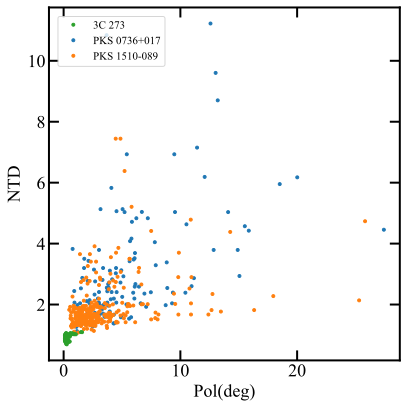

In [204]:
t1_PKS0736=Poldata_source_PKS0736_snr['mjd']
y1_PKS0736=Poldata_source_PKS0736_snr['P (%)']
t2_PKS0736= data_PKS0736['MJD']
y2_PKS0736=data_PKS0736['NTD']
t1s_PKS0736,y1s_PKS0736,t2s_PKS0736,y2s_PKS0736=get_quasi_sim_lum_correlation(t1_PKS0736,y1_PKS0736,t2_PKS0736,y2_PKS0736,timebin=1)

t1_PKS1510=Poldata_source_PKS1510_snr['mjd']
y1_PKS1510=Poldata_source_PKS1510_snr['P (%)']
t2_PKS1510= data_PKS1510['MJD']
y2_PKS1510=data_PKS1510['NTD']
t1s_PKS1510,y1s_PKS1510,t2s_PKS1510,y2s_PKS1510=get_quasi_sim_lum_correlation(t1_PKS1510,y1_PKS1510,t2_PKS1510,y2_PKS1510,timebin=1)

t1_3C273=Poldata_source_3C273_snr['mjd']
y1_3C273=Poldata_source_3C273_snr['P (%)']
t2_3C273= data_3C273['mjd']
y2_3C273=data_3C273['NTD']
t1s_3C273,y1s_3C273,t2s_3C273,y2s_3C273=get_quasi_sim_lum_correlation(t1_3C273,y1_3C273,t2_3C273,y2_3C273,timebin=1)

print('3C273',spearmanr(y1s_3C273,y2s_3C273))
print('PKS0736',spearmanr(y1s_PKS0736,y2s_PKS0736))
print('PKS1510',spearmanr(y1s_PKS1510,y2s_PKS1510))



fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]
    
    ax.errorbar(x=np.log10(float(flux))+42,
    #xerr=float(err_flux),
    y=np.log10(float(flux_Hbeta))+42,
    #yerr=float(err_flux_Hbeta),
    ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
    '''

ax.errorbar(x=y1s_PKS0736,
            #xerr=np.log10(RMdata_PKS0736[e_flux_label]*flux_scale*5100),
            y=y2s_PKS0736,
            #yerr=np.log10(RMdata_PKS0736[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='PKS 0736+017')


ax.errorbar(x=y1s_PKS1510,
            #xerr=np.log10(RMdata_PKS0736[e_flux_label]*flux_scale*5100),
            y=y2s_PKS1510,
            #yerr=np.log10(RMdata_PKS0736[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='PKS 1510-089')

ax.errorbar(x=y1s_3C273,
            #xerr=np.log10(RMdata_PKS0736[e_flux_label]*flux_scale*5100),
            y=y2s_3C273,
            #yerr=np.log10(RMdata_PKS0736[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C 273')

ax.set_xlabel(r'Pol(deg)')
ax.set_ylabel(r'NTD')

#ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
#ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()

#ax.set_title('PKS 0736+017')
set_ax_legend(ax)

#ax.set_xlim(44.0-0.1,45.8)
#ax.set_ylim(42.0,42.85)

#set_ax_locator(ax,0.5,0.1,0.2,0.1)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)
set_ax_tick(ax)
fig.tight_layout()
#plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/PKS0736_Hbeta_L5100_range_%d_%d.png'%(range_l_mask_time_PKS0736,range_r_mask_time_PKS0736),dpi=400)


## NTD_POL_SO

pd_PKS1510_fitting_result_good.columns

In [ ]:
t1_PKS0736=Poldata_source_PKS0736_snr['mjd']
y1_PKS0736=Poldata_source_PKS0736_snr['P (%)']
t2_PKS0736= pd_PKS0736_fitting_result_good['mjd']
y2_PKS0736=pd_PKS0736_fitting_result_good['NTD']
t1s_PKS0736,y1s_PKS0736,t2s_PKS0736,y2s_PKS0736=get_quasi_sim_lum_correlation(t1_PKS0736,y1_PKS0736,t2_PKS0736,y2_PKS0736,timebin=1)

t1_PKS1510=Poldata_source_PKS1510_snr['mjd']
y1_PKS1510=Poldata_source_PKS1510_snr['P (%)']
t2_PKS1510= pd_PKS1510_fitting_result_good['mjd']
y2_PKS1510=pd_PKS1510_fitting_result_good['NTD']
t1s_PKS1510,y1s_PKS1510,t2s_PKS1510,y2s_PKS1510=get_quasi_sim_lum_correlation(t1_PKS1510,y1_PKS1510,t2_PKS1510,y2_PKS1510,timebin=1)

t1_3C273=Poldata_source_3C273_snr['mjd']
y1_3C273=Poldata_source_3C273_snr['P (%)']
t2_3C273= pd_3C273_fitting_result_good['mjd']
y2_3C273=pd_3C273_fitting_result_good['NTD']
t1s_3C273,y1s_3C273,t2s_3C273,y2s_3C273=get_quasi_sim_lum_correlation(t1_3C273,y1_3C273,t2_3C273,y2_3C273,timebin=1)

print('3C273',spearmanr(y1s_3C273,y2s_3C273))
print('PKS0736',spearmanr(y1s_PKS0736,y2s_PKS0736))
print('PKS1510',spearmanr(y1s_PKS1510,y2s_PKS1510))



fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]
    
    ax.errorbar(x=np.log10(float(flux))+42,
    #xerr=float(err_flux),
    y=np.log10(float(flux_Hbeta))+42,
    #yerr=float(err_flux_Hbeta),
    ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
    '''

ax.errorbar(x=y1s_PKS0736,
            #xerr=np.log10(RMdata_PKS0736[e_flux_label]*flux_scale*5100),
            y=y2s_PKS0736,
            #yerr=np.log10(RMdata_PKS0736[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='PKS 0736+017')


ax.errorbar(x=y1s_PKS1510,
            #xerr=np.log10(RMdata_PKS0736[e_flux_label]*flux_scale*5100),
            y=y2s_PKS1510,
            #yerr=np.log10(RMdata_PKS0736[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='PKS 1510-089')

ax.errorbar(x=y1s_3C273,
            #xerr=np.log10(RMdata_PKS0736[e_flux_label]*flux_scale*5100),
            y=y2s_3C273,
            #yerr=np.log10(RMdata_PKS0736[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C 273')

ax.set_xlabel(r'Pol(deg)')
ax.set_ylabel(r'NTD')

#ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
#ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()

#ax.set_title('PKS 0736+017')
set_ax_legend(ax)

#ax.set_xlim(44.0-0.1,45.8)
#ax.set_ylim(42.0,42.85)

#set_ax_locator(ax,0.5,0.1,0.2,0.1)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)
set_ax_tick(ax)
fig.tight_layout()
#plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/PKS0736_Hbeta_L5100_range_%d_%d.png'%(range_l_mask_time_PKS0736,range_r_mask_time_PKS0736),dpi=400)


## Lradio_NTD

In [ ]:
t1_PKS0736=table_OVRO_PKS0736_extract['mjd']
y1_PKS0736=table_OVRO_PKS0736_extract['flux_15GHZ_ovro']
t2_PKS0736= data_PKS0736['MJD']
y2_PKS0736=data_PKS0736['NTD']
t1s_PKS0736,y1s_PKS0736,t2s_PKS0736,y2s_PKS0736=get_quasi_sim_lum_correlation(t1_PKS0736,y1_PKS0736,t2_PKS0736,y2_PKS0736,timebin=1)

t1_PKS1510=table_OVRO_PKS1510_extract['mjd']
y1_PKS1510=table_OVRO_PKS1510_extract['flux_15GHZ_ovro']
t2_PKS1510= data_PKS1510['MJD']
y2_PKS1510=data_PKS1510['NTD']
t1s_PKS1510,y1s_PKS1510,t2s_PKS1510,y2s_PKS1510=get_quasi_sim_lum_correlation(t1_PKS1510,y1_PKS1510,t2_PKS1510,y2_PKS1510,timebin=1)

t1_3C273=ovro_40m_3C273['mjd']
y1_3C273=ovro_40m_3C273['flux']
t2_3C273= data_3C273['mjd']
y2_3C273=data_3C273['NTD']
t1s_3C273,y1s_3C273,t2s_3C273,y2s_3C273=get_quasi_sim_lum_correlation(t1_3C273,y1_3C273,t2_3C273,y2_3C273,timebin=1)

print('3C273',spearmanr(y1s_3C273,y2s_3C273))
print('PKS0736',spearmanr(y1s_PKS0736,y2s_PKS0736))
print('PKS1510',spearmanr(y1s_PKS1510,y2s_PKS1510))


fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]
    
    ax.errorbar(x=np.log10(float(flux))+42,
    #xerr=float(err_flux),
    y=np.log10(float(flux_Hbeta))+42,
    #yerr=float(err_flux_Hbeta),
    ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
    '''

ax.errorbar(x=y1s_PKS0736,#*4*np.pi*D_cm_PKS0736**2*1e-23*15*10**9,
            #xerr=np.log10(RMdata_PKS0736[e_flux_label]*flux_scale*5100),
            y=y2s_PKS0736,
            #yerr=np.log10(RMdata_PKS0736[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='PKS 0736+017')


ax.errorbar(x=y1s_PKS1510,#*4*np.pi*D_cm_PKS1510**2*1e-23*15*10**9,
            #xerr=np.log10(RMdata_PKS0736[e_flux_label]*flux_scale*5100),
            y=y2s_PKS1510,
            #yerr=np.log10(RMdata_PKS0736[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='PKS 1510-089')

ax.errorbar(x=y1s_3C273,#*4*np.pi*D_cm_3C273**2*1e-23*15*10**9,
            #xerr=np.log10(RMdata_PKS0736[e_flux_label]*flux_scale*5100),
            y=y2s_3C273,
            #yerr=np.log10(RMdata_PKS0736[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C 273')

ax.set_xlabel(r'$F_{15GHz}$')
ax.set_ylabel(r'NTD')

#ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
#ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()

#ax.set_title('PKS 0736+017')
set_ax_legend(ax)

#ax.set_xlim(44.0-0.1,45.8)
#ax.set_ylim(42.0,42.85)

#set_ax_locator(ax,0.5,0.1,0.2,0.1)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)
set_ax_tick(ax)
fig.tight_layout()
#plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/PKS0736_Hbeta_L5100_range_%d_%d.png'%(range_l_mask_time_PKS0736,range_r_mask_time_PKS0736),dpi=400)


In [ ]:
t1_PKS0736=table_OVRO_PKS0736_extract['mjd']
y1_PKS0736=table_OVRO_PKS0736_extract['flux_15GHZ_ovro']
t2_PKS0736= data_PKS0736['MJD']
y2_PKS0736=data_PKS0736['NTD']
t1s_PKS0736,y1s_PKS0736,t2s_PKS0736,y2s_PKS0736=get_quasi_sim_lum_correlation(t1_PKS0736,y1_PKS0736,t2_PKS0736,y2_PKS0736,timebin=1)

t1_PKS1510=table_OVRO_PKS1510_extract['mjd']
y1_PKS1510=table_OVRO_PKS1510_extract['flux_15GHZ_ovro']
t2_PKS1510= data_PKS1510['MJD']
y2_PKS1510=data_PKS1510['NTD']
t1s_PKS1510,y1s_PKS1510,t2s_PKS1510,y2s_PKS1510=get_quasi_sim_lum_correlation(t1_PKS1510,y1_PKS1510,t2_PKS1510,y2_PKS1510,timebin=1)

t1_3C273=ovro_40m_3C273['mjd']
y1_3C273=ovro_40m_3C273['flux']
t2_3C273= data_3C273['mjd']
y2_3C273=data_3C273['NTD']
t1s_3C273,y1s_3C273,t2s_3C273,y2s_3C273=get_quasi_sim_lum_correlation(t1_3C273,y1_3C273,t2_3C273,y2_3C273,timebin=1)

print('3C273',spearmanr(y1s_3C273,y2s_3C273))
print('PKS0736',spearmanr(y1s_PKS0736,y2s_PKS0736))
print('PKS1510',spearmanr(y1s_PKS1510,y2s_PKS1510))


fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]
    
    ax.errorbar(x=np.log10(float(flux))+42,
    #xerr=float(err_flux),
    y=np.log10(float(flux_Hbeta))+42,
    #yerr=float(err_flux_Hbeta),
    ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
    '''

ax.errorbar(x=y1s_3C273,#*4*np.pi*D_cm_3C273**2*1e-23*15*10**9,
            #xerr=np.log10(RMdata_PKS0736[e_flux_label]*flux_scale*5100),
            y=y2s_3C273,
            #yerr=np.log10(RMdata_PKS0736[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C 273')

ax.set_xlabel(r'$F_{15GHz}$')
ax.set_ylabel(r'NTD')

#ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
#ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()

#ax.set_title('PKS 0736+017')
set_ax_legend(ax)

#ax.set_xlim(44.0-0.1,45.8)
#ax.set_ylim(42.0,42.85)

#set_ax_locator(ax,0.5,0.1,0.2,0.1)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)
set_ax_tick(ax)
fig.tight_layout()
#plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/PKS0736_Hbeta_L5100_range_%d_%d.png'%(range_l_mask_time_PKS0736,range_r_mask_time_PKS0736),dpi=400)


## Pdisk_Pol

In [45]:
P_disk=[0.75,0.6,0.4]
Pol_mean=[0.28,3.6,5.58]
Lradio_mean=[]
Name=['3C273','PKS1510','PKS0736']
P_disk=np.array(P_disk)
Pol_mean=np.array(Pol_mean)

Text(0, 0.5, 'Disk_contribution')

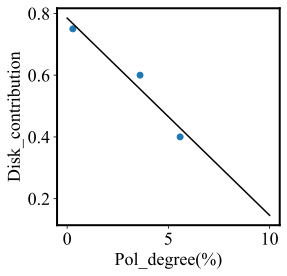

In [65]:
fit = fitting.LinearLSQFitter()
# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=3.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line, mask = or_fit(line_init, Pol_mean, P_disk, weights=1.0/np.ones(len(Pol_mean)))
filtered_data = np.ma.masked_array(P_disk, mask=mask)

# plot
figure_n= 1

fig = plt.figure(figsize=(4,figure_n*4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)
ax.scatter(Pol_mean,P_disk,zorder=1)
#plt.errorbar(xdatas, ydatas, yerr=0, fmt="ko", fillstyle="none", label="Clipped Data")
#plt.errorbar(xdatas, filtered_data, fmt="ko", label="Fitted Data")
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
Pol_linspace=np.linspace(0,10,10)
Dis_contribution_linspace= fitted_line(Pol_linspace)

plt.plot(Pol_linspace, Dis_contribution_linspace, 'k-', label='Fitted Model')
plt.xlabel('Pol_degree(%)')
plt.ylabel('Disk_contribution')


#ax.scatter(Pol_linspace,Dis_contribution_linspace,zorder=0)


In [ ]:
fitted_line(12)

Text(0, 0.5, 'Disk contribution')

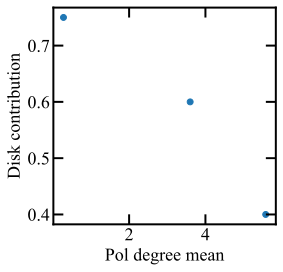

In [49]:
figure_n= 1

fig = plt.figure(figsize=(4,figure_n*4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)
ax.scatter(Pol_mean,P_disk,zorder=1)

set_ax_tick(ax)
ax.set_xlabel('Pol degree mean')
ax.set_ylabel('Disk contribution')


### data_Paper

3C273 SpearmanrResult(correlation=0.09668214243000113, pvalue=0.1587293412985034)
PKS0736 SpearmanrResult(correlation=0.5370923485581588, pvalue=3.75369278478349e-11)
PKS1510 SpearmanrResult(correlation=0.400207192974758, pvalue=8.970188381186175e-13)


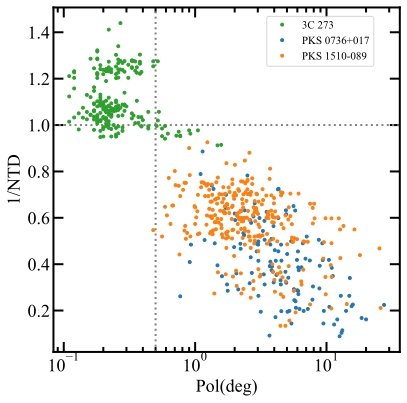

In [201]:
t1_PKS0736=Poldata_source_PKS0736_snr['mjd']
y1_PKS0736=Poldata_source_PKS0736_snr['P (%)']
t2_PKS0736= data_PKS0736['MJD']
y2_PKS0736=data_PKS0736['NTD']
t1s_PKS0736,y1s_PKS0736,t2s_PKS0736,y2s_PKS0736=get_quasi_sim_lum_correlation(t1_PKS0736,y1_PKS0736,t2_PKS0736,y2_PKS0736,timebin=1)

t1_PKS1510=Poldata_source_PKS1510_snr['mjd']
y1_PKS1510=Poldata_source_PKS1510_snr['P (%)']
t2_PKS1510= data_PKS1510['MJD']
y2_PKS1510=data_PKS1510['NTD']
t1s_PKS1510,y1s_PKS1510,t2s_PKS1510,y2s_PKS1510=get_quasi_sim_lum_correlation(t1_PKS1510,y1_PKS1510,t2_PKS1510,y2_PKS1510,timebin=1)

t1_3C273=Poldata_source_3C273_snr['mjd']
y1_3C273=Poldata_source_3C273_snr['P (%)']
t2_3C273= data_3C273['mjd']
y2_3C273=data_3C273['NTD']
t1s_3C273,y1s_3C273,t2s_3C273,y2s_3C273=get_quasi_sim_lum_correlation(t1_3C273,y1_3C273,t2_3C273,y2_3C273,timebin=1)

print('3C273',spearmanr(y1s_3C273,y2s_3C273))
print('PKS0736',spearmanr(y1s_PKS0736,y2s_PKS0736))
print('PKS1510',spearmanr(y1s_PKS1510,y2s_PKS1510))



fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]
    
    ax.errorbar(x=np.log10(float(flux))+42,
    #xerr=float(err_flux),
    y=np.log10(float(flux_Hbeta))+42,
    #yerr=float(err_flux_Hbeta),
    ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
    '''

ax.errorbar(x=y1s_PKS0736,
            #xerr=np.log10(RMdata_PKS0736[e_flux_label]*flux_scale*5100),
            y=1/y2s_PKS0736,
            #yerr=np.log10(RMdata_PKS0736[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='PKS 0736+017')


ax.errorbar(x=y1s_PKS1510,
            #xerr=np.log10(RMdata_PKS0736[e_flux_label]*flux_scale*5100),
            y=1/y2s_PKS1510,
            #yerr=np.log10(RMdata_PKS0736[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='PKS 1510-089')

ax.errorbar(x=y1s_3C273,
            #xerr=np.log10(RMdata_PKS0736[e_flux_label]*flux_scale*5100),
            y=1/y2s_3C273,
            #yerr=np.log10(RMdata_PKS0736[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C 273')

ax.set_xlabel(r'Pol(deg)')
ax.set_ylabel(r'1/NTD')

#ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
#ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


ax.semilogx()
#ax.semilogy()

#ax.set_title('PKS 0736+017')
set_ax_legend(ax,bbox_to_anchor=(0.6,0.99))
ax.axvline(0.5,color='grey',ls=':',linewidth=2)
ax.axhline(1,color='grey',ls=':',linewidth=2)

#ax.set_xlim(44.0-0.1,45.8)
#ax.set_ylim(42.0,42.85)
#set_ax_locator(ax,0.5,0.1,0.2,0.1)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)
set_ax_tick(ax)
fig.tight_layout()
#plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/PKS0736_Hbeta_L5100_range_%d_%d.png'%(range_l_mask_time_PKS0736,range_r_mask_time_PKS0736),dpi=400)


In [193]:
Pdisk_Pol_data_PKS1510={'Pol':y1s_PKS1510,'1/NTD':1/y2s_PKS1510}
Pdisk_Pol_data_PKS0736={'Pol':y1s_PKS0736,'1/NTD':1/y2s_PKS0736}
Pdisk_Pol_data_3C273={'Pol':y1s_3C273,'1/NTD':1/y2s_3C273}
pd_Pdisk_Pol_PKS1510=pd.DataFrame(Pdisk_Pol_data_PKS1510)
pd_Pdisk_Pol_PKS0736=pd.DataFrame(Pdisk_Pol_data_PKS0736)
pd_Pdisk_Pol_3C273=pd.DataFrame(Pdisk_Pol_data_3C273)

pd_Pdisk_Pol=pd_Pdisk_Pol_PKS1510.append(pd_Pdisk_Pol_PKS0736)
#pd_Pdisk_Pol=pd_Pdisk_Pol.append(pd_Pdisk_Pol_3C273)

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11380/81537678.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd_Pdisk_Pol=pd_Pdisk_Pol_PKS1510.append(pd_Pdisk_Pol_PKS0736)


In [195]:
pd_Pdisk_Pol

,Pol,1/NTD
0,1.92,0.765626
1,3.72,0.811952
2,3.81,0.696838
3,4.51,0.696838
4,5.16,0.645216
...,...,...
126,1.60,0.347957
127,3.74,0.410585
128,3.81,0.394525
129,3.75,0.394525


In [196]:
pearsonr(pd_Pdisk_Pol['Pol'],pd_Pdisk_Pol['1/NTD']),pearsonr(np.log10(pd_Pdisk_Pol['Pol']),pd_Pdisk_Pol['1/NTD'])

(PearsonRResult(statistic=-0.5006620441261581, pvalue=2.075321414537074e-28),
 PearsonRResult(statistic=-0.5429988118420735, pvalue=4.861568225807142e-34))

In [197]:
spearmanr(pd_Pdisk_Pol['Pol'],pd_Pdisk_Pol['1/NTD']),spearmanr(np.log10(pd_Pdisk_Pol['Pol']),pd_Pdisk_Pol['1/NTD'])

(SpearmanrResult(correlation=-0.5298136283258306, pvalue=3.35674819263688e-32),
 SpearmanrResult(correlation=-0.5298136283258306, pvalue=3.35674819263688e-32))

pd_Pdisk_Pol

pd_Pdisk_Pol.to_csv('RadioloudAGNRM_Pdisk_Pol.csv',index=False)

### decompose

In [208]:
t0_PKS0736= data_PKS0736['MJD']
y0_PKS0736=data_PKS0736['L5100']
t1_PKS0736=Poldata_source_PKS0736_snr['mjd']
y1_PKS0736=Poldata_source_PKS0736_snr['P (%)']
t2_PKS0736= data_PKS0736['MJD']
y2_PKS0736=data_PKS0736['NTD']

t0s_PKS0736,y0s_PKS0736,t1s_PKS0736,y1s_PKS0736,t2s_PKS0736,y2s_PKS0736=get_quasi_sim_lum3(t0_PKS0736,y0_PKS0736,t1_PKS0736,y1_PKS0736,t2_PKS0736,y2_PKS0736,timebin=1)


t0_PKS1510= data_PKS1510['MJD']
y0_PKS1510=data_PKS1510['L5100']
t1_PKS1510=Poldata_source_PKS1510_snr['mjd']
y1_PKS1510=Poldata_source_PKS1510_snr['P (%)']
t2_PKS1510= data_PKS1510['MJD']
y2_PKS1510=data_PKS1510['NTD']
t0s_PKS1510,y0s_PKS1510,t1s_PKS1510,y1s_PKS1510,t2s_PKS1510,y2s_PKS1510=get_quasi_sim_lum3(t0_PKS1510,y0_PKS1510,t1_PKS1510,y1_PKS1510,t2_PKS1510,y2_PKS1510,timebin=1)


t0_3C273= data_3C273['mjd']
y0_3C273=data_3C273['L5100']
t1_3C273=Poldata_source_3C273_snr['mjd']
y1_3C273=Poldata_source_3C273_snr['P (%)']
t2_3C273= data_3C273['mjd']
y2_3C273=data_3C273['NTD']
t0s_3C273,y0s_3C273,t1s_3C273,y1s_3C273,t2s_3C273,y2s_3C273=get_quasi_sim_lum3(t0_3C273,y0_3C273,t1_3C273,y1_3C273,t2_3C273,y2_3C273,timebin=1)

print('3C273',spearmanr(y1s_3C273,y2s_3C273))
print('PKS0736',spearmanr(y1s_PKS0736,y2s_PKS0736))
print('PKS1510',spearmanr(y1s_PKS1510,y2s_PKS1510))


Pdisk_Pol_data_PKS1510_decompose={'t_L5100':t0s_PKS1510,'L5100':y0s_PKS1510,'t_pol':t1s_PKS1510, 'Pol':y1s_PKS1510,'t_NTD':t2s_PKS1510,'1/NTD':1/y2s_PKS1510}
Pdisk_Pol_data_PKS0736_decompose={'t_L5100':t0s_PKS0736,'L5100':y0s_PKS0736,'t_pol':t1s_PKS0736,'Pol':y1s_PKS0736,'t_NTD':t2s_PKS0736,'1/NTD':1/y2s_PKS0736}
Pdisk_Pol_data_3C273_decompose={'t_L5100':t0s_3C273,'L5100':y0s_3C273,'t_pol':t1s_3C273,'Pol':y1s_3C273,'t_NTD':t2s_3C273,'1/NTD':1/y2s_3C273}

pd_Pdisk_Pol_PKS1510_decompose=pd.DataFrame(Pdisk_Pol_data_PKS1510_decompose)
pd_Pdisk_Pol_PKS0736_decompose=pd.DataFrame(Pdisk_Pol_data_PKS0736_decompose)
pd_Pdisk_Pol_3C273_decompose=pd.DataFrame(Pdisk_Pol_data_3C273_decompose)

#pd_Pdisk_Pol_decompose=pd_Pdisk_Pol_PKS1510_decompose.append(pd_Pdisk_Pol_PKS0736_decompose)
#pd_Pdisk_Pol_decompose=pd_Pdisk_Pol_decompose.append(pd_Pdisk_Pol_3C273_decompose)

3C273 SpearmanrResult(correlation=0.016430955453775053, pvalue=0.8173708212595497)
PKS0736 SpearmanrResult(correlation=0.5293719852466551, pvalue=8.439083115243798e-10)
PKS1510 SpearmanrResult(correlation=0.4718539642339613, pvalue=3.741690527521751e-16)


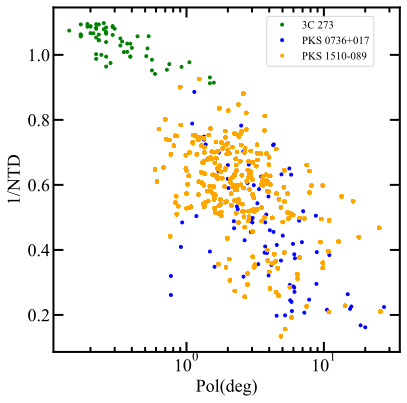

In [215]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]
    
    ax.errorbar(x=np.log10(float(flux))+42,
    #xerr=float(err_flux),
    y=np.log10(float(flux_Hbeta))+42,
    #yerr=float(err_flux_Hbeta),
    ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
    '''
for index,time in enumerate(pd_Pdisk_Pol_PKS0736_decompose['t_L5100']):
    if time < 58300 and time >57200:
        ax.errorbar(x=pd_Pdisk_Pol_PKS0736_decompose.loc[index,'Pol'],
            #xerr=np.log10(RMdata_PKS0736[e_flux_label]*flux_scale*5100),
            y=pd_Pdisk_Pol_PKS0736_decompose.loc[index,'1/NTD'],
            #yerr=np.log10(RMdata_PKS0736[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='PKS 0736+017',color='b')

for index,time in enumerate(pd_Pdisk_Pol_PKS1510_decompose['t_L5100']):
    if time < 55500 and time >54800:
        ax.errorbar(x=pd_Pdisk_Pol_PKS1510_decompose['Pol'],
            #xerr=np.log10(RMdata_PKS0736[e_flux_label]*flux_scale*5100),
            y=pd_Pdisk_Pol_PKS1510_decompose['1/NTD'],
            #yerr=np.log10(RMdata_PKS0736[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='PKS 1510-089',color='orange')

        
for index,time in enumerate(pd_Pdisk_Pol_3C273_decompose['t_L5100']):
    if time < 55500 and time >54700 :
        ax.errorbar(x=pd_Pdisk_Pol_3C273_decompose.loc[index,'Pol'],
            #xerr=np.log10(RMdata_PKS0736[e_flux_label]*flux_scale*5100),
            y=pd_Pdisk_Pol_3C273_decompose.loc[index,'1/NTD'],
            #yerr=np.log10(RMdata_PKS0736[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C 273',color='g')

ax.set_xlabel(r'Pol(deg)')
ax.set_ylabel(r'1/NTD')

#ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
#ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


ax.semilogx()
#ax.semilogy()

#ax.set_title('PKS 0736+017')
set_ax_legend(ax,bbox_to_anchor=(0.6,0.99))

#ax.set_xlim(44.0-0.1,45.8)
#ax.set_ylim(42.0,42.85)
#set_ax_locator(ax,0.5,0.1,0.2,0.1)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)
set_ax_tick(ax)
fig.tight_layout()


In [108]:
len(pd_Pdisk_Pol_PKS1510_decompose),len(pd_Pdisk_Pol_PKS0736_decompose),len(pd_Pdisk_Pol_3C273_decompose)

(266, 117, 200)

data_3C273.colnames

In [ ]:
'Ldisk/Lobs= 0.773-0.472*log(pol)'

### lag_pd_Pdisk_Pol_PKS1510_decompose

In [120]:
pd_Pdisk_Pol_PKS1510_decompose['Pdisk']=0.773-0.472*np.log10(pd_Pdisk_Pol_PKS1510_decompose['Pol'])
pd_Pdisk_Pol_PKS1510_decompose['Ldisk']=pd_Pdisk_Pol_PKS1510_decompose['L5100']*pd_Pdisk_Pol_PKS1510_decompose['Pdisk']
pd_Pdisk_Pol_PKS1510_decompose['Ldisk_err']=pd_Pdisk_Pol_PKS1510_decompose['Ldisk']*0.153

lag_pd_Pdisk_Pol_PKS1510_decompose=pd_Pdisk_Pol_PKS1510_decompose[['t_L5100','Ldisk','Ldisk_err']]
lag_pd_Pdisk_Pol_PKS1510_decompose.columns=['t','Ldisk','Ldisk_err']

lag_pd_Pdisk_Pol_PKS1510_decompose=lag_pd_Pdisk_Pol_PKS1510_decompose.sort_values('t')


In [169]:
get_info(lag_pd_Pdisk_Pol_PKS1510_decompose,'Ldisk')

(3.137548617782057e+44, 4.8293719914726605e+45, 1.5504792216755913e+45)

### lag_pd_Pdisk_Pol_PKS0736_decompose

In [121]:
pd_Pdisk_Pol_PKS0736_decompose['Pdisk']=0.773-0.472*np.log10(pd_Pdisk_Pol_PKS0736_decompose['Pol'])
pd_Pdisk_Pol_PKS0736_decompose['Ldisk']=pd_Pdisk_Pol_PKS0736_decompose['L5100']*pd_Pdisk_Pol_PKS0736_decompose['Pdisk']
pd_Pdisk_Pol_PKS0736_decompose['Ldisk_err']=pd_Pdisk_Pol_PKS0736_decompose['Ldisk']*0.153

lag_pd_Pdisk_Pol_PKS0736_decompose=pd_Pdisk_Pol_PKS0736_decompose[['t_L5100','Ldisk','Ldisk_err']]
lag_pd_Pdisk_Pol_PKS0736_decompose.columns=['t','Ldisk','Ldisk_err']
lag_pd_Pdisk_Pol_PKS0736_decompose=lag_pd_Pdisk_Pol_PKS0736_decompose.sort_values('t')


In [168]:
get_info(lag_pd_Pdisk_Pol_PKS0736_decompose,'Ldisk')

(7.50906517668689e+43, 1.3923646479606702e+45, 2.625972316661371e+44)

### lag_pd_Pdisk_Pol_3C273_decompose

In [122]:
pd_Pdisk_Pol_3C273_decompose['Pdisk']=0.773-0.472*np.log10(pd_Pdisk_Pol_3C273_decompose['Pol'])
pd_Pdisk_Pol_3C273_decompose['Ldisk']=pd_Pdisk_Pol_3C273_decompose['L5100']*pd_Pdisk_Pol_3C273_decompose['Pdisk']
pd_Pdisk_Pol_3C273_decompose['Ldisk_err']=pd_Pdisk_Pol_3C273_decompose['Ldisk']*0.153

lag_pd_Pdisk_Pol_3C273_decompose=pd_Pdisk_Pol_3C273_decompose[['t_L5100','Ldisk','Ldisk_err']]
lag_pd_Pdisk_Pol_3C273_decompose.columns=['t','Ldisk','Ldisk_err']
lag_pd_Pdisk_Pol_3C273_decompose=lag_pd_Pdisk_Pol_3C273_decompose.sort_values('t')

In [167]:
get_info(lag_pd_Pdisk_Pol_3C273_decompose,'Ldisk')

(5.2277449666435107e+45, 9.362809537814064e+45, 7.222303364998923e+45)

pd_Pdisk_Pol_PKS1510_decompose

In [112]:
get_info(pd_Pdisk_Pol_PKS1510_decompose,'Pdisk')

(0.10655665569685047, 0.881157850504908, 0.5879413601561269)

In [124]:
lag_pd_Pdisk_Pol_PKS1510_decompose

,t,Ldisk,Ldisk_err
0,54829,1.122341e+45,1.717182e+44
1,54830,9.343049e+44,1.429487e+44
2,54831,7.488910e+44,1.145803e+44
3,54832,7.828693e+44,1.197790e+44
4,54859,8.568602e+44,1.310996e+44
...,...,...,...
261,57875,2.249691e+45,3.442028e+44
262,57893,2.257060e+45,3.453301e+44
263,57894,2.263503e+45,3.463160e+44
264,57932,1.863639e+45,2.851367e+44


### data_SO_fit

In [81]:
pd_PKS0736_fitting_result_good.columns

Index(['filename', 'mjd', 'logL5100', 'logLHebta_br', 'logLHebta_na',
       'logLg_br', 'logLg_na', 'logLOIII5007', 'Hb_br_fwhm', 'Hb_br_sigma',
       'Hb_line_red_chi2', 'Hg_line_red_chi2', 'logLp', 'Lp', 'L5100', 'NTD'],
      dtype='object')

3C273 SpearmanrResult(correlation=0.13851088251810637, pvalue=0.039201534971070165)
PKS0736 SpearmanrResult(correlation=0.6042159922987858, pvalue=1.9954684185505246e-07)
PKS1510 SpearmanrResult(correlation=0.45870861052536255, pvalue=1.0893295626976124e-21)


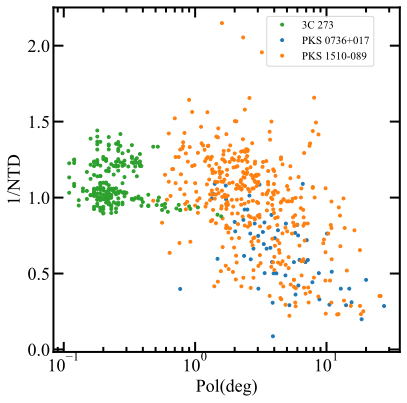

In [85]:
t1_PKS0736=Poldata_source_PKS0736_snr['mjd']
y1_PKS0736=Poldata_source_PKS0736_snr['P (%)']
t2_PKS0736= pd_PKS0736_fitting_result_good['mjd']
y2_PKS0736=pd_PKS0736_fitting_result_good['NTD']
t1s_PKS0736,y1s_PKS0736,t2s_PKS0736,y2s_PKS0736=get_quasi_sim_lum_correlation(t1_PKS0736,y1_PKS0736,t2_PKS0736,y2_PKS0736,timebin=1)

t1_PKS1510=Poldata_source_PKS1510_snr['mjd']
y1_PKS1510=Poldata_source_PKS1510_snr['P (%)']
t2_PKS1510= pd_PKS1510_fitting_result_good['mjd']
y2_PKS1510=pd_PKS1510_fitting_result_good['NTD']
t1s_PKS1510,y1s_PKS1510,t2s_PKS1510,y2s_PKS1510=get_quasi_sim_lum_correlation(t1_PKS1510,y1_PKS1510,t2_PKS1510,y2_PKS1510,timebin=1)

t1_3C273=Poldata_source_3C273_snr['mjd']
y1_3C273=Poldata_source_3C273_snr['P (%)']
t2_3C273= pd_3C273_fitting_result_good['mjd']
y2_3C273=pd_3C273_fitting_result_good['NTD']
t1s_3C273,y1s_3C273,t2s_3C273,y2s_3C273=get_quasi_sim_lum_correlation(t1_3C273,y1_3C273,t2_3C273,y2_3C273,timebin=1)

print('3C273',spearmanr(y1s_3C273,y2s_3C273))
print('PKS0736',spearmanr(y1s_PKS0736,y2s_PKS0736))
print('PKS1510',spearmanr(y1s_PKS1510,y2s_PKS1510))



fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]
    
    ax.errorbar(x=np.log10(float(flux))+42,
    #xerr=float(err_flux),
    y=np.log10(float(flux_Hbeta))+42,
    #yerr=float(err_flux_Hbeta),
    ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
    '''

ax.errorbar(x=y1s_PKS0736,
            #xerr=np.log10(RMpd_PKS0736_fitting_result_good[e_flux_label]*flux_scale*5100),
            y=1/y2s_PKS0736,
            #yerr=np.log10(RMpd_PKS0736_fitting_result_good[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='PKS 0736+017')


ax.errorbar(x=y1s_PKS1510,
            #xerr=np.log10(RMpd_PKS0736_fitting_result_good[e_flux_label]*flux_scale*5100),
            y=1/y2s_PKS1510,
            #yerr=np.log10(RMpd_PKS0736_fitting_result_good[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='PKS 1510-089')

ax.errorbar(x=y1s_3C273,
            #xerr=np.log10(RMpd_PKS0736_fitting_result_good[e_flux_label]*flux_scale*5100),
            y=1/y2s_3C273,
            #yerr=np.log10(RMpd_PKS0736_fitting_result_good[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C 273')

ax.set_xlabel(r'Pol(deg)')
ax.set_ylabel(r'1/NTD')

#ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
#ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


ax.semilogx()
#ax.semilogy()

#ax.set_title('PKS 0736+017')
set_ax_legend(ax,bbox_to_anchor=(0.6,0.99))

#ax.set_xlim(44.0-0.1,45.8)
#ax.set_ylim(42.0,42.85)
#set_ax_locator(ax,0.5,0.1,0.2,0.1)
#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)
set_ax_tick(ax)
fig.tight_layout()
#plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/PKS0736_Hbeta_L5100_range_%d_%d.png'%(range_l_mask_time_PKS0736,range_r_mask_time_PKS0736),dpi=400)



In [86]:
Pdisk_Pol_data_PKS1510_SO={'Pol':y1s_PKS1510,'1/NTD':1/y2s_PKS1510}
Pdisk_Pol_data_PKS0736_SO={'Pol':y1s_PKS0736,'1/NTD':1/y2s_PKS0736}
Pdisk_Pol_data_3C273_SO={'Pol':y1s_3C273,'1/NTD':1/y2s_3C273}

pd_Pdisk_Pol_PKS1510_SO=pd.DataFrame(Pdisk_Pol_data_PKS1510_SO)
pd_Pdisk_Pol_PKS0736_SO=pd.DataFrame(Pdisk_Pol_data_PKS0736_SO)
pd_Pdisk_Pol_3C273_SO=pd.DataFrame(Pdisk_Pol_data_3C273_SO)

pd_Pdisk_Pol_SO=pd_Pdisk_Pol_PKS1510_SO.append(pd_Pdisk_Pol_PKS0736_SO)
pd_Pdisk_Pol_SO=pd_Pdisk_Pol_SO.append(pd_Pdisk_Pol_3C273_SO)

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11380/2473337041.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd_Pdisk_Pol_SO=pd_Pdisk_Pol_PKS1510_SO.append(pd_Pdisk_Pol_PKS0736_SO)
/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11380/2473337041.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd_Pdisk_Pol_SO=pd_Pdisk_Pol_SO.append(pd_Pdisk_Pol_3C273_SO)


In [88]:
pearsonr(pd_Pdisk_Pol_SO['Pol'],pd_Pdisk_Pol_SO['1/NTD']),pearsonr(np.log10(pd_Pdisk_Pol_SO['Pol']),pd_Pdisk_Pol_SO['1/NTD'])

(PearsonRResult(statistic=-0.5325754457805195, pvalue=1.215955941297077e-50),
 PearsonRResult(statistic=-0.4706813653870531, pvalue=1.8550309795098756e-38))

In [89]:
spearmanr(pd_Pdisk_Pol_SO['Pol'],pd_Pdisk_Pol_SO['1/NTD']),spearmanr(np.log10(pd_Pdisk_Pol_SO['Pol']),pd_Pdisk_Pol_SO['1/NTD'])

(SpearmanrResult(correlation=-0.4606407613261131, pvalue=1.0471478124212398e-36),
 SpearmanrResult(correlation=-0.4606407613261131, pvalue=1.0471478124212398e-36))

In [172]:
pd_Pdisk_Pol_SO.to_csv('RadioloudAGNRM_Pdisk_Pol_SO.csv',index=False)

In [171]:
ls *.csv

RadioloudAGNRM_Pdisk_Pol.csv*


# BHmassreadfit

In [ ]:
path='/Users/lyubing/Downloads/SDSS-DR12Q-BH.dat'
with open(path,'r') as f:
    lines=f.readlines()

In [ ]:
lines[Format_start-2]

In [ ]:
lines[Format_start-2].find('Label')

In [ ]:
lines[Format_start-2].find('Explanations')

In [ ]:
lines[Format_start-2][22:33]

In [ ]:
lines[Format_start:Format_end]

In [ ]:
def read_dat_path(path):
    path='/Users/lyubing/Downloads/SDSS-DR12Q-BH.dat'
    with open(path,'r') as f:
        lines=f.readlines()
        
    Format_start,Format_end=0,0
    Format_line=0
    for index,line in enumerate(lines):
        if line.startswith('   Bytes Format')>0:
            Format_start=index+2
        if line.startswith('Note')>0:
            Format_end=index-2
        if line.startswith('--')>0:
            Format_line=index
              
    print(Format_start,Format_end,Format_line)    

    columns=[]
    for i in lines[Format_start:Format_end+1]:
        columns_i=i[lines[Format_start-2].find('Label'):lines[Format_start-2].find('Explanations')]
        print(i[lines[Format_start-2].find('Label'):lines[Format_start-2].find('Explanations')])
        columns.append(i[lines[Format_start-2].find('Label'):lines[Format_start-2].find('Explanations')])    
    
    newpath='%s_new.txt'%(path.split('.')[0])
    with open(newpath,'w+') as f:
        for i in lines[Format_line+1:]:
            f.write(i)  
            
    table = Table.read(newpath,format='ascii')
    pd_table=table.to_pandas()
    pd_table.columns=columns   
    return pd_table

In [ ]:
path='/Users/lyubing/Downloads/SDSS-DR12Q-BH.dat'
pd_table=read_dat_path(path)

In [ ]:
pd_table